In [1]:
# import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.cluster import DBSCAN

In [2]:
pwd

'C:\\Users\\Ellahhh\\Documents\\Folders\\400_Level\\FinalYearProject\\Implementation'

<h2>Load the dataset</h2>

In [3]:
rawData = pd.read_excel('DataSet/geoPoll.xlsx')

In [4]:
rawData.head()

Gender.Weights  Age Group.Weights  ADM1.Weights  Total Weights Survey Date  \
0        0.921659           1.090933      1.034665       1.040323  2020-04-02   
1        0.921659           0.894454      1.029298       0.848534  2020-04-02   
2        0.970297           1.034483      0.800000       0.803004  2020-04-02   
3        0.921659           0.894454      0.994802       0.820096  2020-04-02   
4        0.921659           1.090933      0.975088       0.980420  2020-04-02   

   Country Gender Age Group       Admin1 SEC  ...  \
0    Kenya   Male     15-25     Machakos   B  ...   
1    Kenya   Male     26-35  Uasin Gishu  C1  ...   
2  Nigeria   Male     15-25        Benue   A  ...   
3    Kenya   Male     26-35        Kisii  C1  ...   
4    Kenya   Male     15-25        Nandi   B  ...   

   InformationSources: Friends/family  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   InformationSources: Government messages InformationSources: Newspapers  \
0                                     True                          False   
1                                     True                          False   
2                                    False                          False   
3                                     True                           True   
4                                    False                          False   

  InformationSources: Other InformationSources: Radio  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   InformationSources: Social Media InformationSources: TV  \
0                             False                  False   
1                              True                   True   
2                              True                  False   
3                              True                   True   
4                              True                  False   

            SocialMedia MediaConsumption  \
0                   NaN   Consuming more   
1         Media outlets   Consuming more   
2  Health organizations   Consuming more   
3  Health organizations   Consuming more   
4         Media outlets   Consuming less   

                                        StayPositive  
0                                            Nothing  
1                                               Hope  
2                        Will go back to school soon  
3  the covid 19 outbreak has not been confirmed i...  
4  talking to peaple and watching movies  playing...  

[5 rows x 62 columns]

In [5]:
# to get the shape of the dataset
rawData.shape

(3988, 62)

In [6]:
# get information from the ReadAdultData
print('Information from the rawData\n')
rawData.info()

Information from the rawData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Gender.Weights                                   3988 non-null   float64       
 1   Age Group.Weights                                3988 non-null   float64       
 2   ADM1.Weights                                     3988 non-null   float64       
 3   Total Weights                                    3988 non-null   float64       
 4   Survey Date                                      3988 non-null   datetime64[ns]
 5   Country                                          3988 non-null   object        
 6   Gender                                           3988 non-null   object        
 7   Age Group                                        3988 non-null   object        
 8   Admin1  

<h2>To check if the dataset needs to be Preprocessed</h2>

In [7]:
# to detect if there are missing values and sum up the missing values.
rawData.isnull().sum()

Gender.Weights                         0
Age Group.Weights                      0
ADM1.Weights                           0
Total Weights                          0
Survey Date                            0
                                    ... 
InformationSources: Social Media       0
InformationSources: TV                 0
SocialMedia                         2364
MediaConsumption                       0
StayPositive                        1989
Length: 62, dtype: int64

<h2>To check for missing values</h2>

In [8]:
def missing_values_table(rawData):
        # Total missing values
        mis_rawData = rawData.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * rawData.isnull().sum() / len(rawData)
        
        # Make a table with the results
        mis_val_table = pd.concat([ mis_rawData , mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(rawData.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missingValues = missing_values_table(rawData)
print(missingValues)

Your selected dataframe has 62 columns.
There are 5 columns that have missing values.
                  Missing Values  % of Total Values
SocialMedia                 2364               59.3
StayPositive                1989               49.9
BiggestChallenge            1988               49.8
FoodLocations2              1927               48.3
BrandPurchase                808               20.3


<h3>The above code shows that there are missing values in some columns</h3>
<br>

In [9]:
# create a count column to later check for outliers
rawData['count'] = rawData.index

<h3>Check for mismatched data type</h3>

In [10]:
n = 0
colNo = 0 
while colNo < len(rawData.columns):
    print(rawData.columns[colNo])
    print("-----------------------------------------------------------------------------")
    for (rowName, data) in rawData.iterrows():
        if type(data[n]) == float:
            print(str(True) + ", This value has a data type of float: " + str(data[n]))
        elif type(data[n]) == str:
            print(str(True) + ", This value has a data type of string: " + str(data[n]))
        elif type(data[n]) == bool:
            print(str(True) + ", This value has a data type of boolean: " + str(data[n]))
        elif type(data[n]) == int:
            print(str(True) + ", This value has a data type of integer: " + str(data[n]))
        else:
            print("This value has a data type that does not exist: " + str(data[n]))
    n = n + 1
    print("------------------------------------------------------------------------------\n\n")
    colNo = colNo + 1

Gender.Weights
-----------------------------------------------------------------------------
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of flo

True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of floa

True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0717048387096775
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.0303030303030303
True, This value has a data type of float: 0.9702970297029703
True, This value has a 

True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.7722007722007722
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, Th

True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 1.4184397163120568
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.9702970297029703
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0928961748633879
True, This value has a data type of float: 0.9216589861751152
True, This value has a data type of float: 1.1049723756906078
True, This value has a data type of fl

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0717048387096775
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.

True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9132420091324202
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0717048387096775
True, This value has a data type of float: 1.0
True, This value ha

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.4586466165413534
True, This value has a data type of float: 0.7607843137254902
True, This value has a data type of float: 1.0717048387096775
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 0.937966976744186
True, This value has a data type of float: 1.0717048387096775
True, This value has a data type of float: 0.937966976744186
True, This value has a data

True, This value has a data type of float: 1.0344827586206897
True, This value has a data type of float: 0.9333333333333332
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.8869030864197531
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 1.7556756756756755
True, This value has a data type of float: 0.8421
True, This value has a data type of float: 1.7556756756756755
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0

True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of fl

True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 1.00751879

True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 0.8944537815126051
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 1.044776119402985
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 0.9569590643274855
True, This value has a data type of float: 1.0909333333333333
True, This value has a data type of float: 0.6190476190476191
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9917557251908395
True, This value has a data type of flo

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.6867096774193548
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This valu

True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7904191616766468
True, This value has a d

True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.3054041322314047
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.0075187969924813
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 1.6363636363636365
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of fl

True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 0.8268852459016394
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.0478832116788321
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, This value has a data type of float: 1.1128682170542636
True, Th

True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.8756238034331587
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.9731858482510416
True, This value has a data type of float: 1.185061203448999
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 1.0
True, This value has a data type of float: 2.2117323337563737
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 1.0
True, This value has 

True, This value has a data type of float: 1.1111111111111112
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4519563049548825
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0292978256151206
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.10275
True, This value has a data 

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.110304463377117
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 0.965845039825522
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0292978256151206
True, This value has a data type of float: 0.9892456521990942
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.185061203448999
True, This value has a data type of float: 1.0036612221631336
True, This value has a data type of float: 0.9743513464884586
True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 0.791171283511668
True, This

True, This value has a data type of float: 1.0036612221631336
True, This value has a data type of float: 0.9984890739849734
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.965845039825522
True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 1.5499555608603461
True, This value has a data type of float: 1.0107600736135074
True, This value has a data type of float: 1.018187317973097
True, This value has a data type of float: 1.0107600736135074
True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 1.1801145096715615
True, This value has a data type of float: 1.045587780738002
True, This value has a data type of float: 0.9750882003741145
True, This value has a data type of float: 1.0059171206136948
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 1.0
True, This value has a data type of float

True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 1.10275
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 0.9576458717521482
True, This value has a data type of float: 1.4152941176470586
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.3799530040541611
True, This value has a data type of float: 0.7605172413793103
True, This value has a data type of float: 0.6766875
True, This value has a data type of float

True, This value has a data type of float: 0.9892456521990942
True, This value has a data type of float: 1.1952884615384616
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0990114931202466
True, This value has a data type of float: 2.598810192374406
True, This value has a data type of float: 1.1952884615384616
True, This value has a data type of float: 2.2117323337563737
True, This value has a data type of float: 0.6766875
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.10275
True, This value has a data type of float: 1.0168444014160438
True, This value has a data type of float: 0.9984890739849734
True, This value has a data type of float: 0.905483870967742
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.1801145096715615
True, This value has a data type of float: 1.0571430641117385
True, This value has a data type of float: 0.7285503889270489
True, This va

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9618964253240359
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.771136014844338
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0695896464595775
True, This value has a data type of float: 1.0115436098568715
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 2.598810192374406
True, This value has a data type of float: 0.7285503889270489
True, This value has a data type of float: 1.0
True, This value ha

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909090909090908
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0909090909090908
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data ty

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 0.9218930921561094
True, This value has a data type of float: 1.113888888888889
True, This value has a data type of float: 1.134194395441998
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 1.0025
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 0.8550735294117646
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 0.5058496893378412
True, This value has a data type of float: 0.22191385532191557
True, This value has a data type of float: 1.113888888888889
True, This value has a data type of float: 0.5397254712648114
True, This value has a data type of float: 1.628218232078395
True, This value has 

True, This value has a data type of float: 0.5151152487396077
True, This value has a data type of float: 0.8074831841562737
True, This value has a data type of float: 1.063969647776628
True, This value has a data type of float: 2.6777804684177293
True, This value has a data type of float: 1.00375554796859
True, This value has a data type of float: 1.3087403335009231
True, This value has a data type of float: 0.5151152487396077
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4349540957342701
True, This value has a data type of float: 2.0087460069640093
True, This value has a data type of float: 0.6284115804962582
True, This value has a data type of float: 0.6284115804962582
True, This value has a data type of float: 1.6085887381891601
True, This value has a data type of float: 0.4643238143600718
True, This value has a data type of float: 0.7228703672455921
True, This value has a data type of float: 0.28077179246956546
True, This value has a da

True, This value has a data type of float: 1.218092252575011
True, This value has a data type of float: 0.980420479933764
True, This value has a data type of float: 0.6339508724012147
True, This value has a data type of float: 1.1642731916502713
True, This value has a data type of float: 0.9824268316446563
True, This value has a data type of float: 0.28077179246956546
True, This value has a data type of float: 0.9785077247791117
True, This value has a data type of float: 1.780821489825668
True, This value has a data type of float: 0.9616161616161615
True, This value has a data type of float: 1.100109473584443
True, This value has a data type of float: 0.5157439308483508
True, This value has a data type of float: 1.0061850627586302
True, This value has a data type of float: 0.8912025731253507
True, This value has a data type of float: 0.7811912258630581
True, This value has a data type of float: 0.5157439308483508
True, This value has a data type of float: 1.160306974191624
True, This v

True, This value has a data type of float: 1.274960142817775
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.4433549785686506
True, This value has a data type of float: 0.5718663591276074
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 0.4118788891520608
True, This value has a data type of float: 1.0887427978984543
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.9056105610561055
True, This value has a data type of float: 2.3162474134899322
True, This value has a data type of float: 1.7463797806990857
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.8895508172144462
True, This value has a data type of float: 0.9174071550528322
True, This value has a data type of float: 0.4118788891520608
True, T

True, This value has a data type of float: 0.8757181933771103
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.511646739512137
True, This value has a data type of float: 0.5718663591276074
True, This value has a data type of float: 0.8390685355934013
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.5104758260724895
True, This value has a data type of float: 0.28077179246956546
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.126131713710969
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7811912258630581
True, This value has a data type of float: 1.1885618945195315
True, This value has a data type of float: 0.5157439308483508
True,

True, This value has a data type of float: 0.7152072932462566
True, This value has a data type of float: 0.828553746773343
True, This value has a data type of float: 1.1773630886834947
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.2014806215046701
True, This value has a data type of float: 0.560

True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This va

True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.0
True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7682119205298013
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 0.7904191616766468
True, This value has a data type of float: 1.853658536585366
True, This value has a data type of float:

True, This value has a data type of float: 1.0
True, This value has a data type of float: 0.7870936991339764
True, This value has a data type of float: 0.8211364219770388
True, This value has a data type of float: 0.9041946414046865
True, This value has a data type of float: 0.4302762215264522
True, This value has a data type of float: 0.42827899656057317
True, This value has a data type of float: 0.4032700040606857
True, This value has a data type of float: 1.8699931402446681
True, This value has a data type of float: 0.17691263476693156
True, This value has a data type of float: 0.410523380332623
True, This value has a data type of float: 0.6509808994817989
True, This value has a data type of float: 1.298036920654124
True, This value has a data type of float: 0.621096091341432
True, This value has a data type of float: 1.024281681739032
True, This value has a data type of float: 0.8359057114833705
True, This value has a data type of float: 1.298036920654124
True, This value has a dat

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 2020-04-02 00:00:00
This value has a data type that does not exist: 

This value has a data type that does not exist: 2020-04-02 00:00:00
True, This value has a data type of string: Watching TV
True, This value has a data type of float: nan
True, This value has a data type of string: Seeing that our leaders are doing their best
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Staying home
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Movies and house chores
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True

True, This value has a data type of string: Social distancing, regular hand wash using hand sanitizer
True, This value has a data type of float: nan
True, This value has a data type of string: Hoping for the best outcome
True, This value has a data type of float: nan
True, This value has a data type of string: I stay worried
True, This value has a data type of string: TV programs
True, This value has a data type of string: Nothing makes me happy at this moment until a hear gud gud new that the corona is finished or curerable
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: People around me
True, This value has a data type of string: Family
True, This value has a data type of string: washing hands
True, This value 

True, This value has a data type of string: staying safe at home and knowing that my family is also safe
True, This value has a data type of string: I always wash my hands with soap and running water
True, This value has a data type of string: Trust God who is in control.  Stay at home. Not panick and be wise.
True, This value has a data type of float: nan
True, This value has a data type of string: Spending time with family
True, This value has a data type of string: Reports showing there's cases of people who have recovered from the infection
True, This value has a data type of string: Got more time to rest,
True, This value has a data type of string: Staying at homeBinge watching movies & seriesWorking out my bodyForming a positive habit
True, This value has a data type of string: Staying at home and sanitation all the time
True, This value has a data type of string: The lockdown won't last forever and following the sensible instructions.
True, This value has a data type of string: 

True, This value has a data type of string: Prayers, family, close friends and my Son.
True, This value has a data type of string: Studying online and working out.
True, This value has a data type of string: Stay home
True, This value has a data type of string: That with time and the right measures all will be history
True, This value has a data type of float: nan
True, This value has a data type of string: Is locking down myself and my family
True, This value has a data type of string: excise,music,cooking for my kids
True, This value has a data type of float: nan
True, This value has a data type of string: My family support and the fact that I work from home anyway.
True, This value has a data type of string: Being with my family and obeying the law
True, This value has a data type of string: Gloves,musks ,sunitizers
True, This value has a data type of string: iam busy doing all the worth at I coul'nd do bcause. idont get any visitors & have more time now
True, This value has a data 

True, This value has a data type of string: At Home Always
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Obeying the rules of the government
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Tv
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: 1. Having enough time to spend with the family.2. Getting time to

True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Do reading  movies  gardening
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Avoiding public places using hand sanitazer and washing of my hand with soap under running water
True, This value has a data type of string: Internet, reading books
True, This value has a data type of float: nan
True, This value has a data type of string: Prayer and singing songs of praise
True, This value has a data type of float: nan
True, This value has a data type of string: Social media
True, This value has a data type of float: nan
True, This value has a data type of string: Cause myself j my fa

True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Work and not thinking much about this virus
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value ha

True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of string: Divine protection
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: nan
True, This value has a data type of float: na

True, This value has a data type of integer: 65
True, This value has a data type of integer: 66
True, This value has a data type of integer: 67
True, This value has a data type of integer: 68
True, This value has a data type of integer: 69
True, This value has a data type of integer: 70
True, This value has a data type of integer: 71
True, This value has a data type of integer: 72
True, This value has a data type of integer: 73
True, This value has a data type of integer: 74
True, This value has a data type of integer: 75
True, This value has a data type of integer: 76
True, This value has a data type of integer: 77
True, This value has a data type of integer: 78
True, This value has a data type of integer: 79
True, This value has a data type of integer: 80
True, This value has a data type of integer: 81
True, This value has a data type of integer: 82
True, This value has a data type of integer: 83
True, This value has a data type of integer: 84
True, This value has a data type of inte

True, This value has a data type of integer: 527
True, This value has a data type of integer: 528
True, This value has a data type of integer: 529
True, This value has a data type of integer: 530
True, This value has a data type of integer: 531
True, This value has a data type of integer: 532
True, This value has a data type of integer: 533
True, This value has a data type of integer: 534
True, This value has a data type of integer: 535
True, This value has a data type of integer: 536
True, This value has a data type of integer: 537
True, This value has a data type of integer: 538
True, This value has a data type of integer: 539
True, This value has a data type of integer: 540
True, This value has a data type of integer: 541
True, This value has a data type of integer: 542
True, This value has a data type of integer: 543
True, This value has a data type of integer: 544
True, This value has a data type of integer: 545
True, This value has a data type of integer: 546
True, This value has

True, This value has a data type of integer: 1066
True, This value has a data type of integer: 1067
True, This value has a data type of integer: 1068
True, This value has a data type of integer: 1069
True, This value has a data type of integer: 1070
True, This value has a data type of integer: 1071
True, This value has a data type of integer: 1072
True, This value has a data type of integer: 1073
True, This value has a data type of integer: 1074
True, This value has a data type of integer: 1075
True, This value has a data type of integer: 1076
True, This value has a data type of integer: 1077
True, This value has a data type of integer: 1078
True, This value has a data type of integer: 1079
True, This value has a data type of integer: 1080
True, This value has a data type of integer: 1081
True, This value has a data type of integer: 1082
True, This value has a data type of integer: 1083
True, This value has a data type of integer: 1084
True, This value has a data type of integer: 1085


True, This value has a data type of integer: 1616
True, This value has a data type of integer: 1617
True, This value has a data type of integer: 1618
True, This value has a data type of integer: 1619
True, This value has a data type of integer: 1620
True, This value has a data type of integer: 1621
True, This value has a data type of integer: 1622
True, This value has a data type of integer: 1623
True, This value has a data type of integer: 1624
True, This value has a data type of integer: 1625
True, This value has a data type of integer: 1626
True, This value has a data type of integer: 1627
True, This value has a data type of integer: 1628
True, This value has a data type of integer: 1629
True, This value has a data type of integer: 1630
True, This value has a data type of integer: 1631
True, This value has a data type of integer: 1632
True, This value has a data type of integer: 1633
True, This value has a data type of integer: 1634
True, This value has a data type of integer: 1635


True, This value has a data type of integer: 2030
True, This value has a data type of integer: 2031
True, This value has a data type of integer: 2032
True, This value has a data type of integer: 2033
True, This value has a data type of integer: 2034
True, This value has a data type of integer: 2035
True, This value has a data type of integer: 2036
True, This value has a data type of integer: 2037
True, This value has a data type of integer: 2038
True, This value has a data type of integer: 2039
True, This value has a data type of integer: 2040
True, This value has a data type of integer: 2041
True, This value has a data type of integer: 2042
True, This value has a data type of integer: 2043
True, This value has a data type of integer: 2044
True, This value has a data type of integer: 2045
True, This value has a data type of integer: 2046
True, This value has a data type of integer: 2047
True, This value has a data type of integer: 2048
True, This value has a data type of integer: 2049


True, This value has a data type of integer: 2412
True, This value has a data type of integer: 2413
True, This value has a data type of integer: 2414
True, This value has a data type of integer: 2415
True, This value has a data type of integer: 2416
True, This value has a data type of integer: 2417
True, This value has a data type of integer: 2418
True, This value has a data type of integer: 2419
True, This value has a data type of integer: 2420
True, This value has a data type of integer: 2421
True, This value has a data type of integer: 2422
True, This value has a data type of integer: 2423
True, This value has a data type of integer: 2424
True, This value has a data type of integer: 2425
True, This value has a data type of integer: 2426
True, This value has a data type of integer: 2427
True, This value has a data type of integer: 2428
True, This value has a data type of integer: 2429
True, This value has a data type of integer: 2430
True, This value has a data type of integer: 2431


True, This value has a data type of integer: 2725
True, This value has a data type of integer: 2726
True, This value has a data type of integer: 2727
True, This value has a data type of integer: 2728
True, This value has a data type of integer: 2729
True, This value has a data type of integer: 2730
True, This value has a data type of integer: 2731
True, This value has a data type of integer: 2732
True, This value has a data type of integer: 2733
True, This value has a data type of integer: 2734
True, This value has a data type of integer: 2735
True, This value has a data type of integer: 2736
True, This value has a data type of integer: 2737
True, This value has a data type of integer: 2738
True, This value has a data type of integer: 2739
True, This value has a data type of integer: 2740
True, This value has a data type of integer: 2741
True, This value has a data type of integer: 2742
True, This value has a data type of integer: 2743
True, This value has a data type of integer: 2744


True, This value has a data type of integer: 3044
True, This value has a data type of integer: 3045
True, This value has a data type of integer: 3046
True, This value has a data type of integer: 3047
True, This value has a data type of integer: 3048
True, This value has a data type of integer: 3049
True, This value has a data type of integer: 3050
True, This value has a data type of integer: 3051
True, This value has a data type of integer: 3052
True, This value has a data type of integer: 3053
True, This value has a data type of integer: 3054
True, This value has a data type of integer: 3055
True, This value has a data type of integer: 3056
True, This value has a data type of integer: 3057
True, This value has a data type of integer: 3058
True, This value has a data type of integer: 3059
True, This value has a data type of integer: 3060
True, This value has a data type of integer: 3061
True, This value has a data type of integer: 3062
True, This value has a data type of integer: 3063


True, This value has a data type of integer: 3351
True, This value has a data type of integer: 3352
True, This value has a data type of integer: 3353
True, This value has a data type of integer: 3354
True, This value has a data type of integer: 3355
True, This value has a data type of integer: 3356
True, This value has a data type of integer: 3357
True, This value has a data type of integer: 3358
True, This value has a data type of integer: 3359
True, This value has a data type of integer: 3360
True, This value has a data type of integer: 3361
True, This value has a data type of integer: 3362
True, This value has a data type of integer: 3363
True, This value has a data type of integer: 3364
True, This value has a data type of integer: 3365
True, This value has a data type of integer: 3366
True, This value has a data type of integer: 3367
True, This value has a data type of integer: 3368
True, This value has a data type of integer: 3369
True, This value has a data type of integer: 3370


True, This value has a data type of integer: 3619
True, This value has a data type of integer: 3620
True, This value has a data type of integer: 3621
True, This value has a data type of integer: 3622
True, This value has a data type of integer: 3623
True, This value has a data type of integer: 3624
True, This value has a data type of integer: 3625
True, This value has a data type of integer: 3626
True, This value has a data type of integer: 3627
True, This value has a data type of integer: 3628
True, This value has a data type of integer: 3629
True, This value has a data type of integer: 3630
True, This value has a data type of integer: 3631
True, This value has a data type of integer: 3632
True, This value has a data type of integer: 3633
True, This value has a data type of integer: 3634
True, This value has a data type of integer: 3635
True, This value has a data type of integer: 3636
True, This value has a data type of integer: 3637
True, This value has a data type of integer: 3638


<h3>The above code shows that there are no mismatched data type
<br>
<br>
Regrouped Age column and Birth year column </h3>

In [11]:
# For Age
rawData['Age'] = rawData['Age'].astype(int)
print(rawData['Age'].dtype)

int32


In [12]:
new_age = []
for i in rawData['Age']:
#     i = int(i)
#     print(type(i))
    if i >= 80:
        result = '80 - 90'
        new_age.append(result)
    elif i >= 69 and i < 79:
        result = '70 - 79'
        new_age.append(result)
    elif i >= 59 and i < 69:
        result = '60 - 69'
        new_age.append(result)
    elif i >= 49 and i < 59:
        result = '50 - 59'
        new_age.append(result)
    elif i >= 39 and i < 49:
        result = '40 - 49'
        new_age.append(result)
    elif i >= 29 and i < 39:
        result = '30 - 39'
        new_age.append(result)
    elif i >= 19 and i < 29:
        result = '20 - 29'
        new_age.append(result)
    elif i >= 9 and i < 19:
        result = '10 - 29'
        new_age.append(result)
    else:
        result = 'NaN'
        new_age.append(result)

rawData['Age'] = new_age

In [13]:
rawData['BirthYear'] = rawData['BirthYear'].astype(int)
print(rawData['BirthYear'].dtype)

int32


In [14]:
# for birthyear
new_birthYear = []
for i in rawData['BirthYear']:
#     i = int(i)
#     print(type(i))
    if i >= 1995:
        result = '1995 and above'
        new_birthYear.append(result)
    elif i >= 1984 and i < 1994:
        result = '1984 - 1994'
        new_birthYear.append(result)
    elif i >= 1974 and i < 1984:
        result = '1974 - 1984'
        new_birthYear.append(result)
    elif i >= 1964 and i < 1974:
        result = '1964 - 1974'
        new_birthYear.append(result)
    elif i >= 1954 and i < 1964:
        result = '1954 - 1964'
        new_birthYear.append(result)
    elif i >= 1944 and i < 1954:
        result = '1944 - 1954'
        new_birthYear.append(result)
    elif i >= 1934 and i < 1944:
        result = '1934 - 1944'
        new_birthYear.append(result)
    elif i >= 1924 and i < 1934:
        result = '1924 - 1934'
        new_birthYear.append(result)
    else:
        result = 'NaN'
        new_birthYear.append(result)

rawData['BirthYear'] = new_birthYear

<h3>dropped some columns</h3>

In [81]:
new_rawData = rawData.drop(['Gender.Weights', 'Age Group.Weights', 'ADM1.Weights', 'Total Weights', 'Admin1', 'BiggestChallenge', "StayPositive"], axis=1)

<br>
<h1>Visualization</h1>
<h2>Visualization for all the columns agains the first target variable (Brand Purchase)</h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_21484\3001670601.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


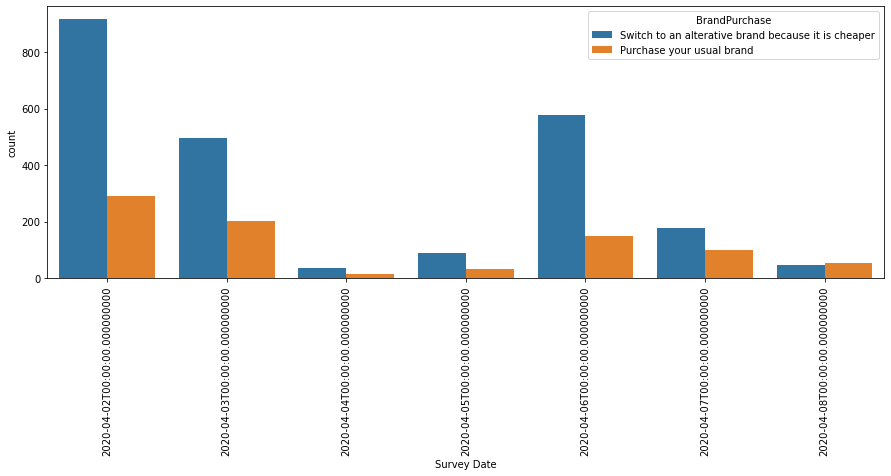

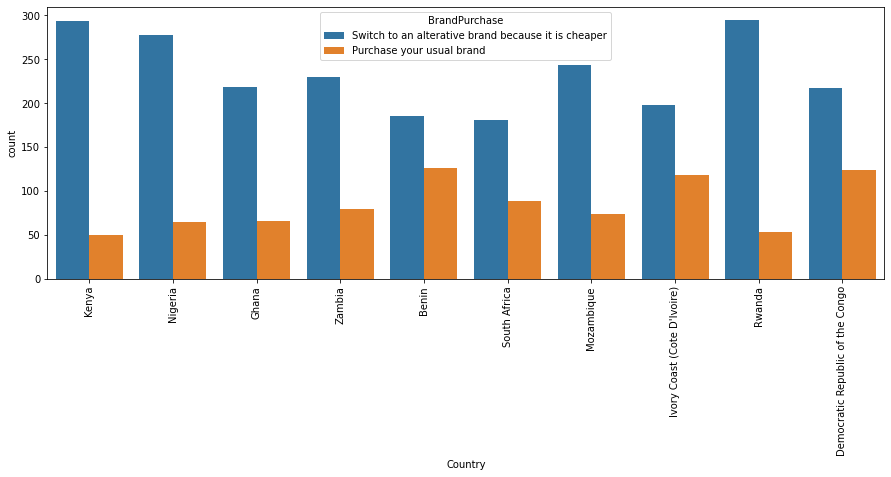

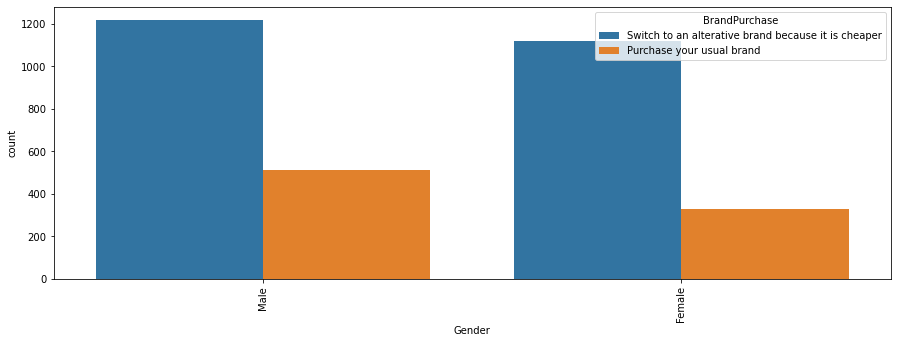

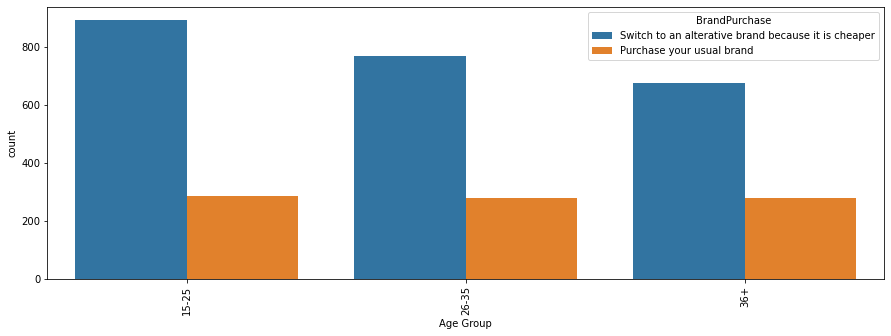

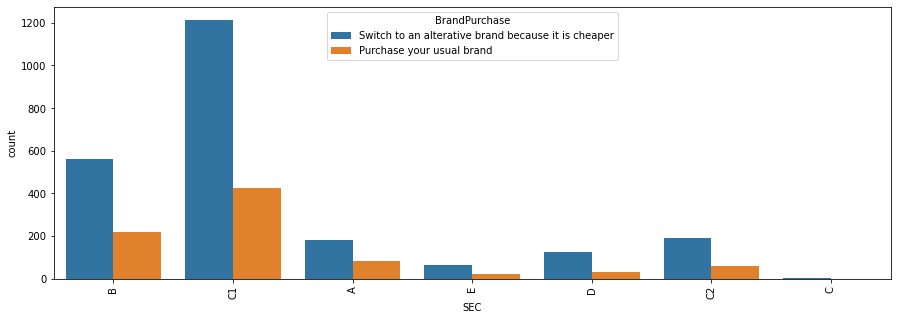

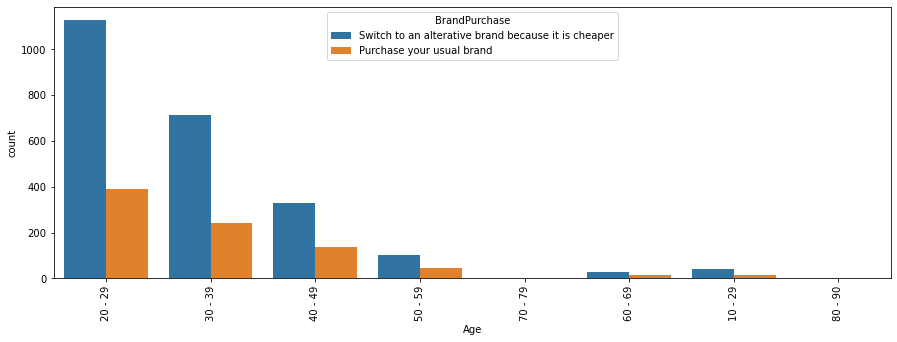

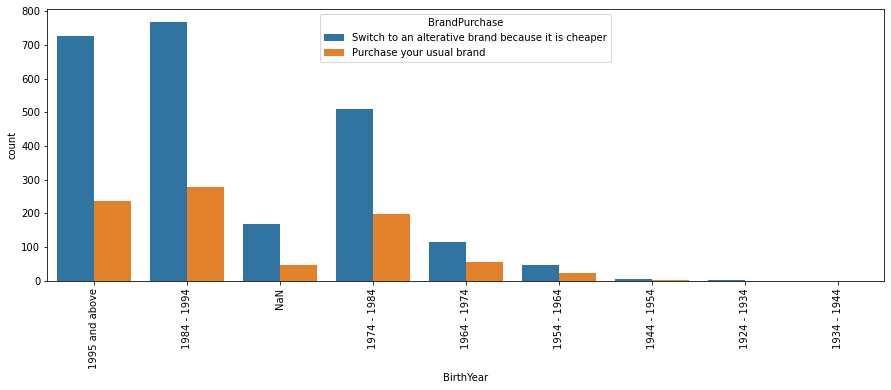

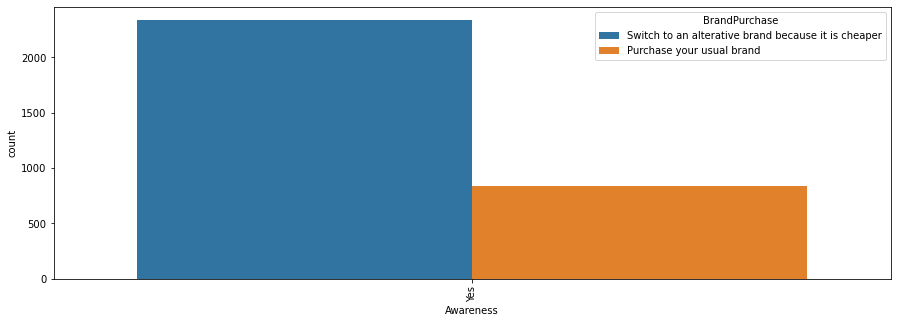

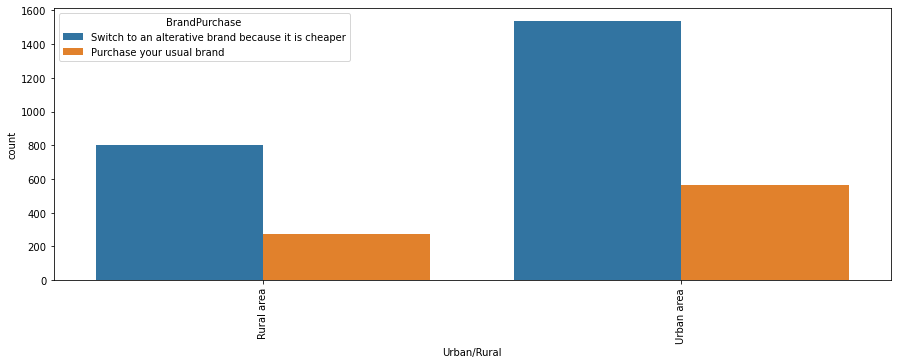

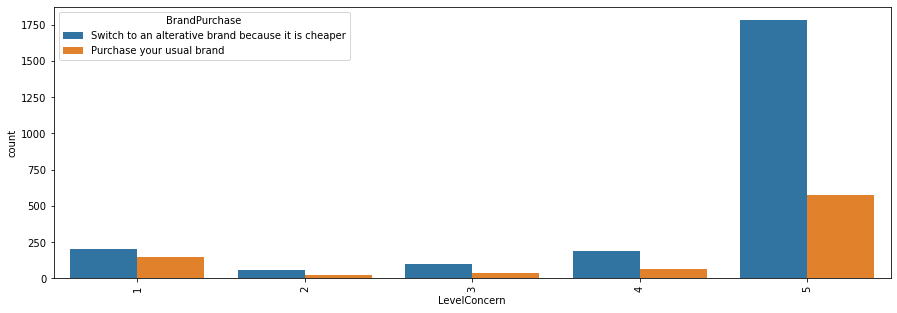

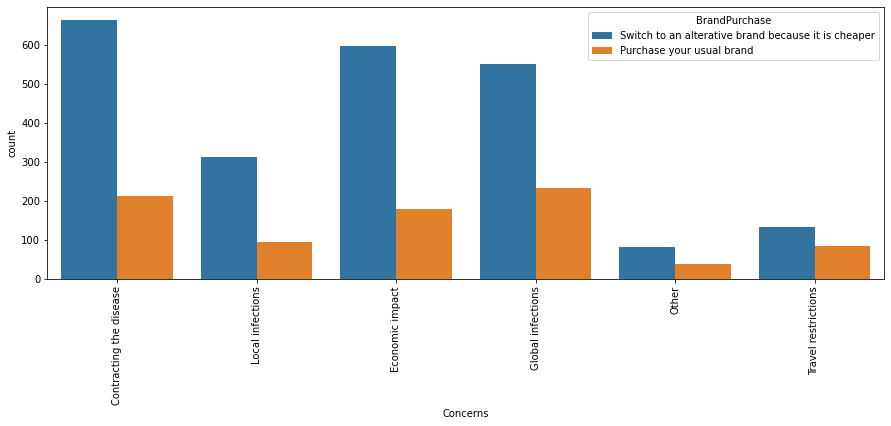

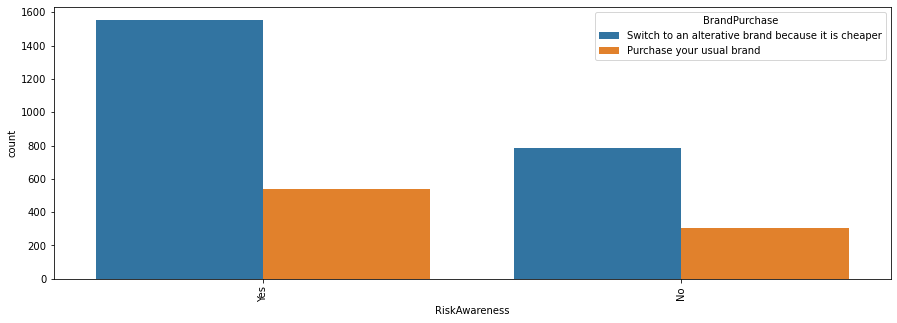

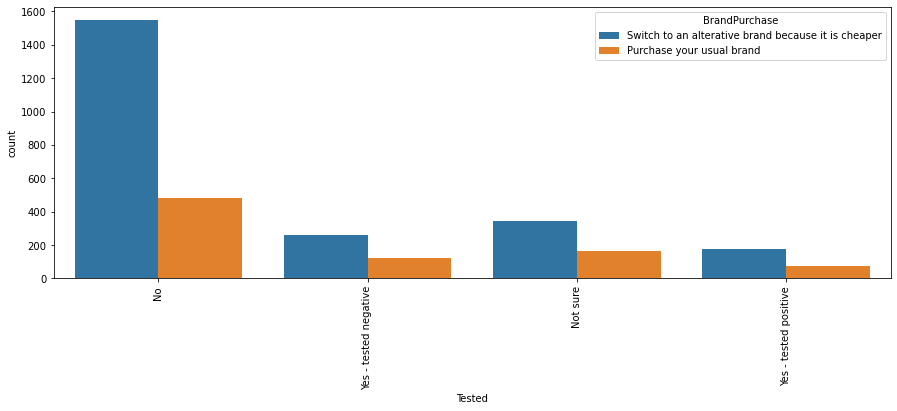

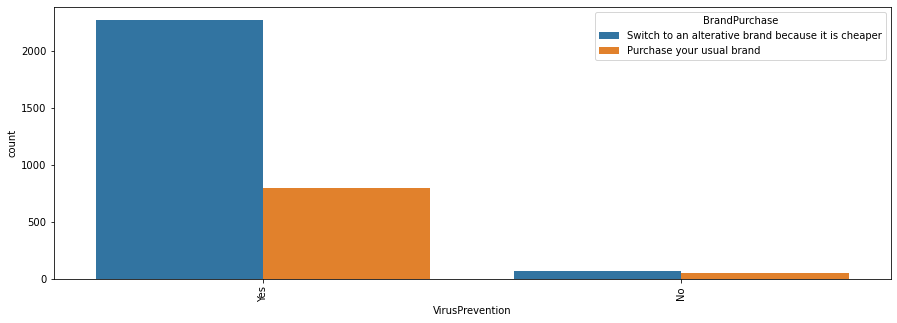

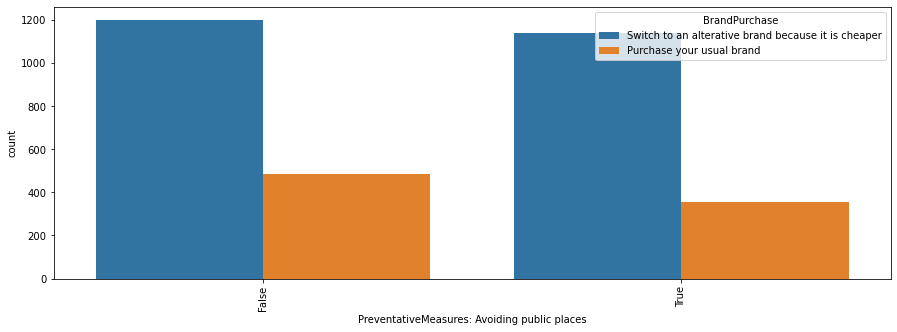

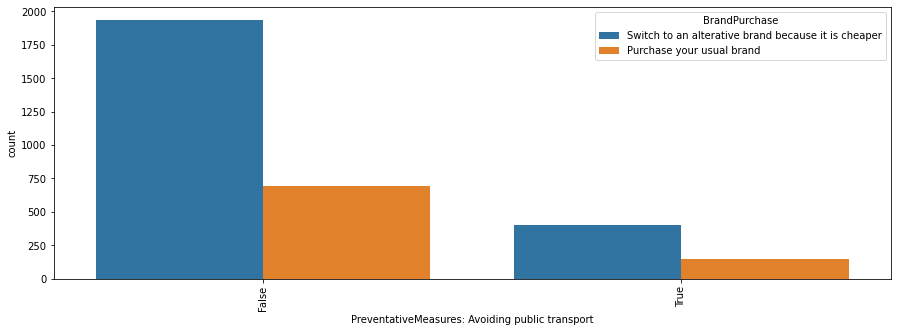

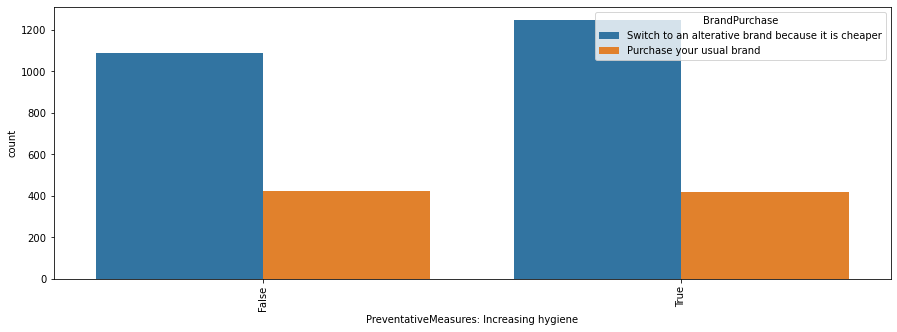

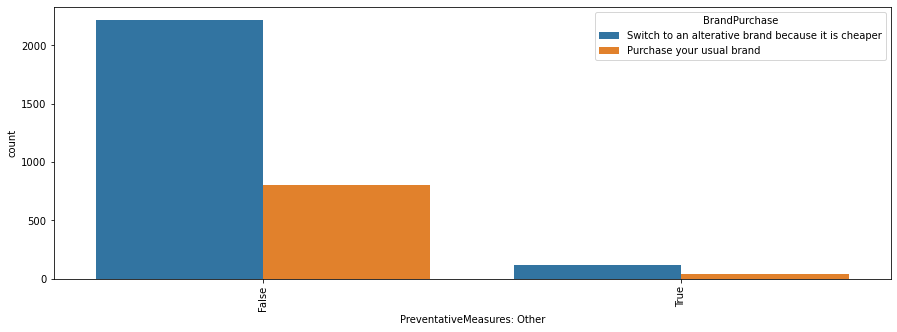

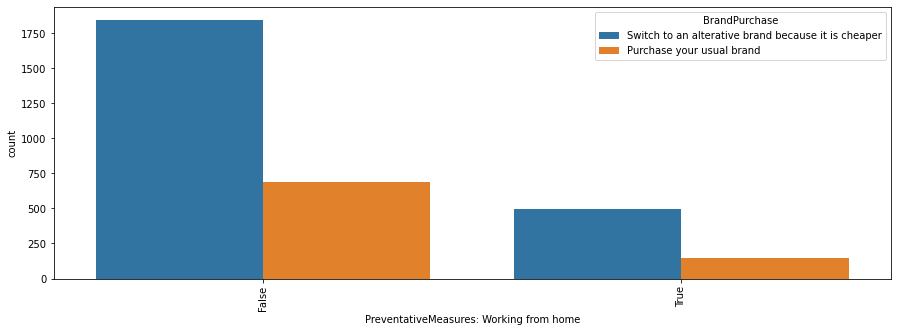

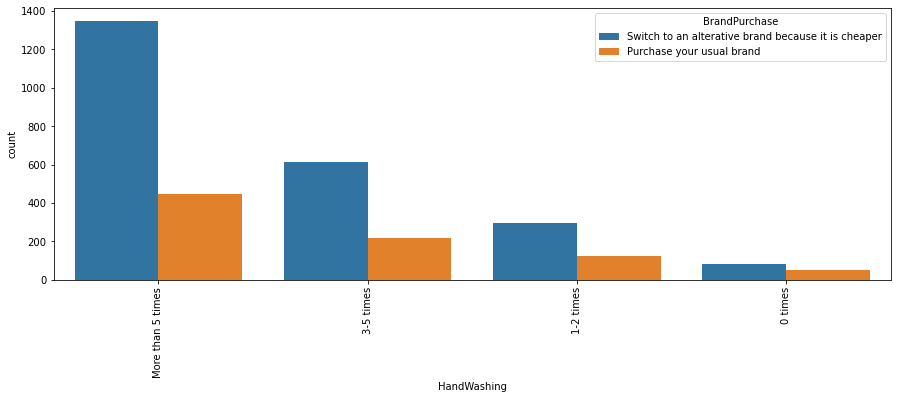

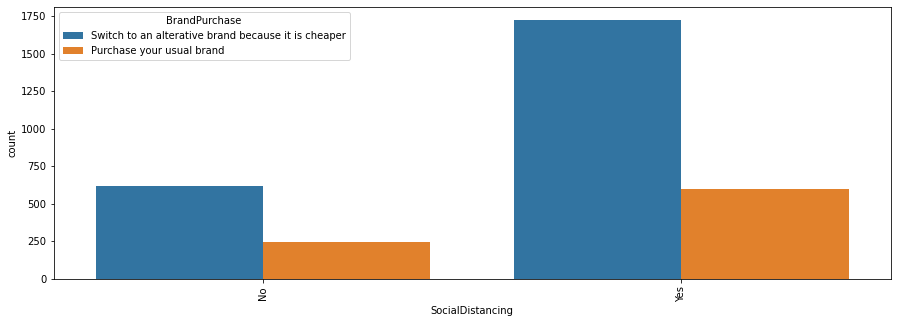

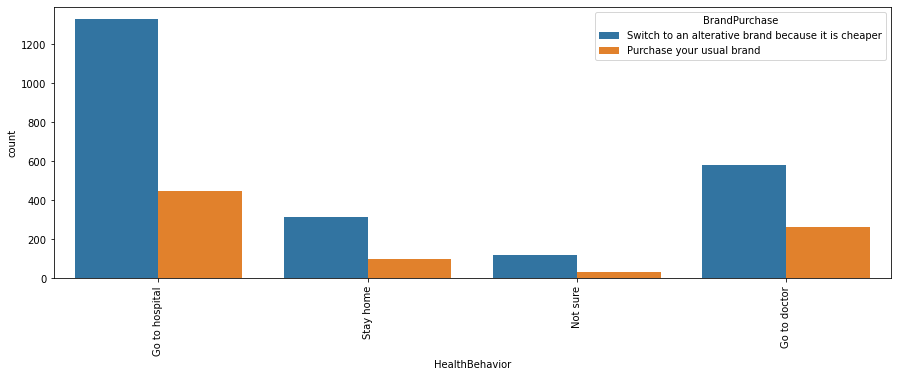

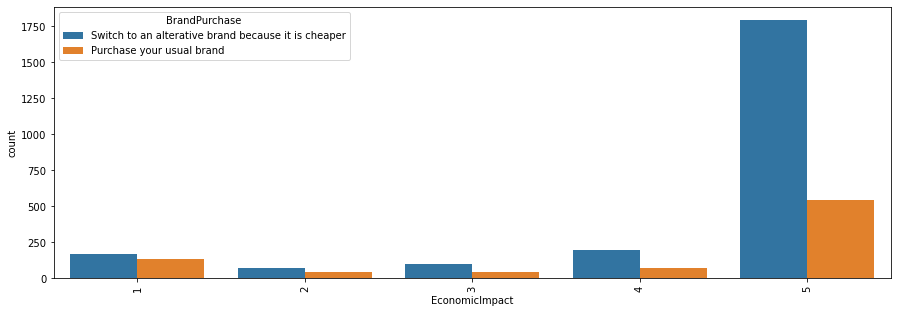

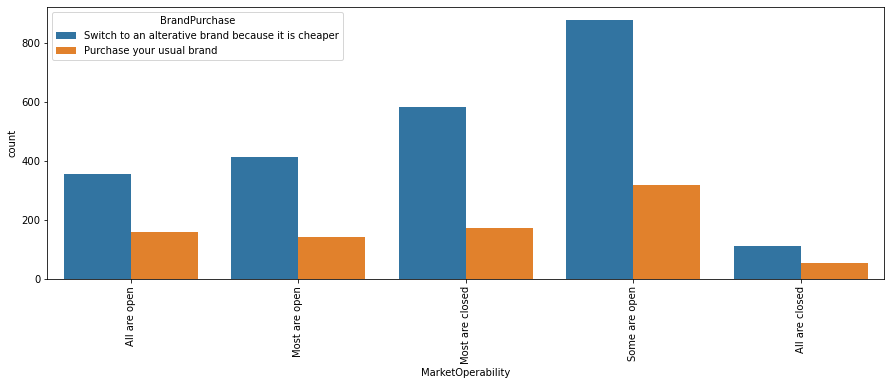

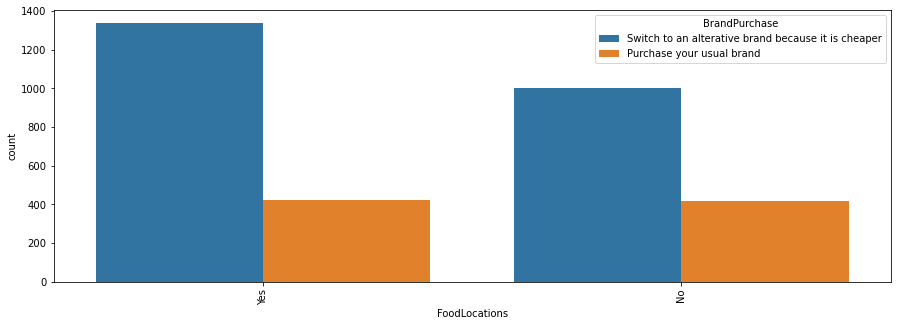

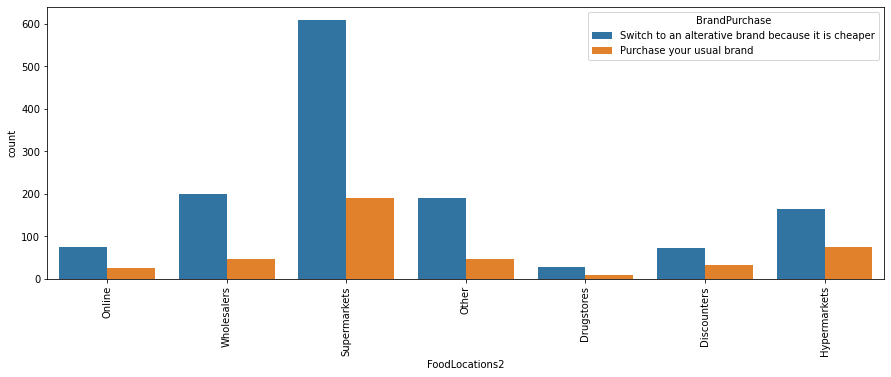

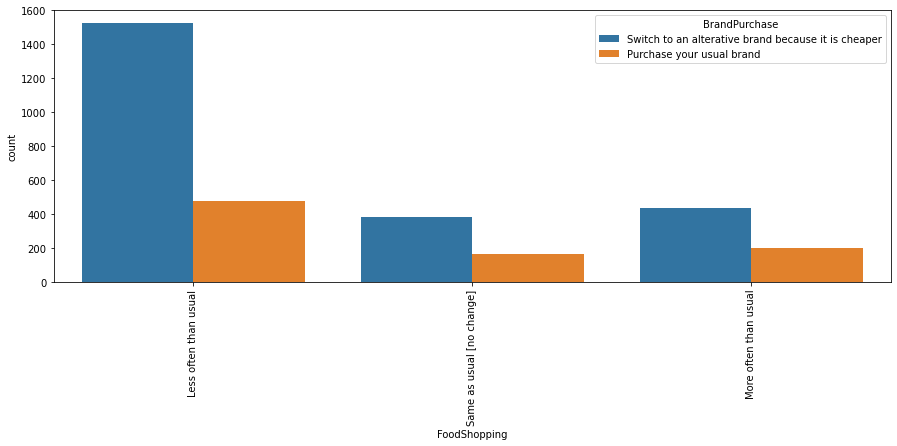

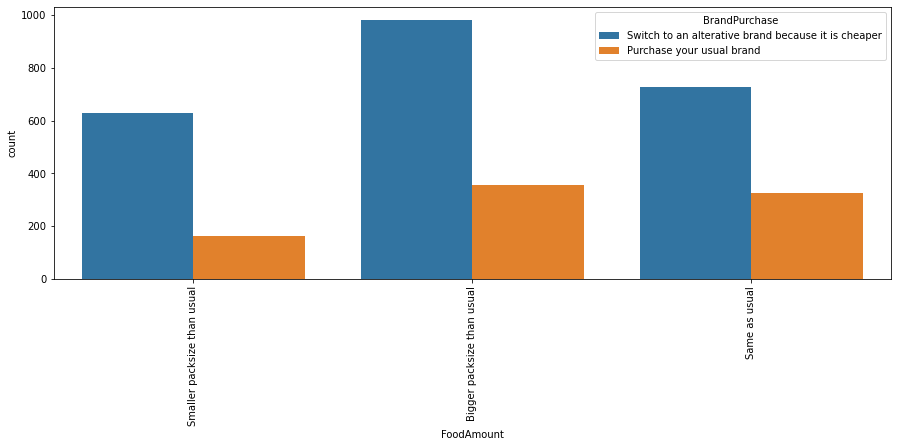

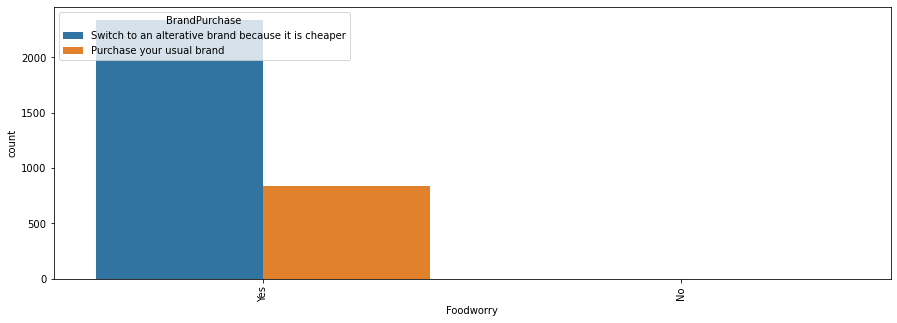

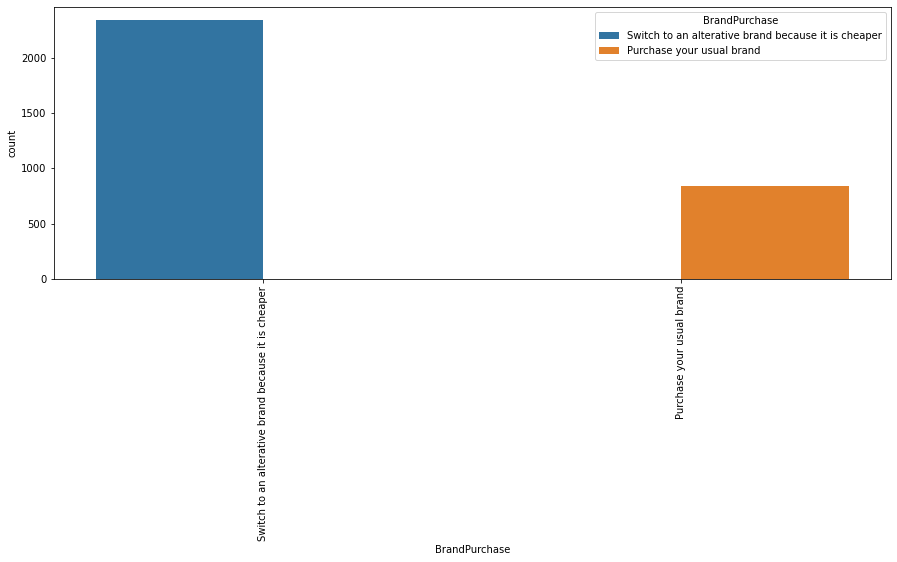

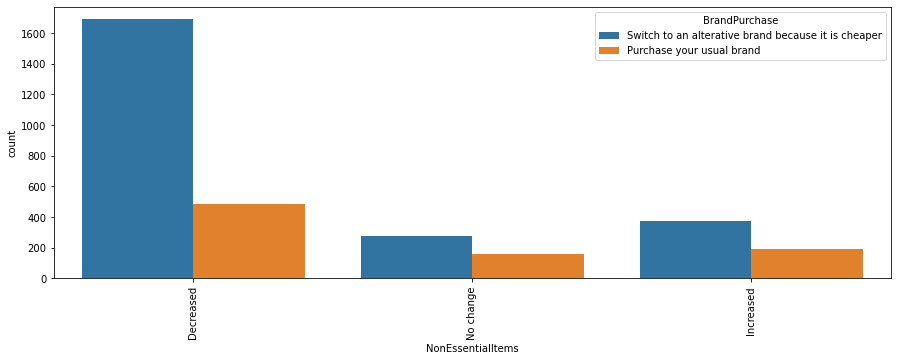

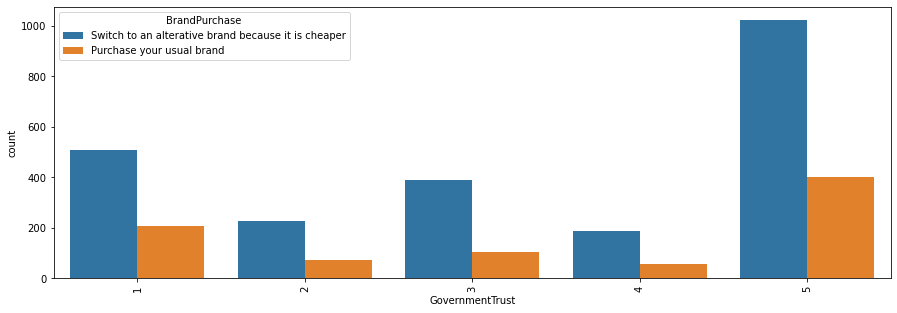

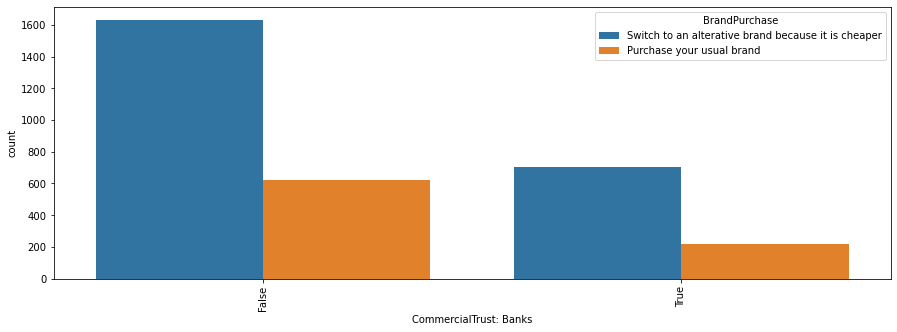

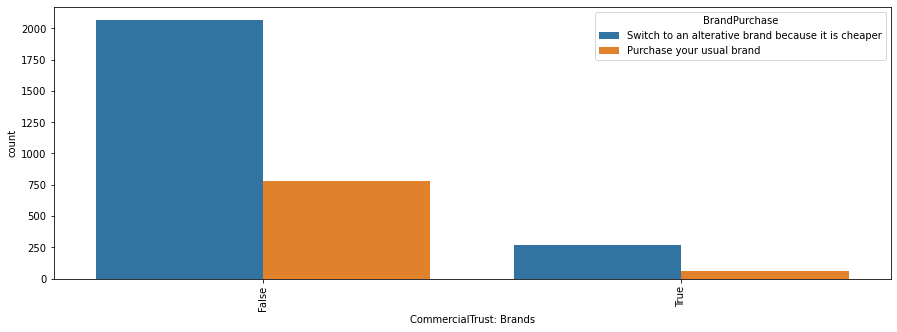

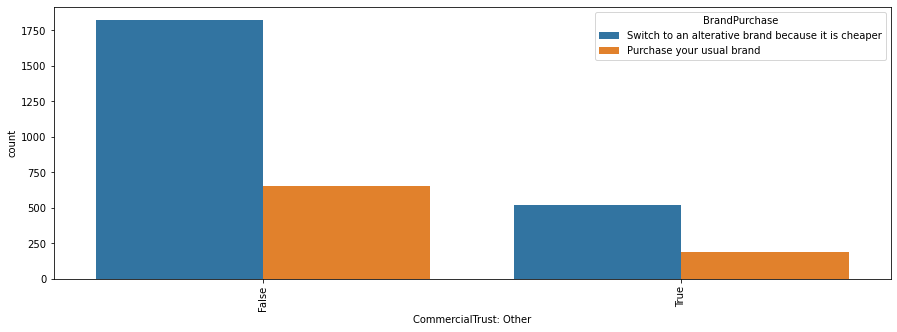

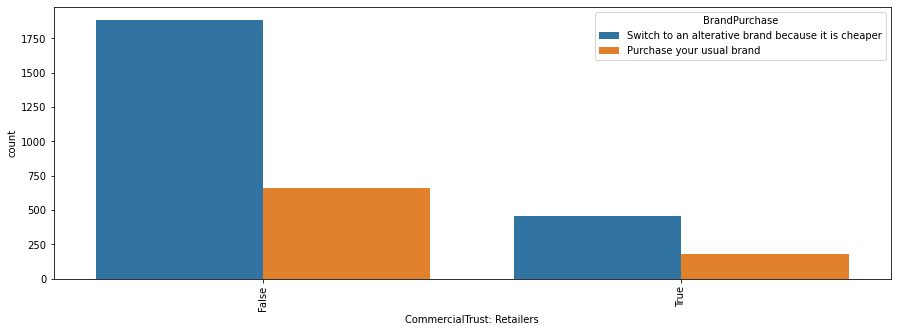

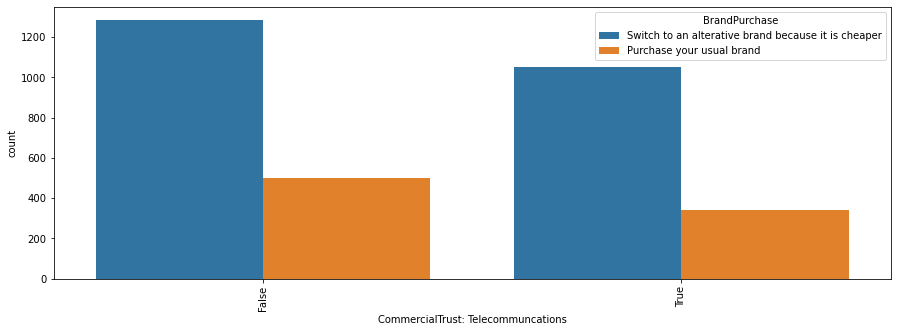

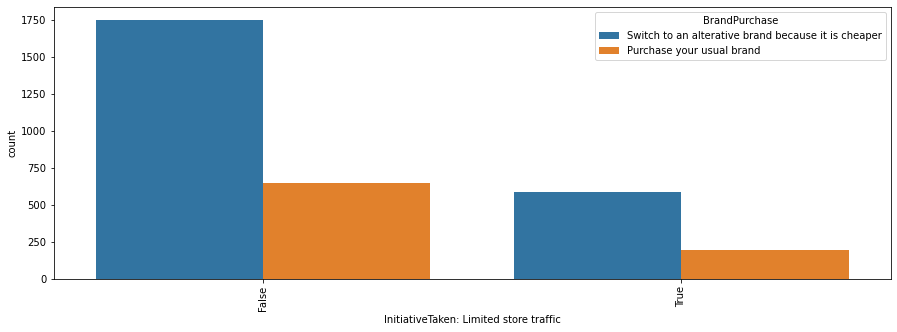

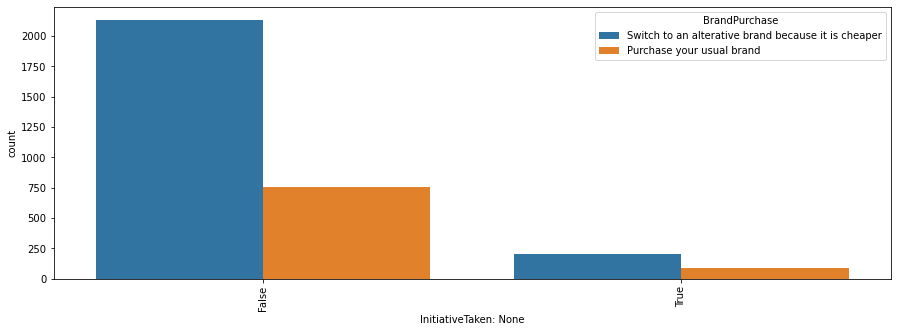

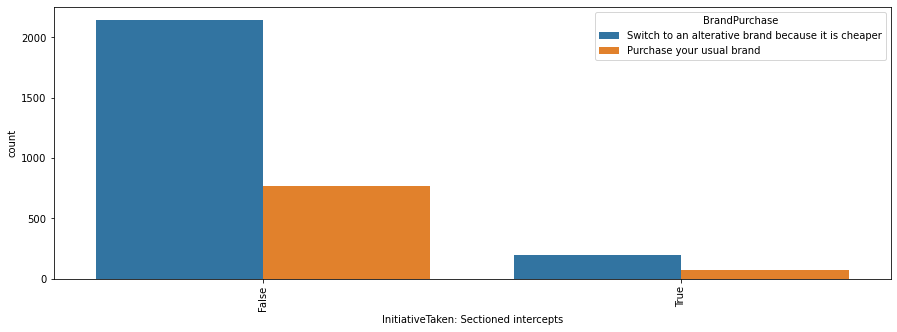

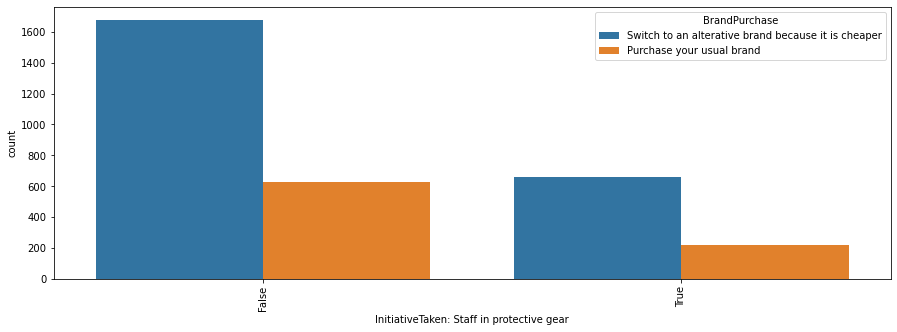

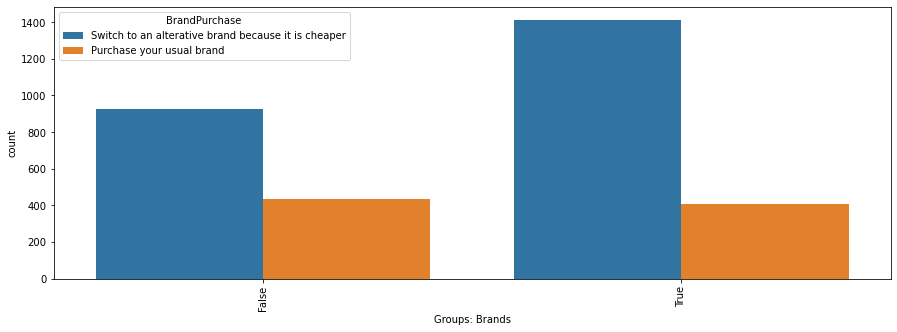

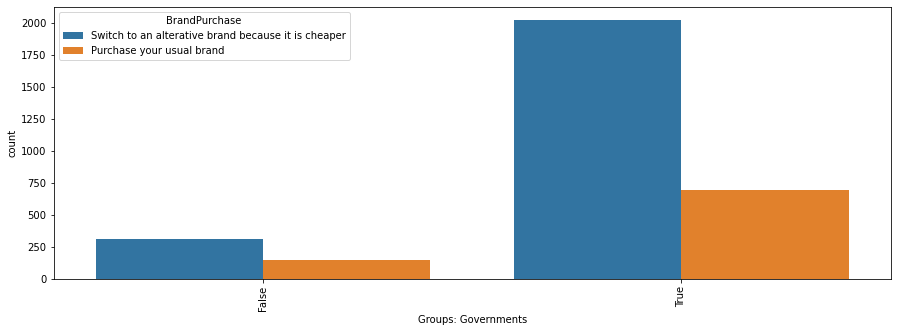

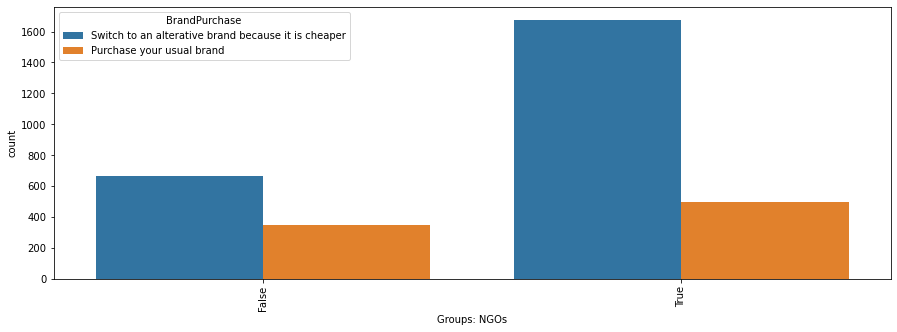

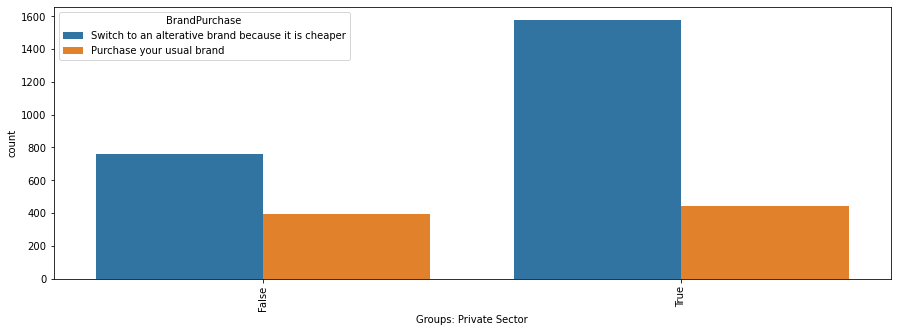

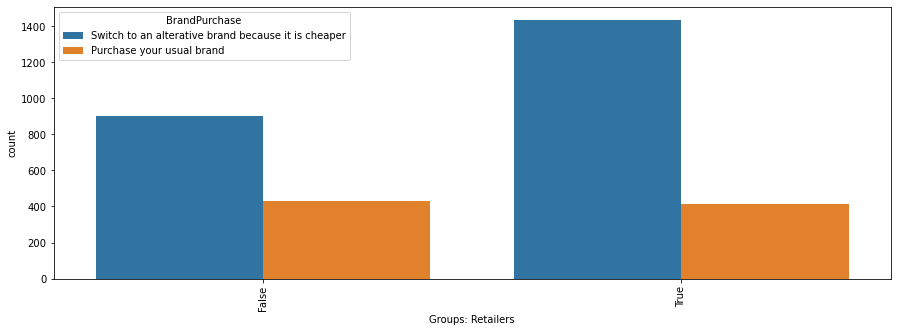

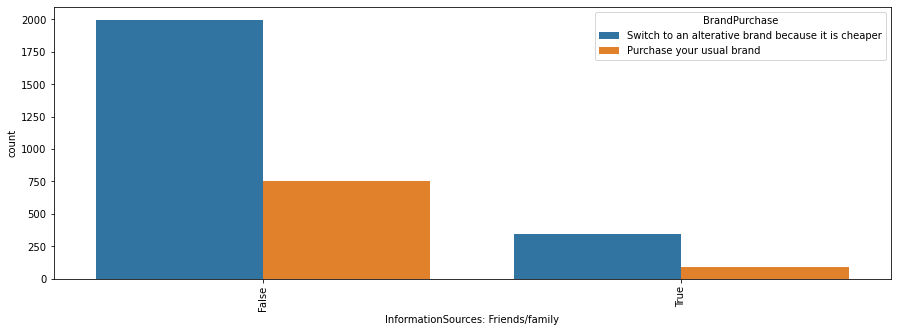

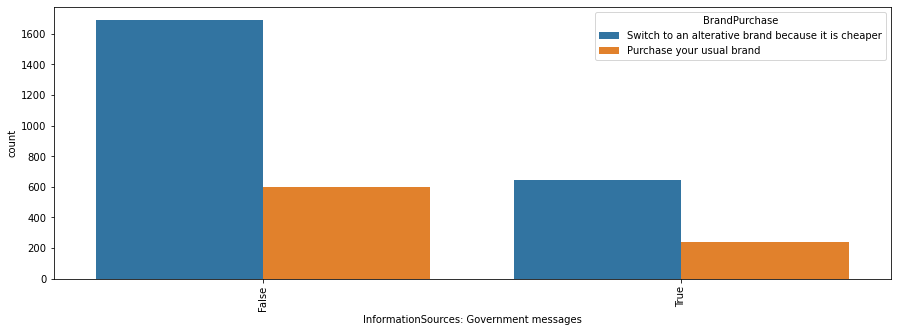

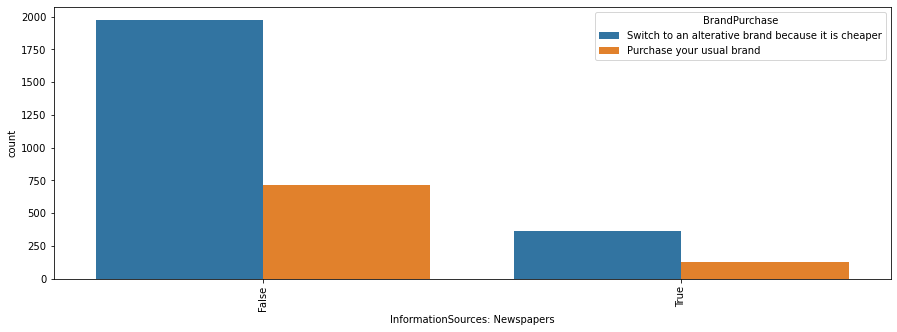

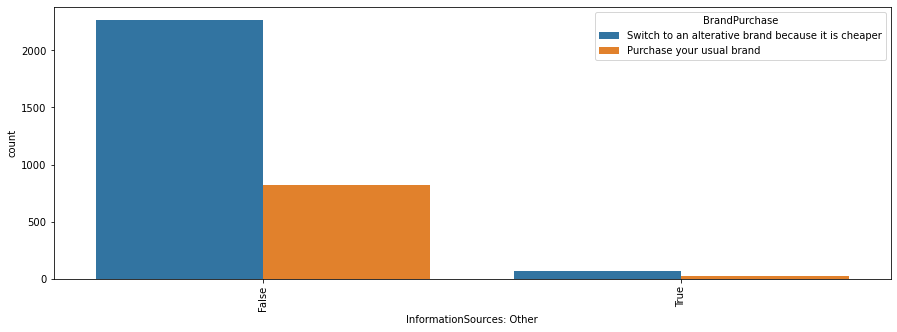

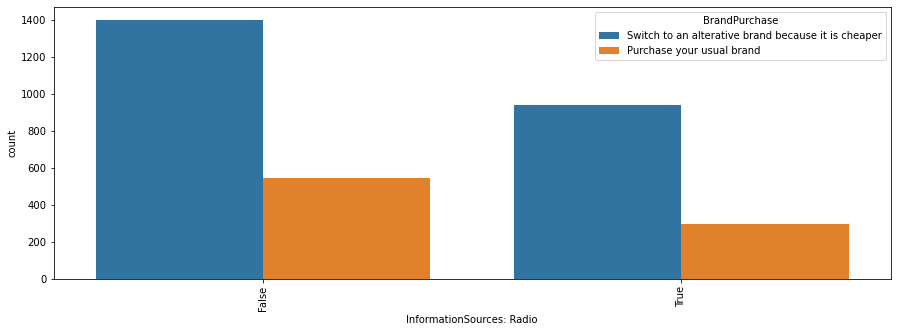

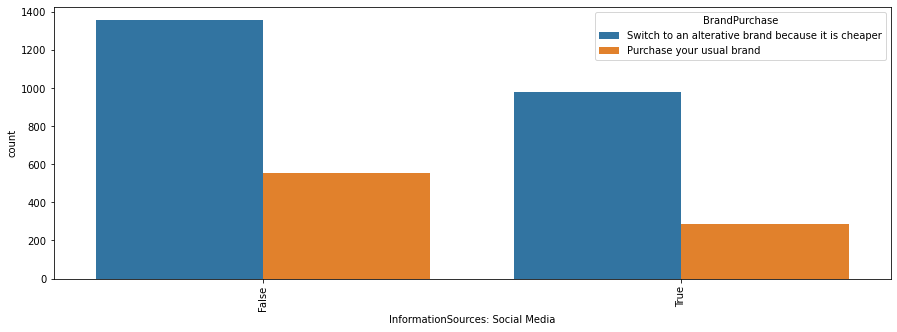

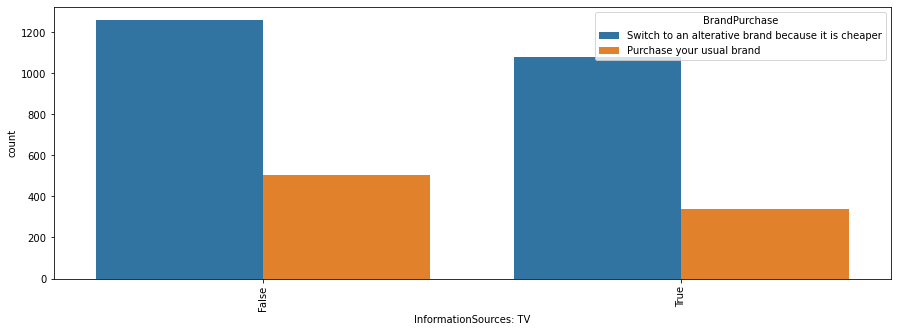

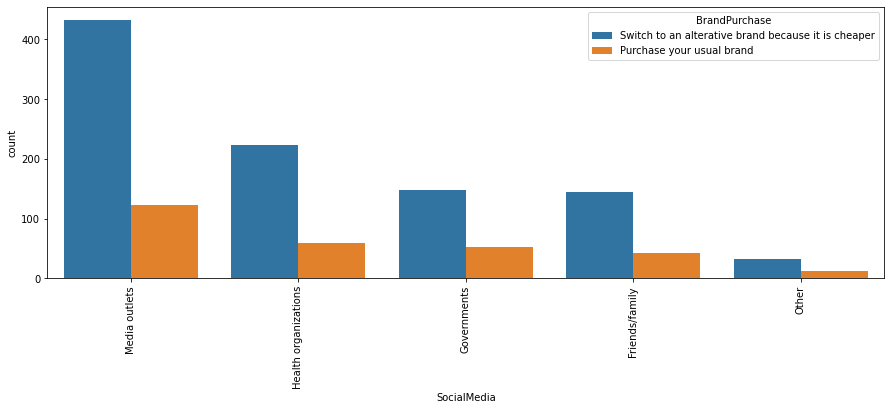

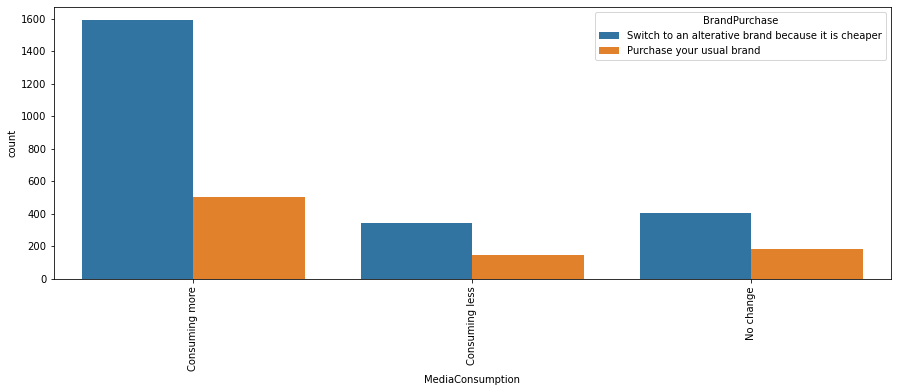

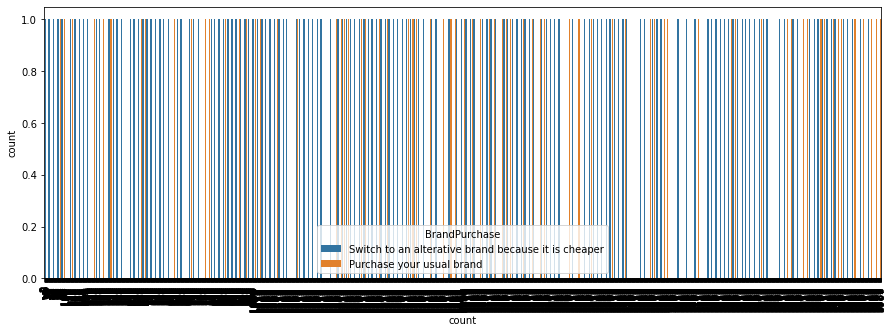

In [16]:
# loop through to visualize if possible
bp = new_rawData["BrandPurchase"]
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= bp, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<br>
<h2>Visualization for all the columns agains the second target variable (Food Shopping)</h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_21484\4002867920.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


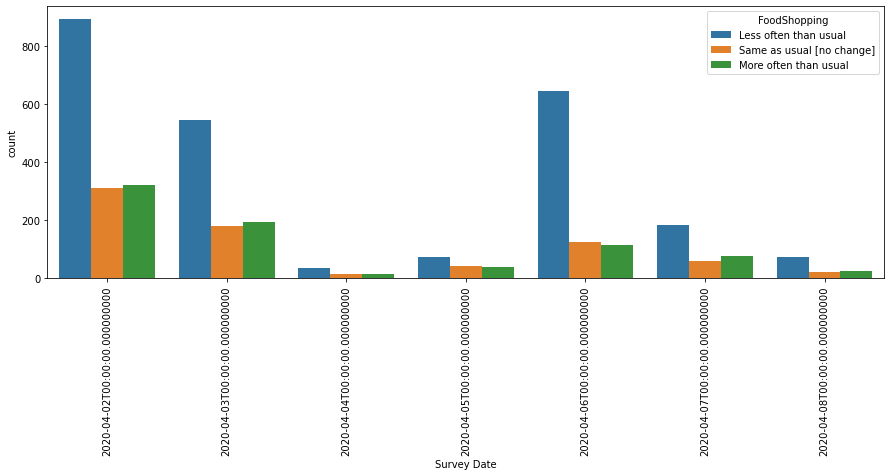

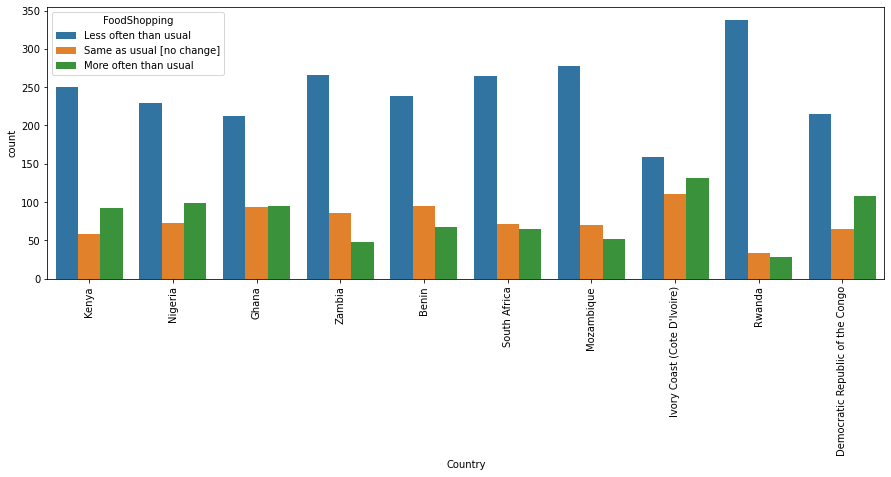

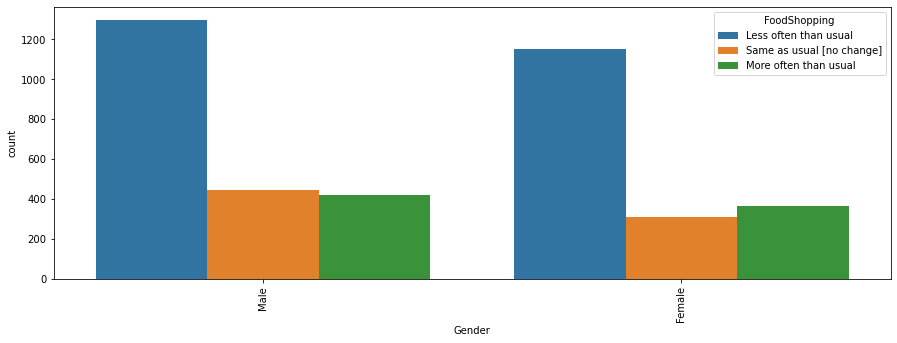

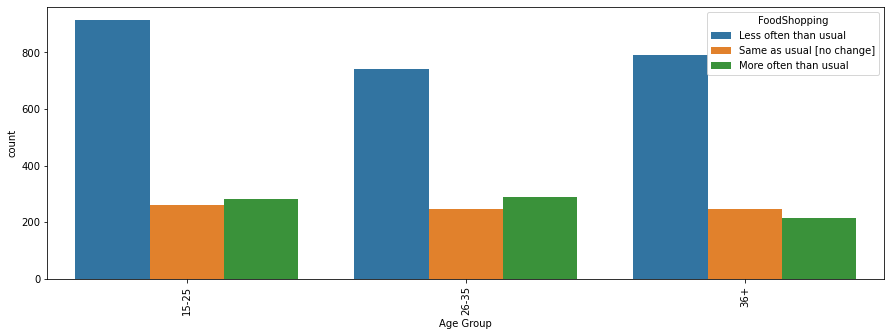

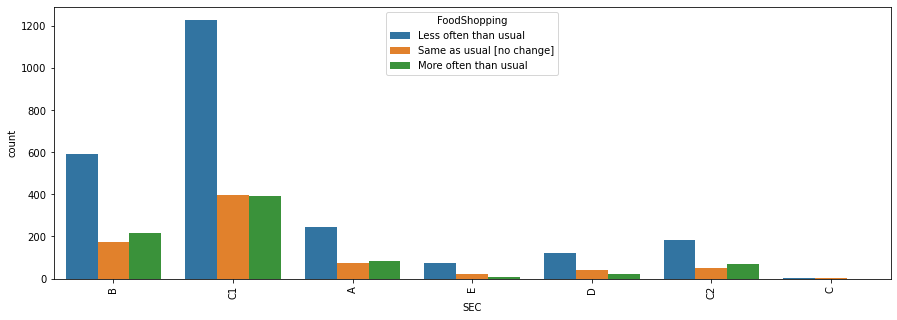

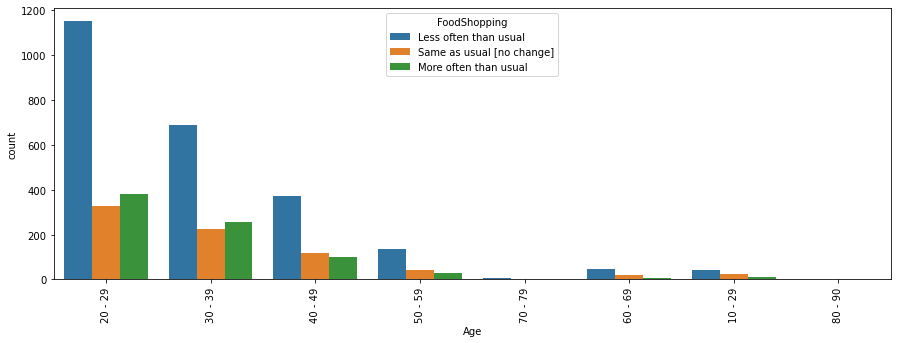

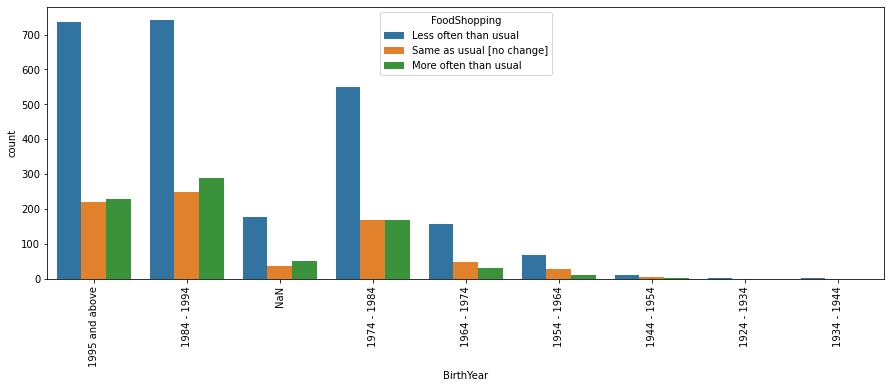

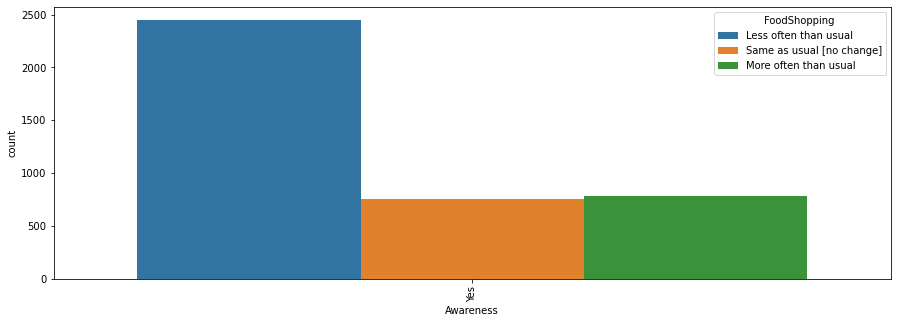

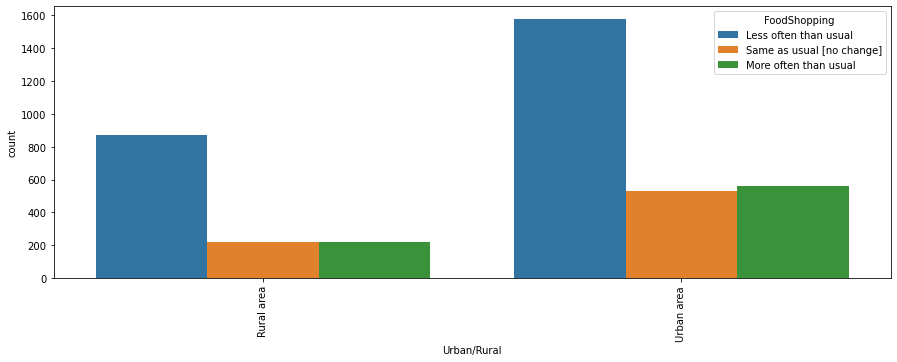

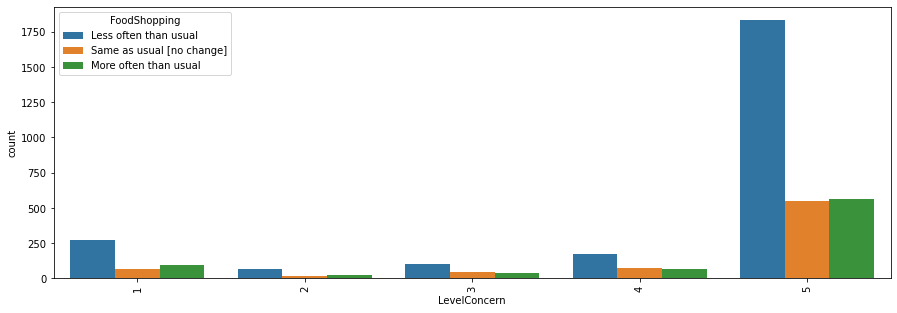

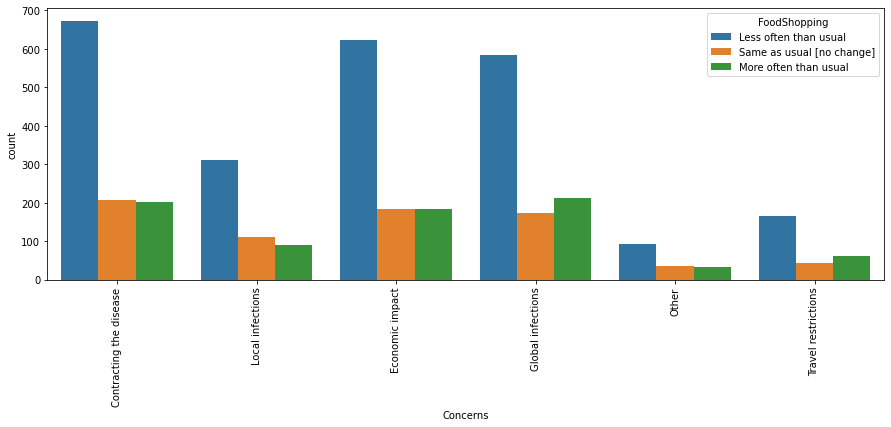

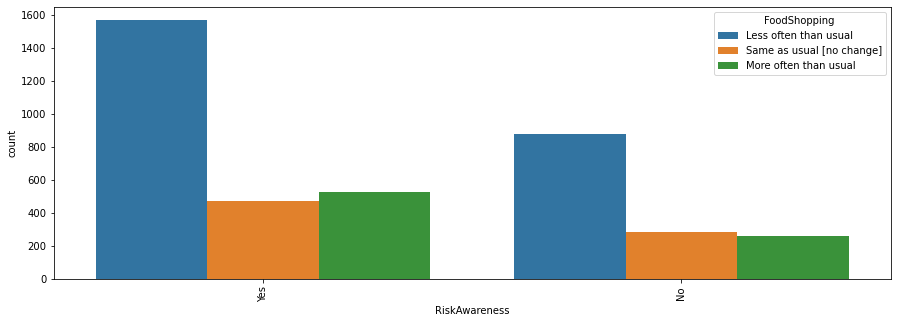

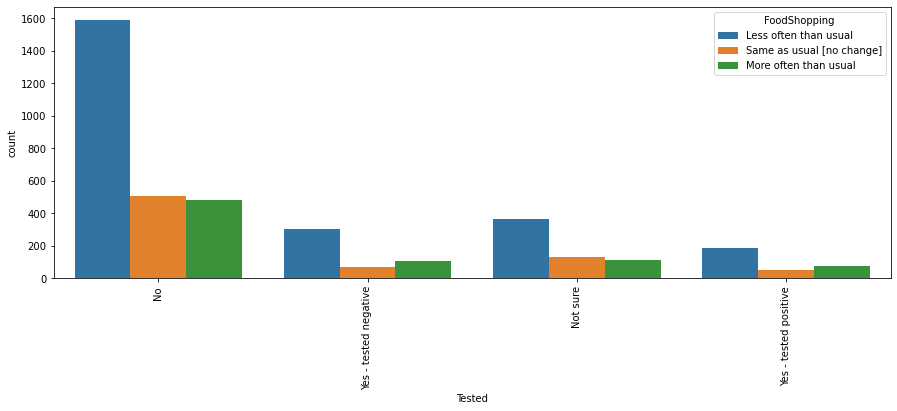

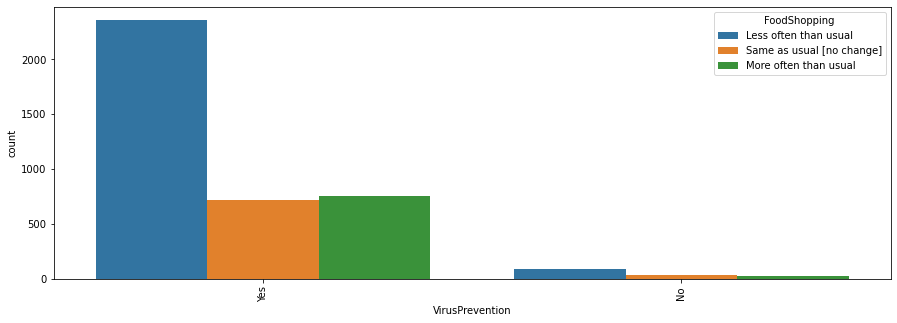

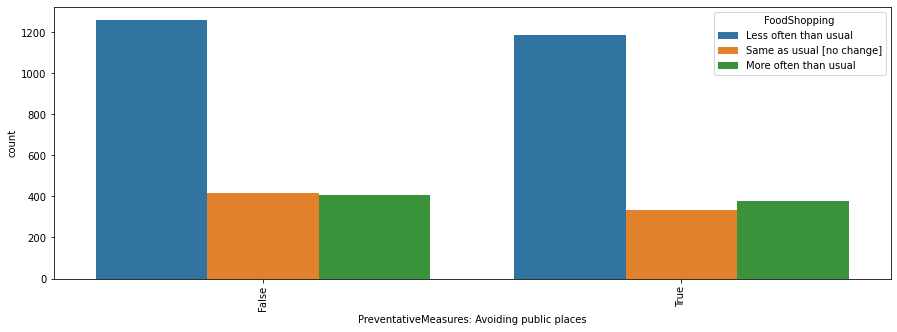

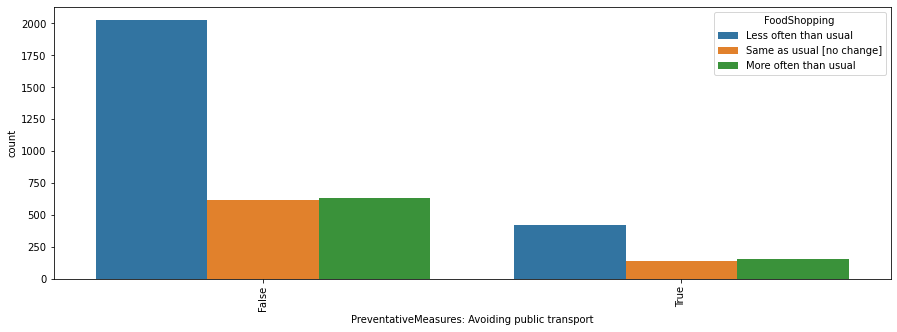

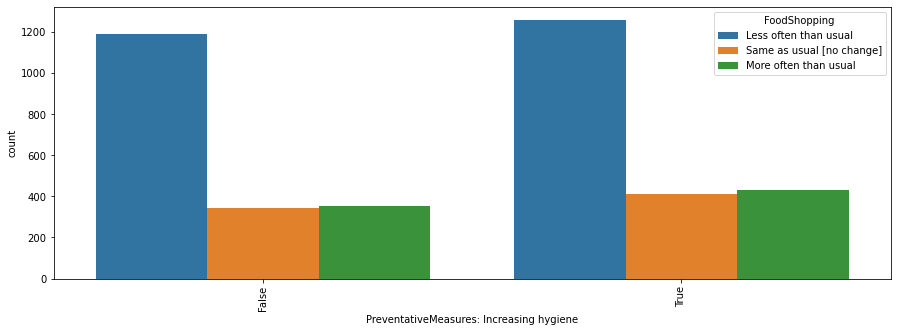

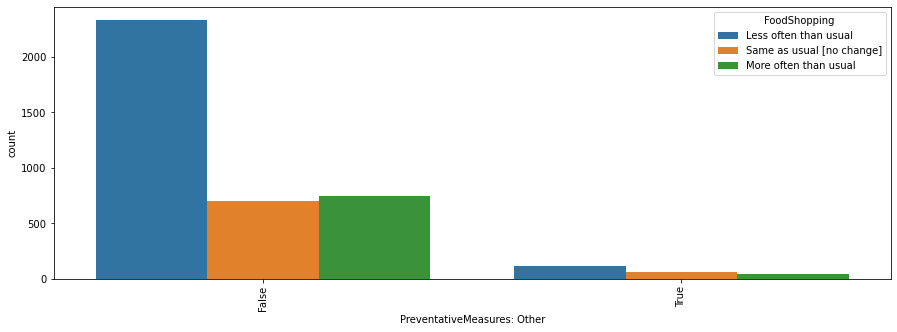

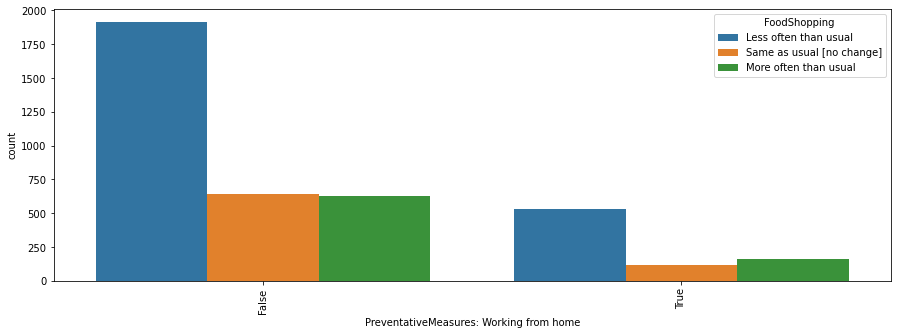

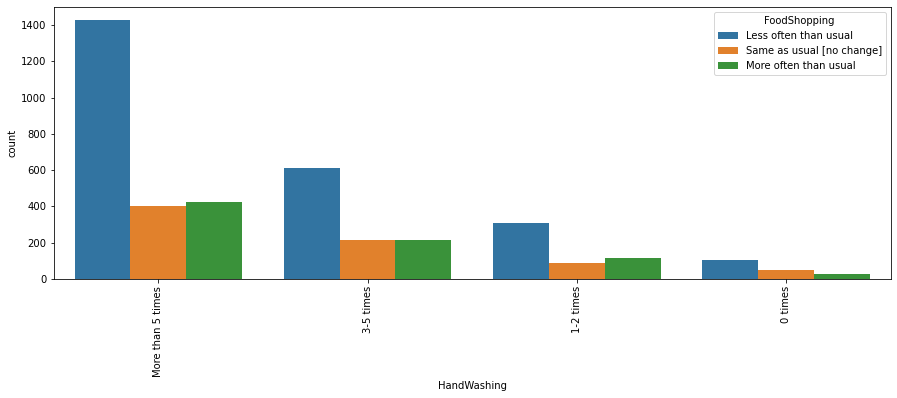

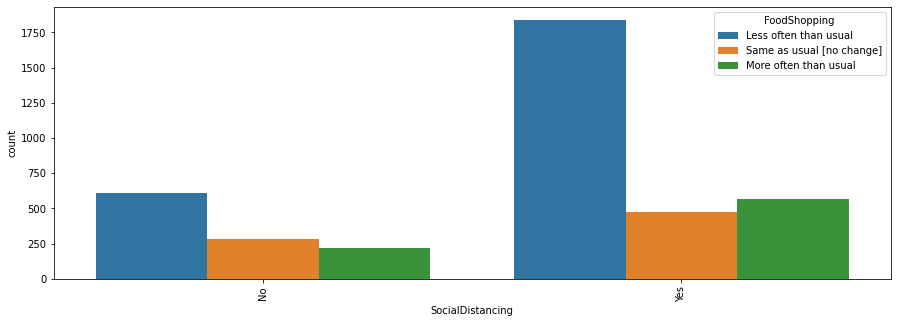

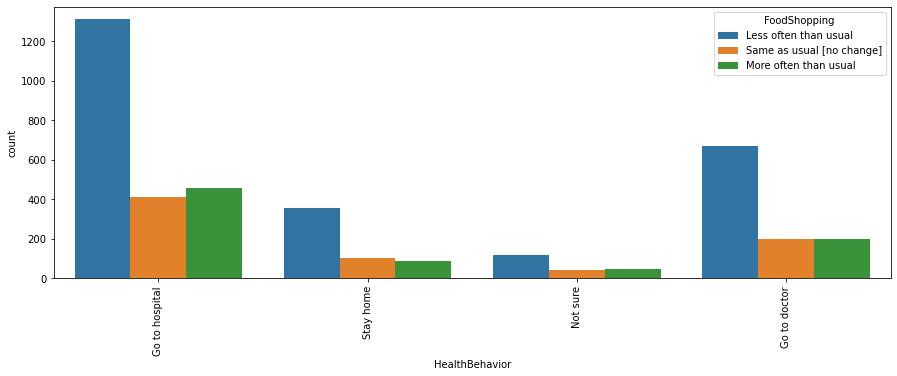

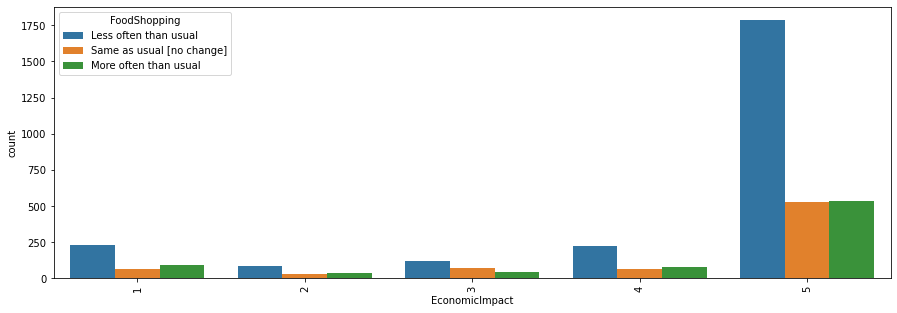

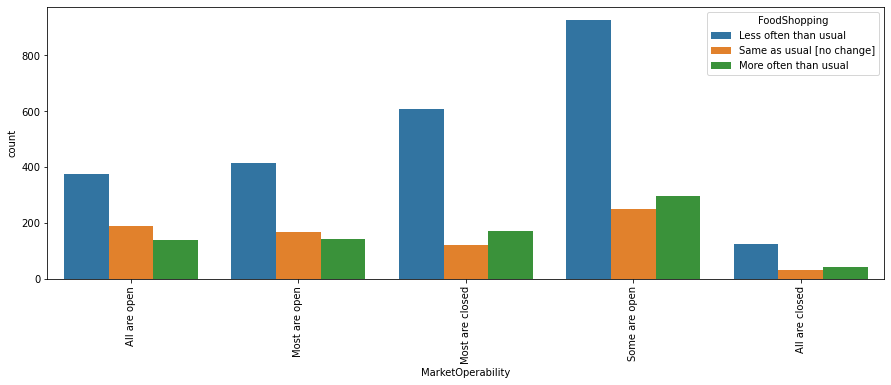

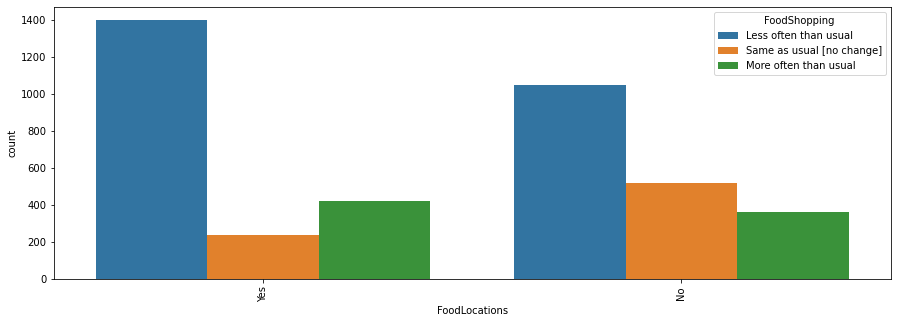

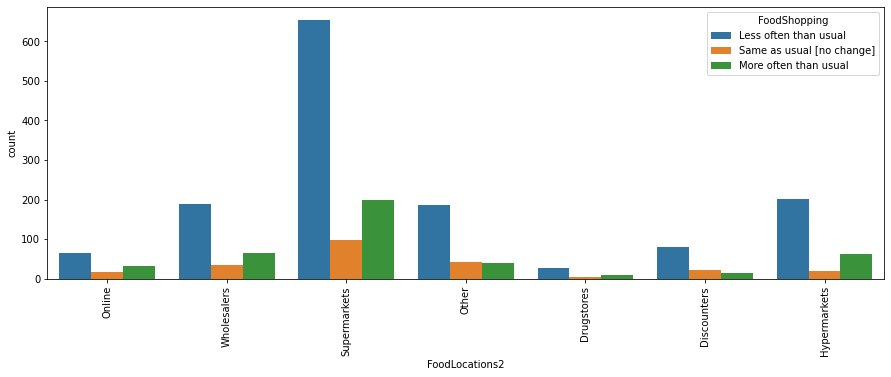

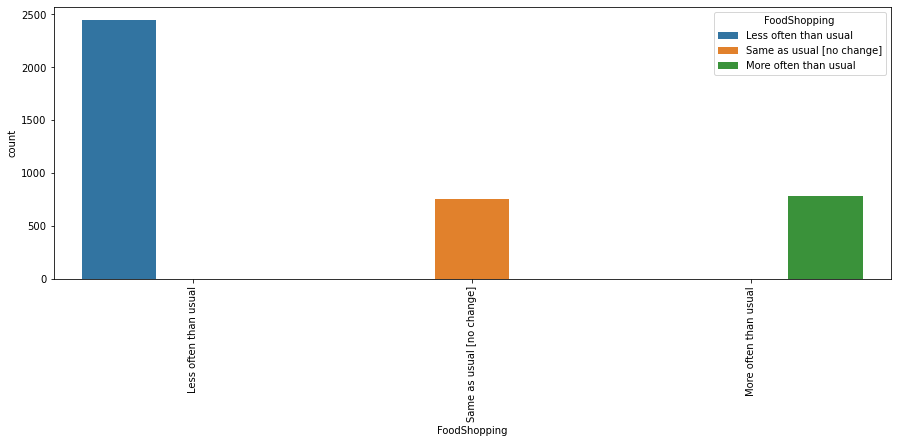

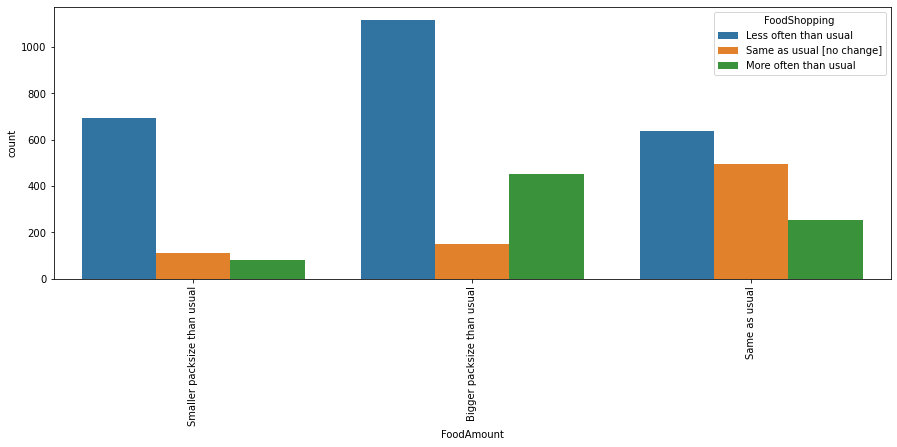

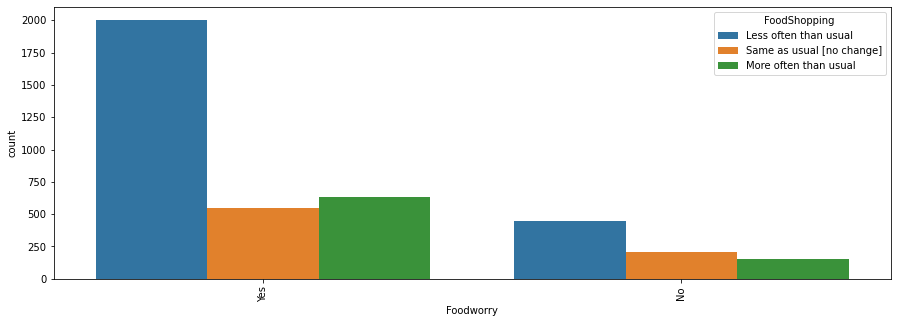

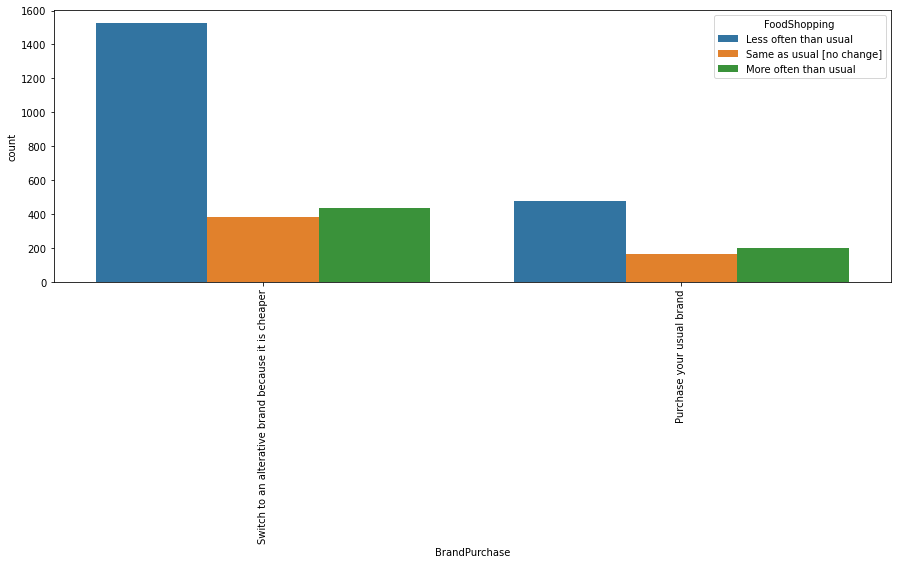

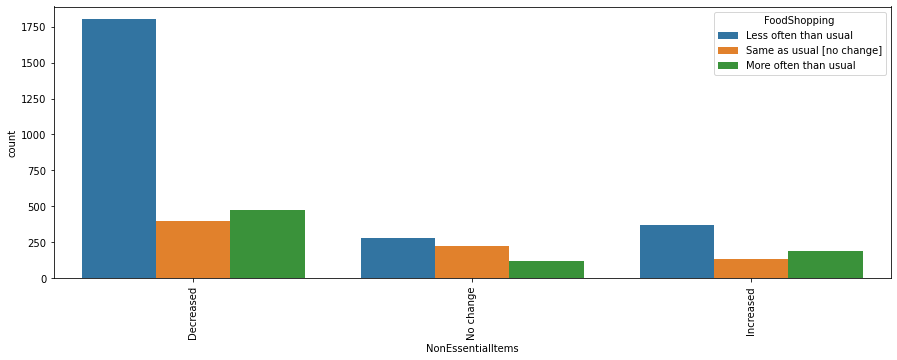

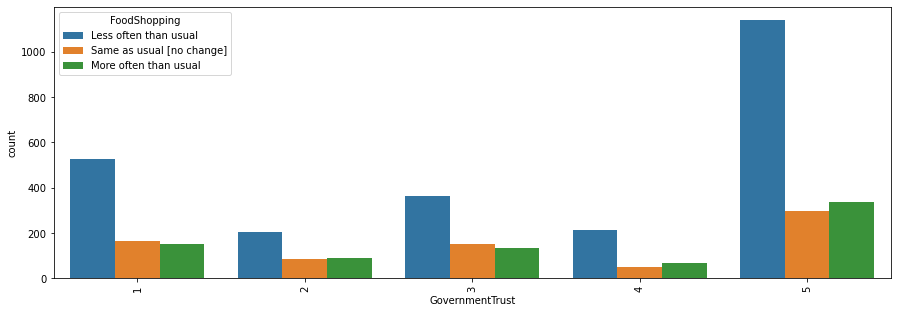

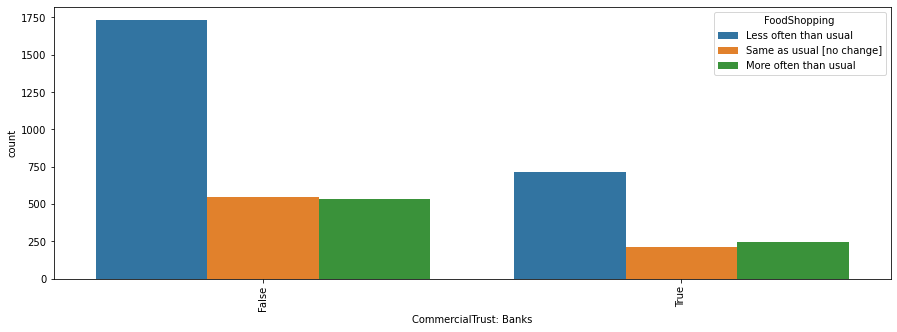

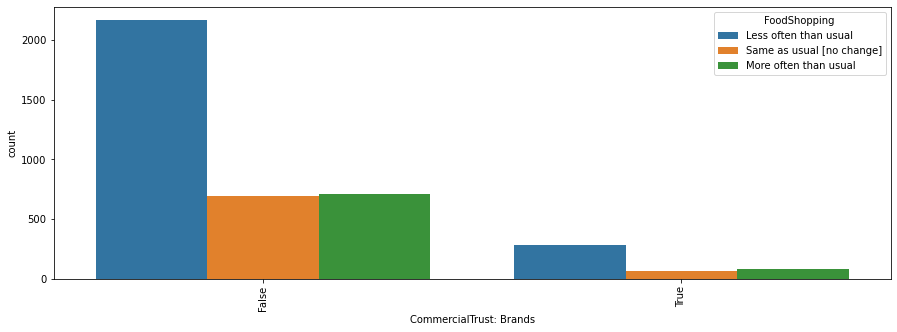

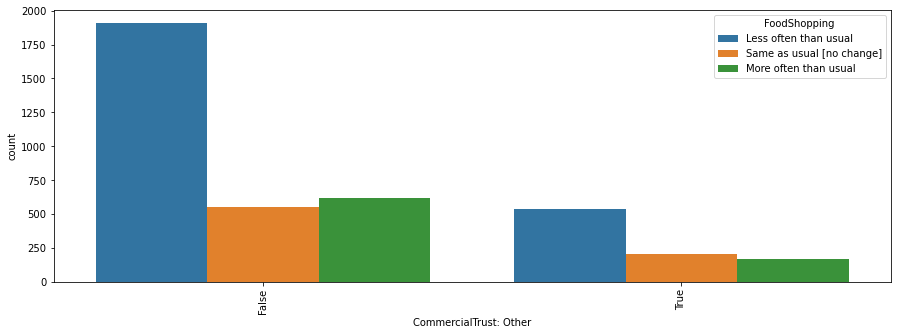

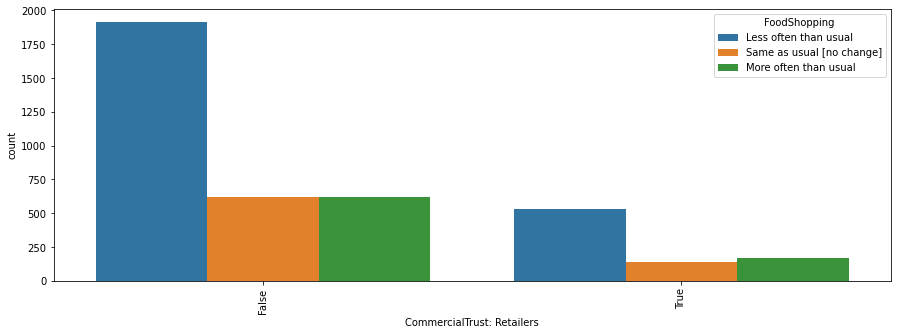

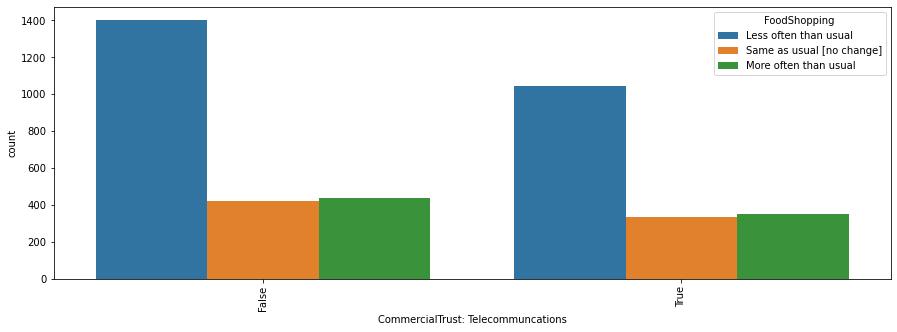

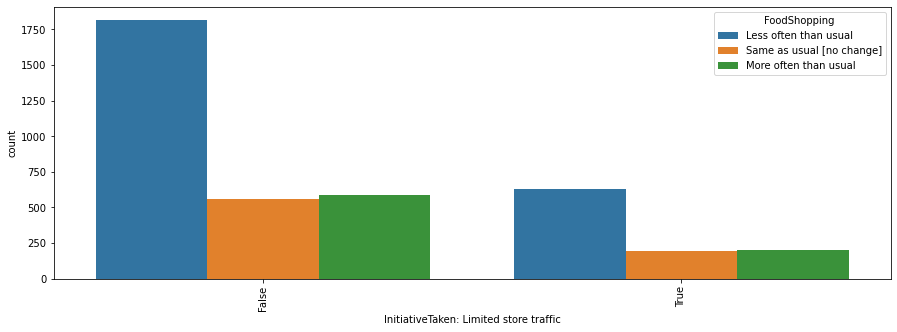

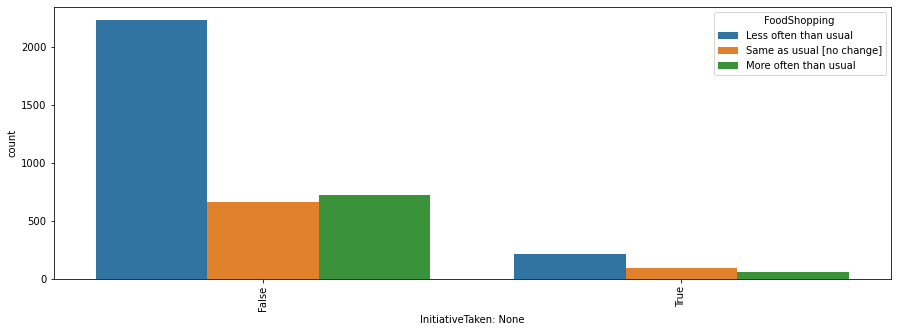

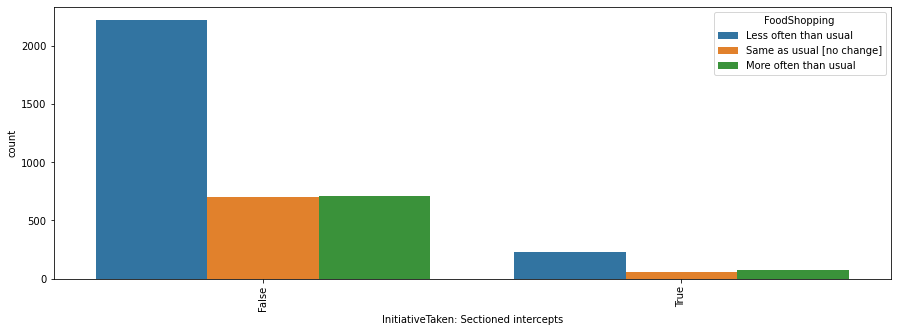

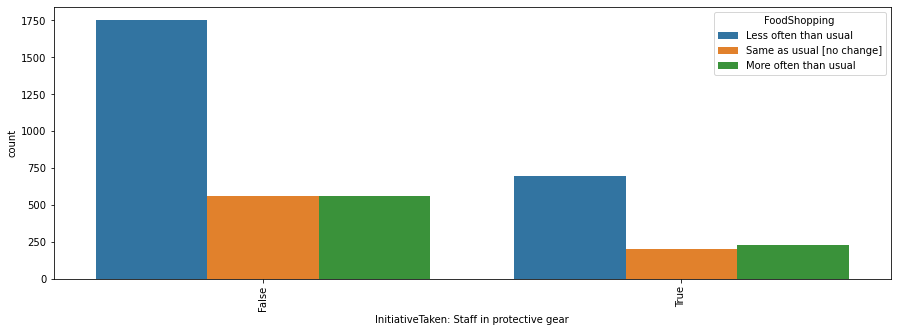

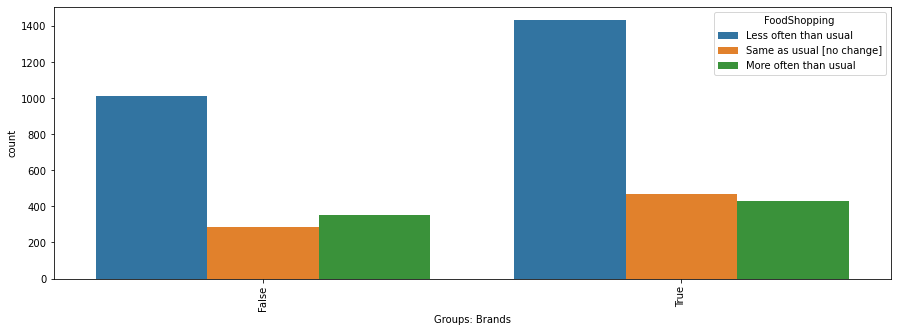

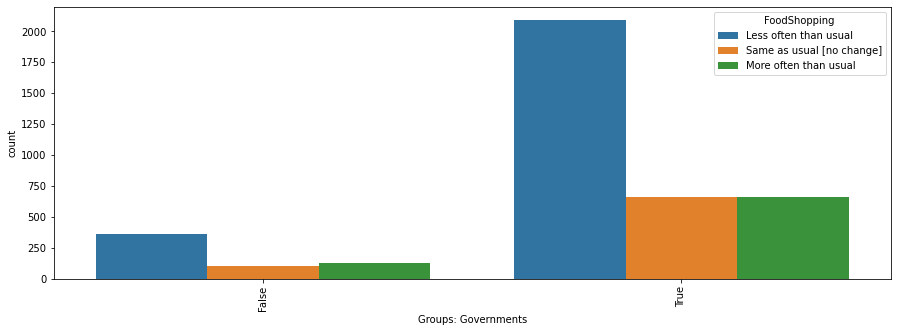

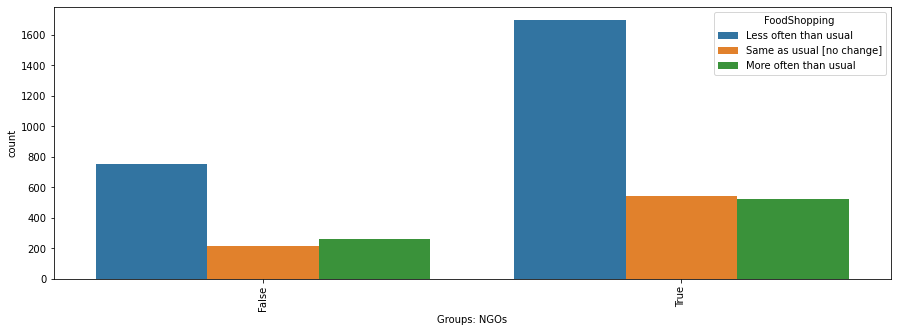

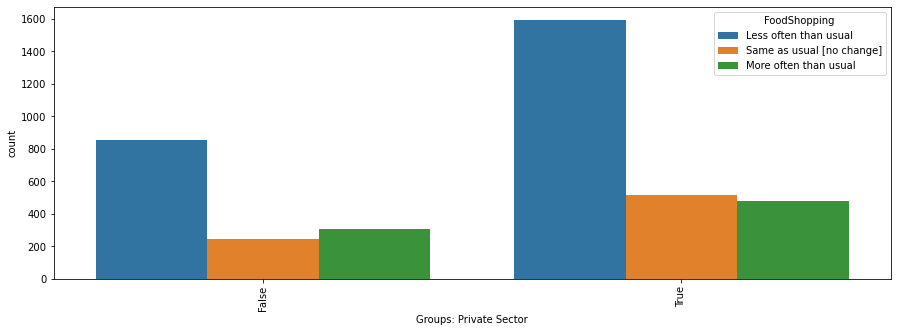

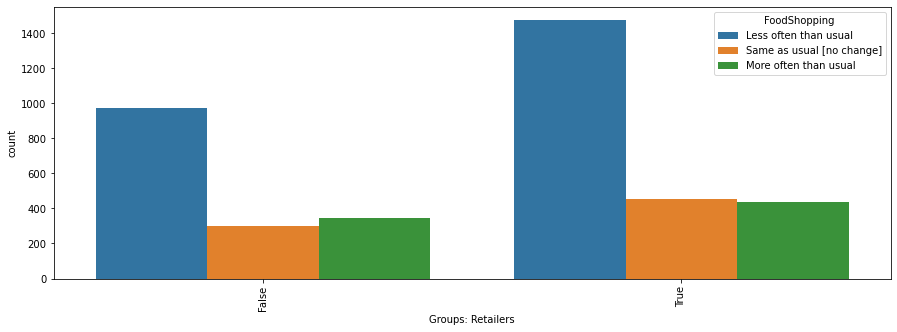

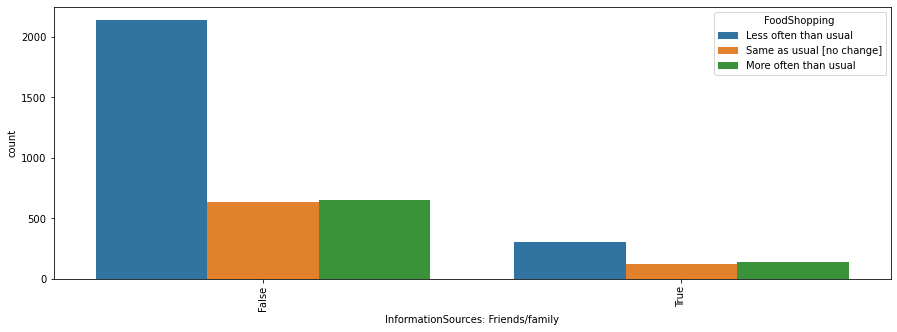

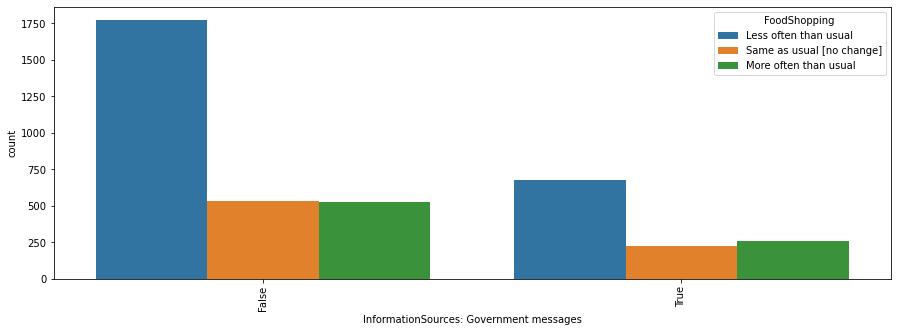

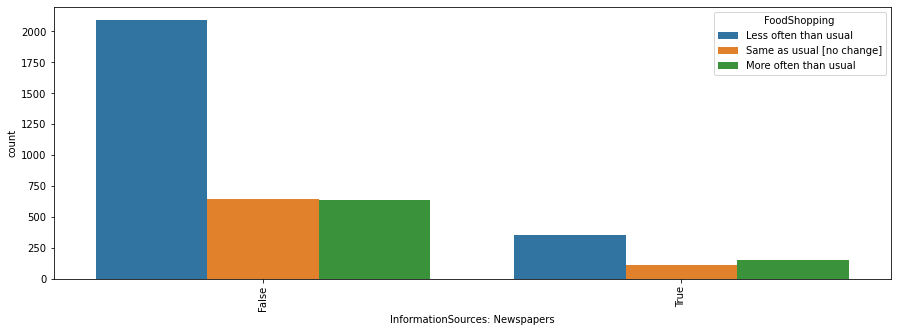

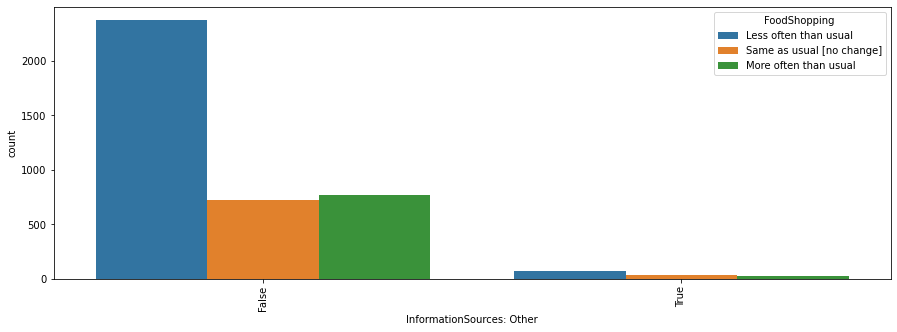

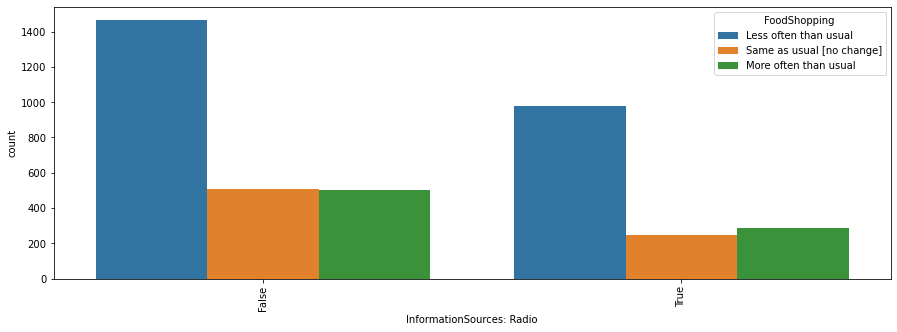

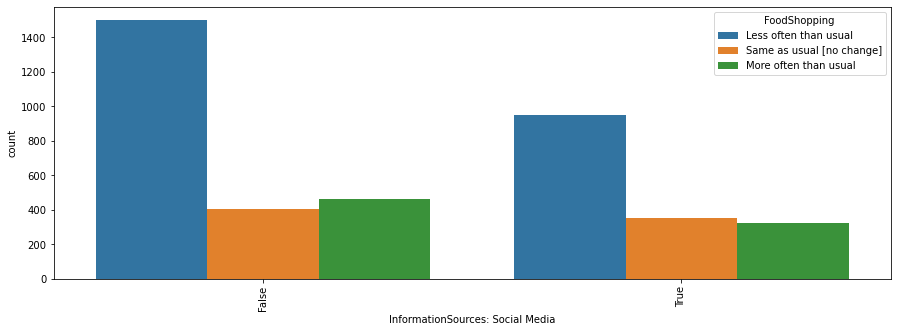

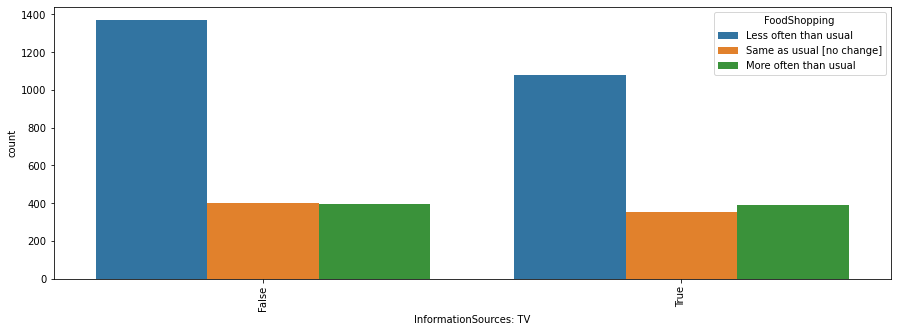

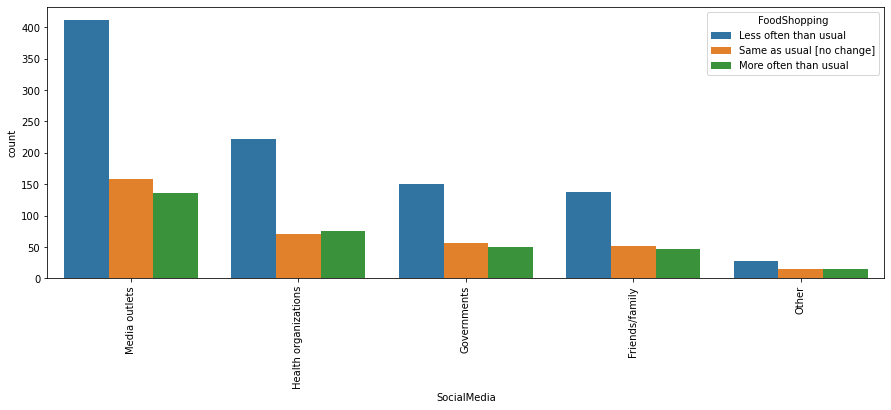

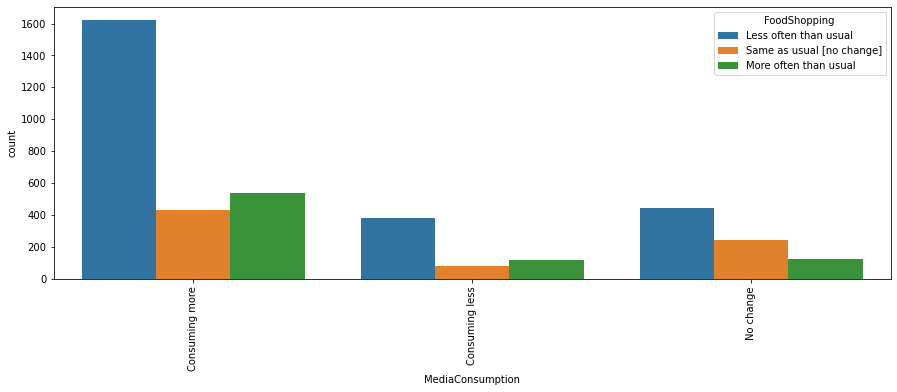

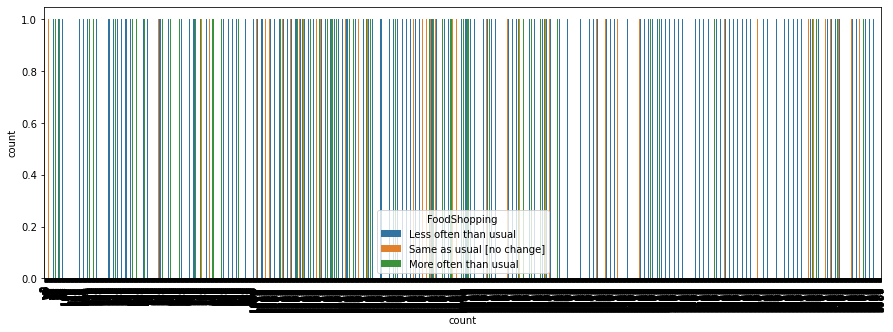

In [17]:
fs = new_rawData["FoodShopping"]
# print(bp)
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= fs, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<br>
<h2>Visualization for all the columns agains the third target variable (Food Amount)</h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_21484\216282589.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


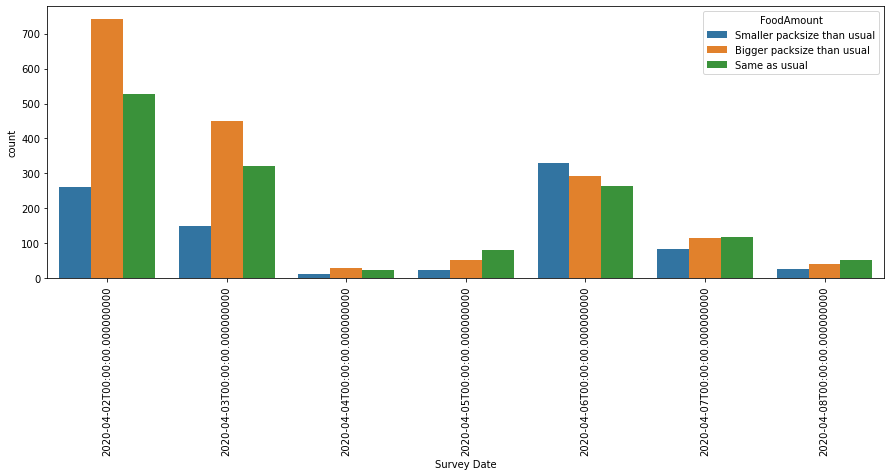

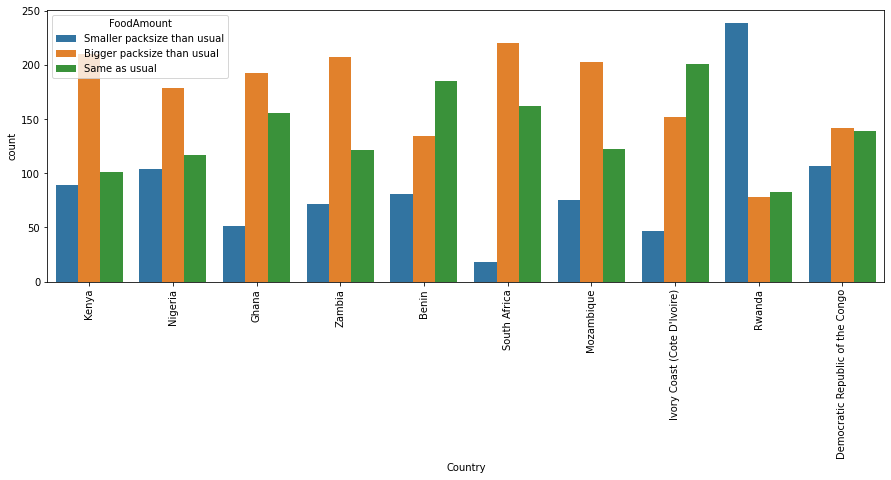

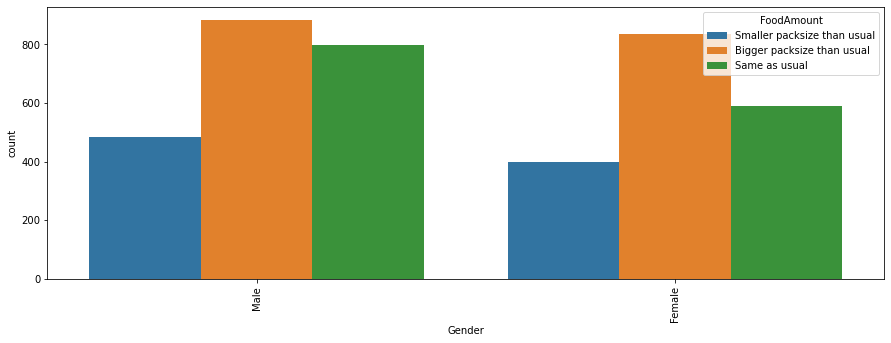

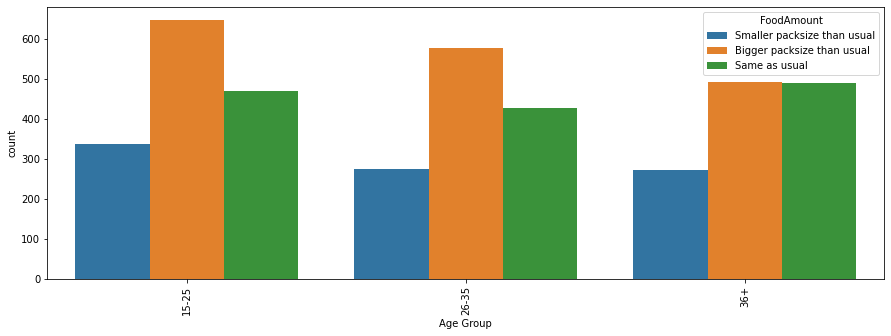

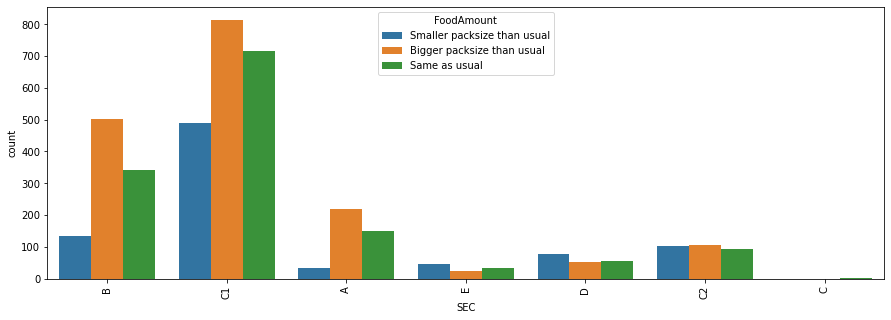

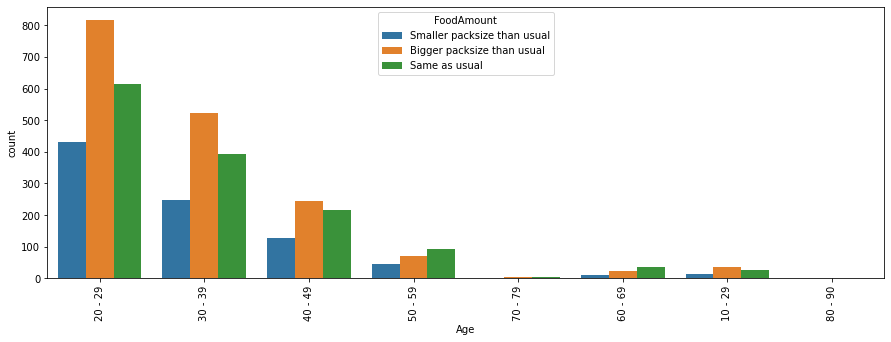

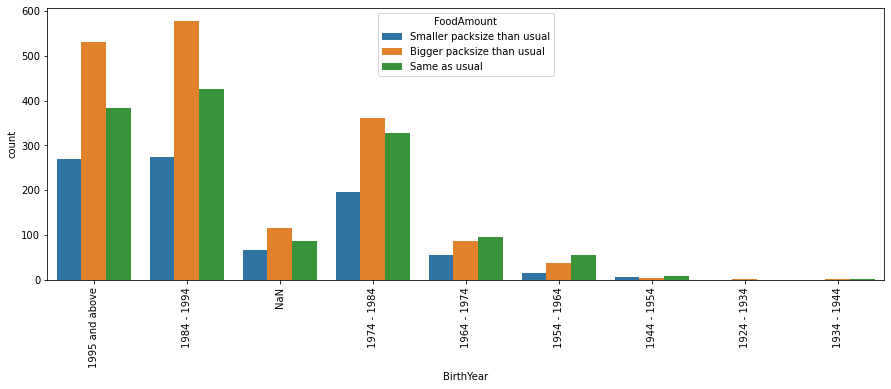

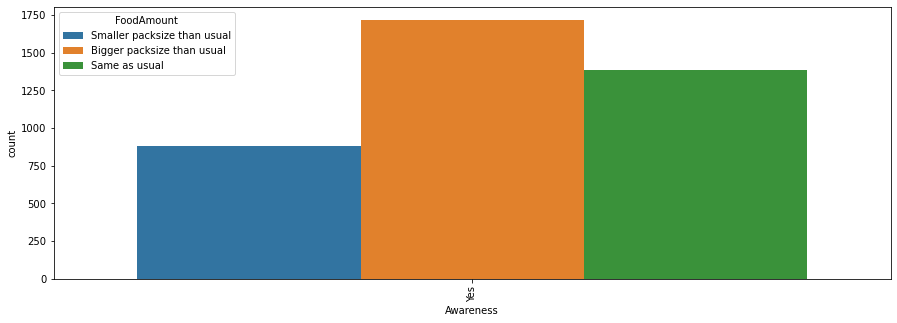

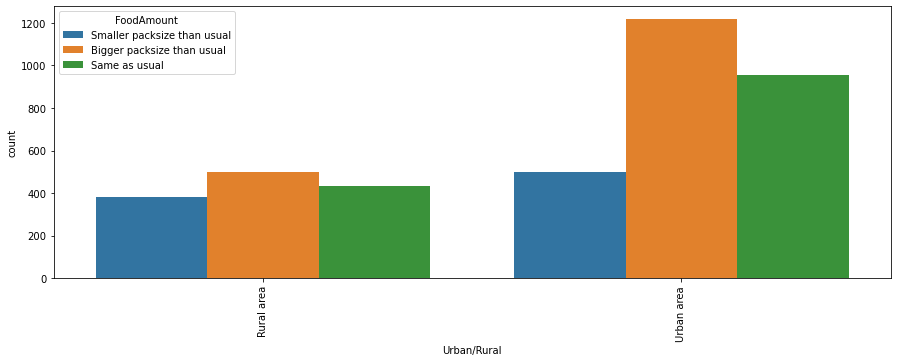

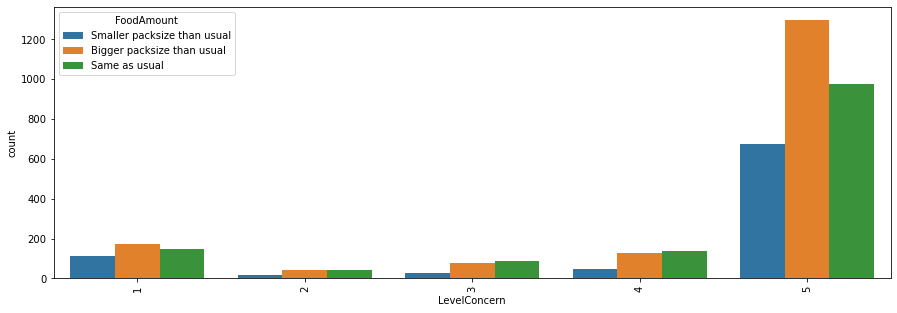

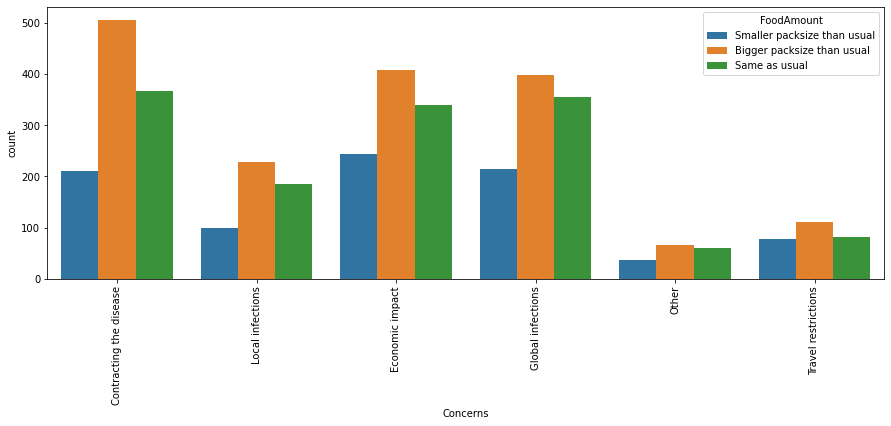

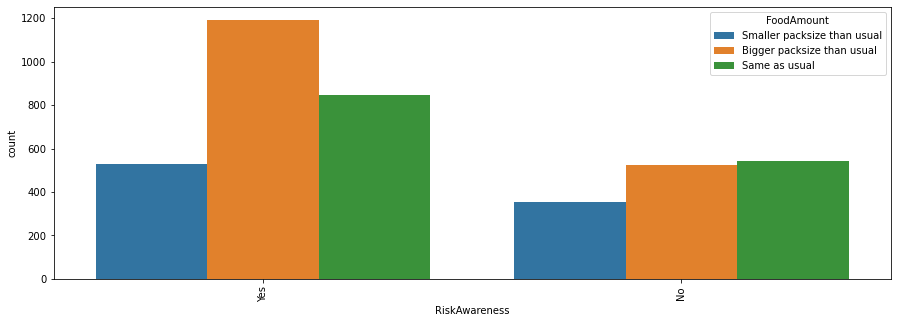

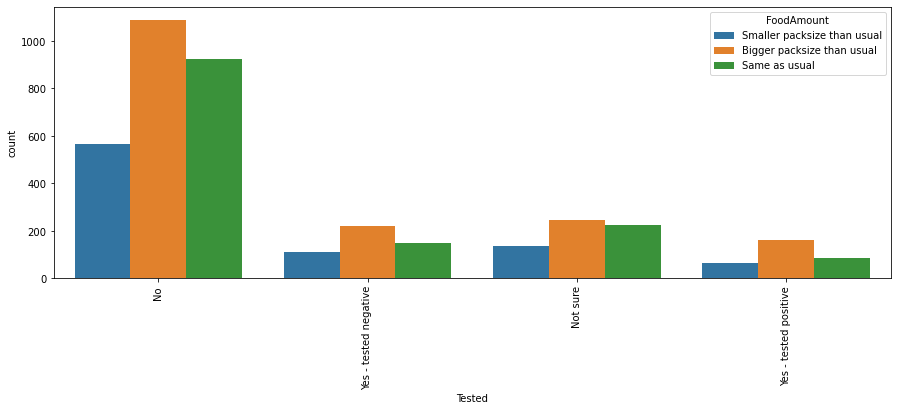

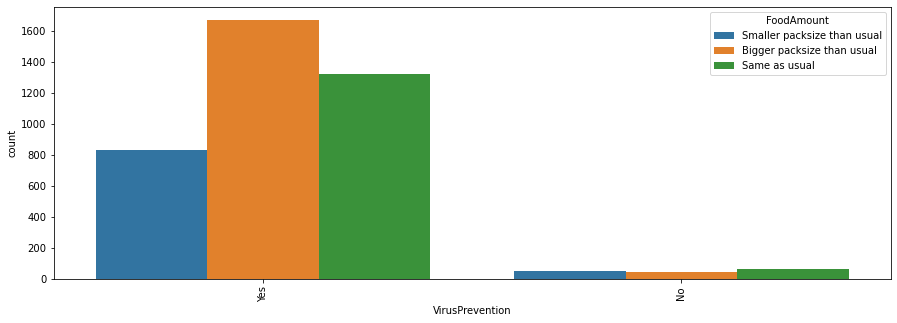

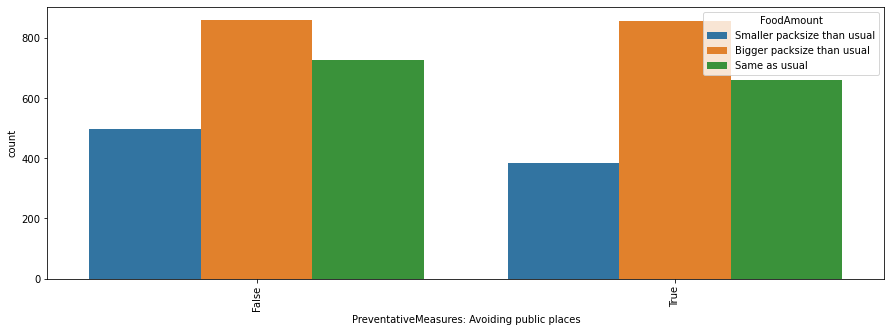

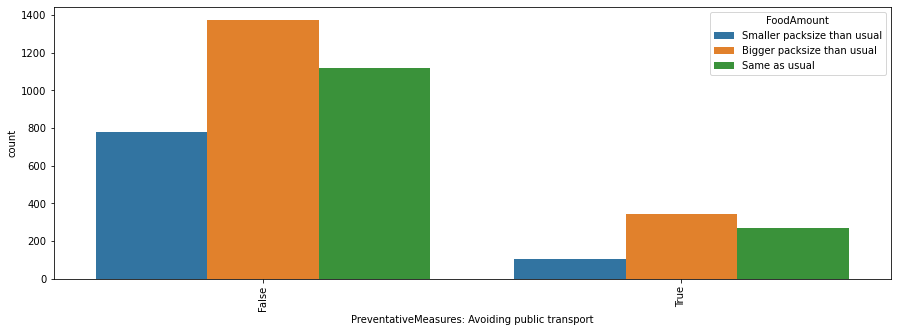

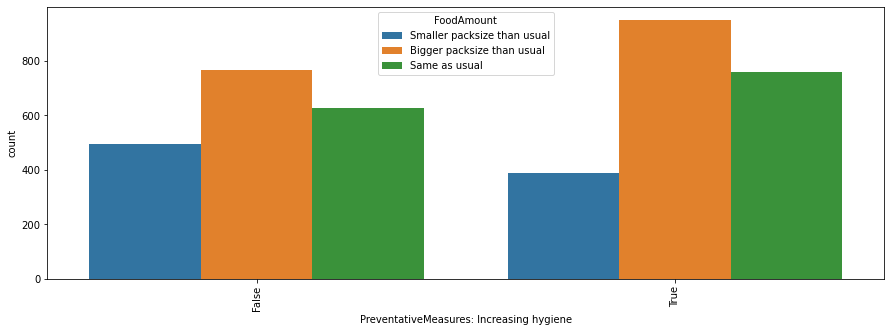

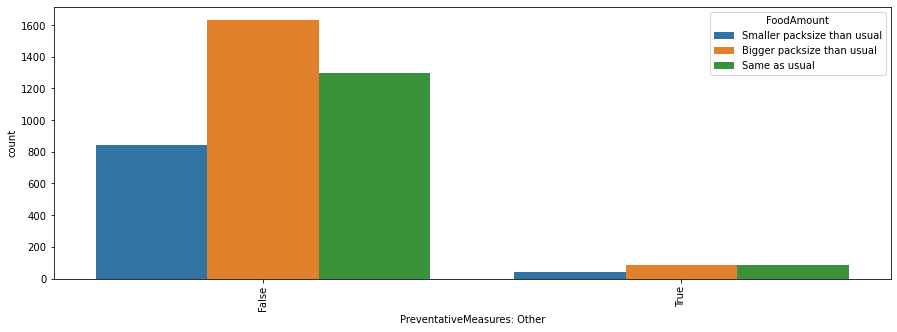

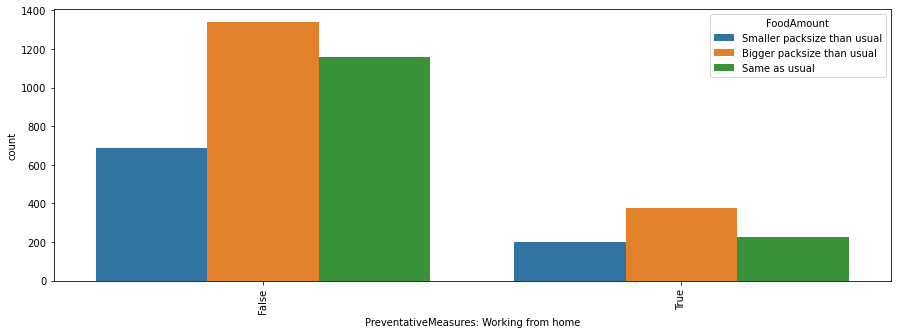

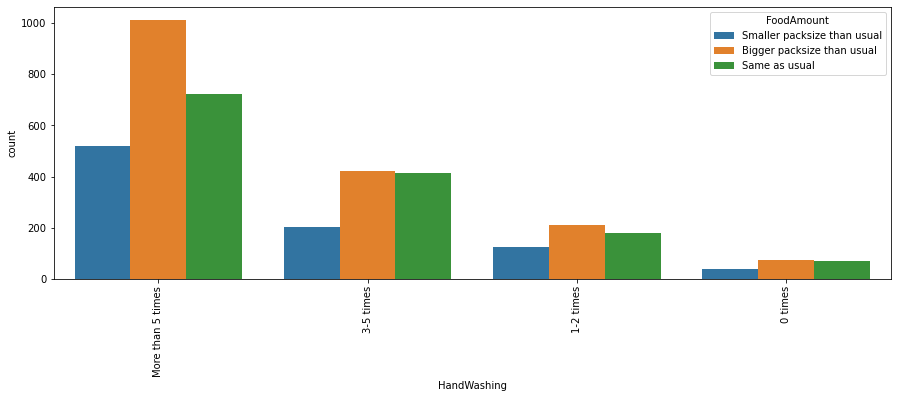

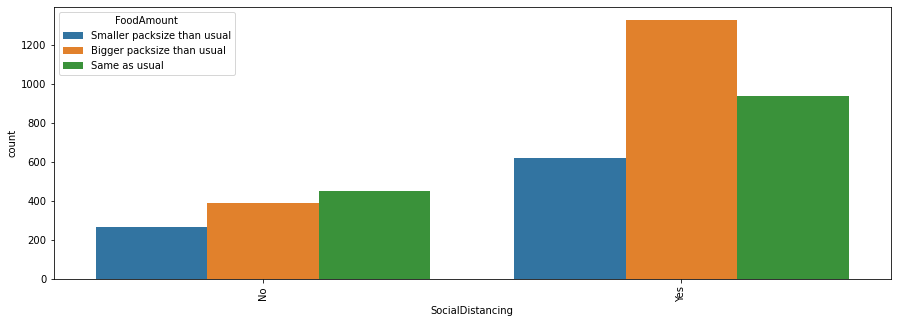

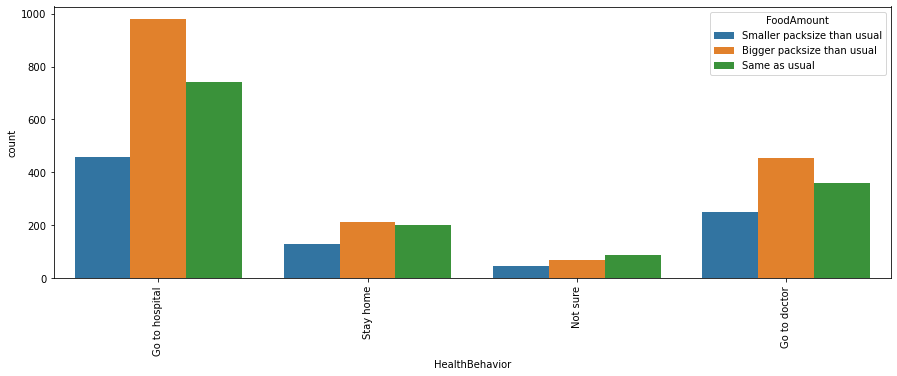

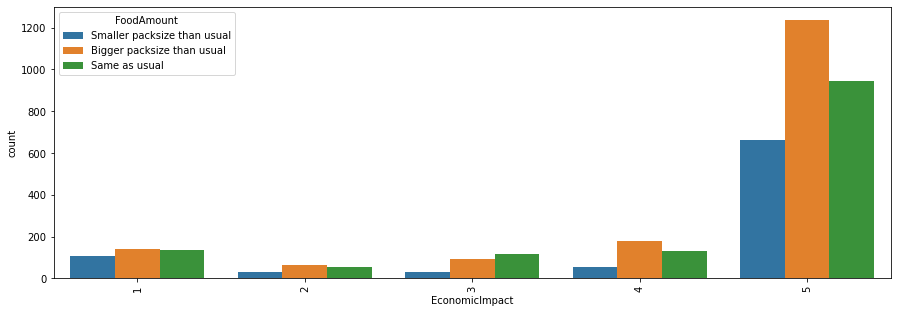

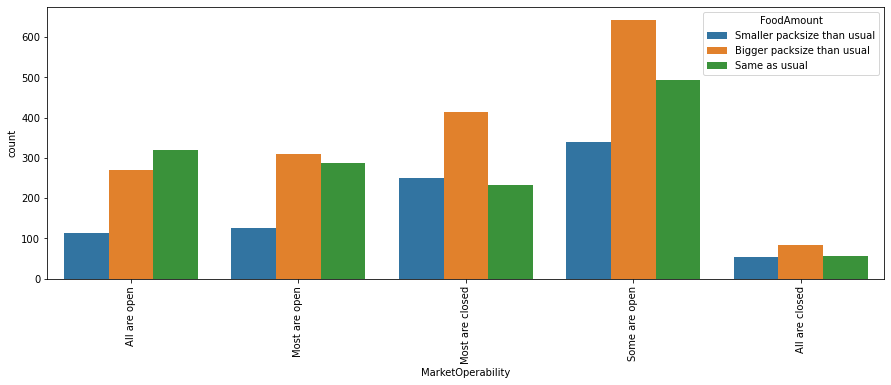

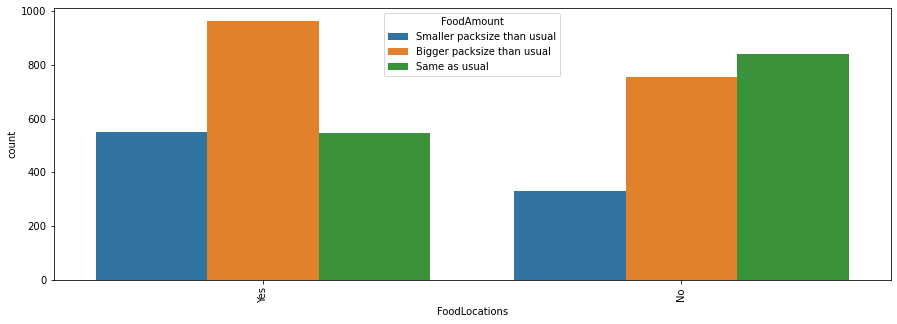

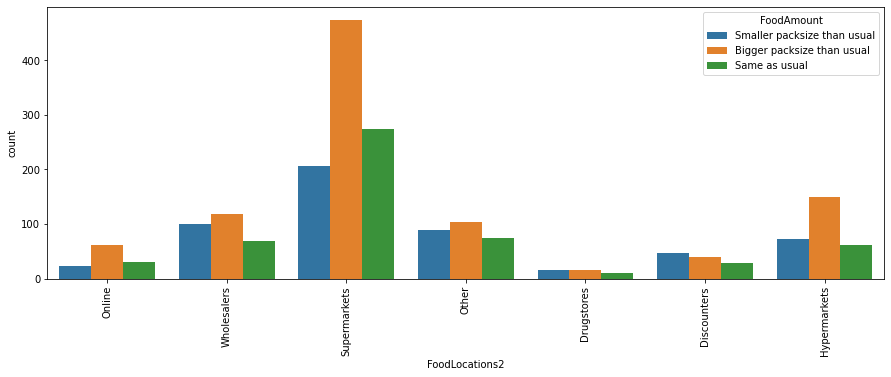

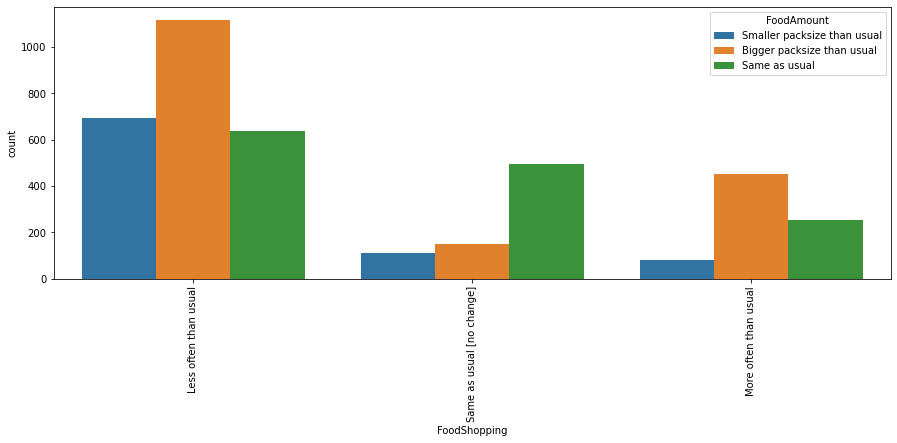

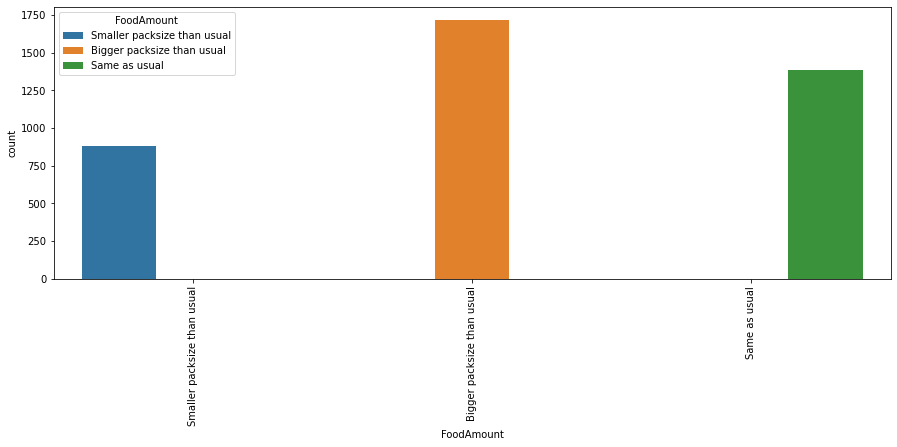

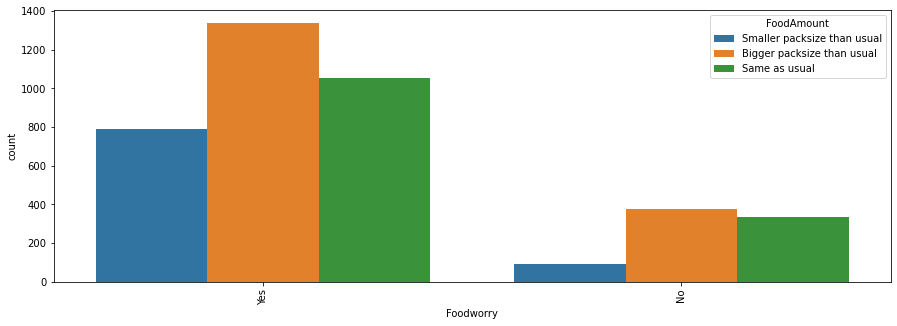

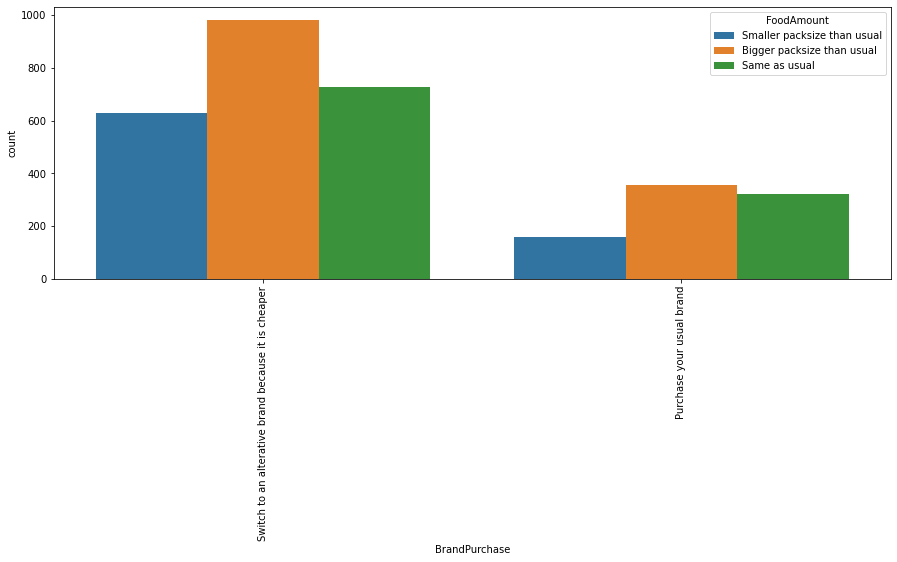

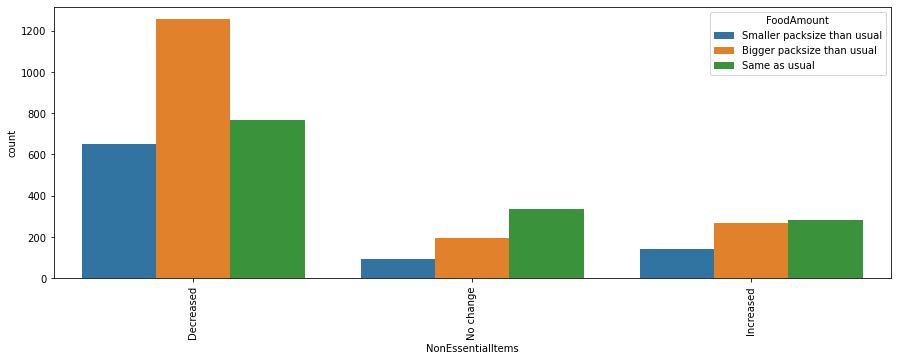

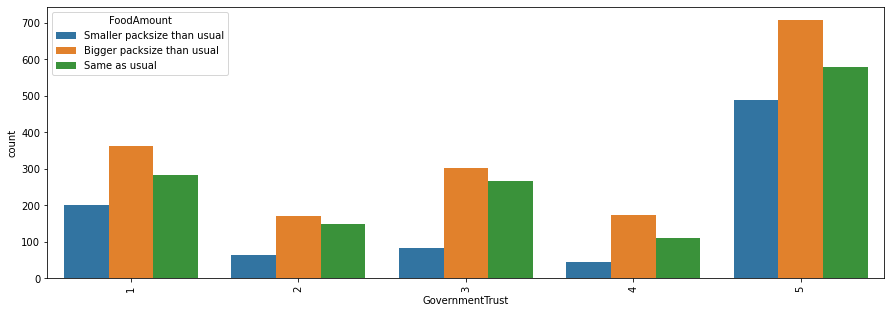

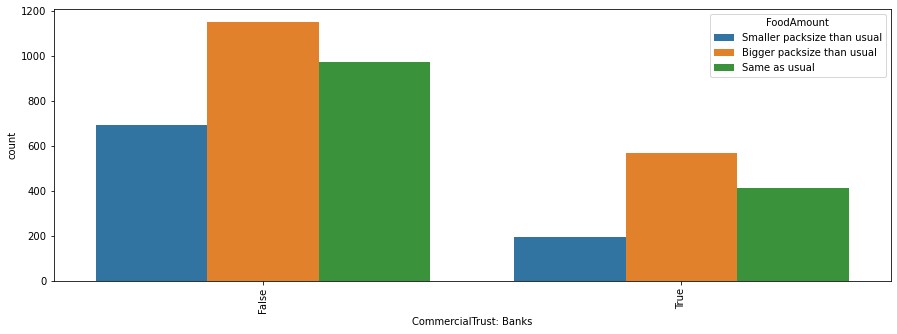

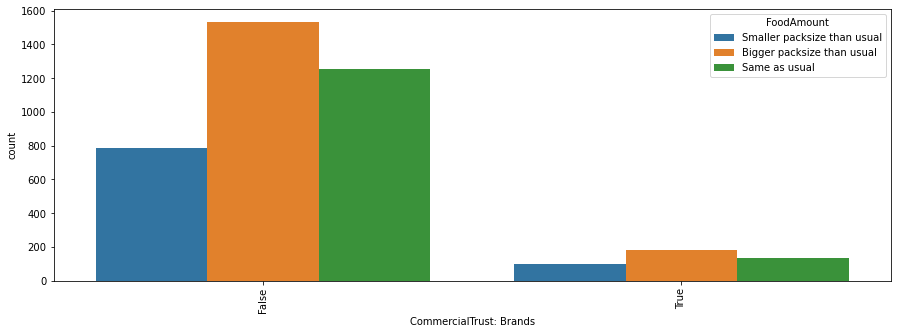

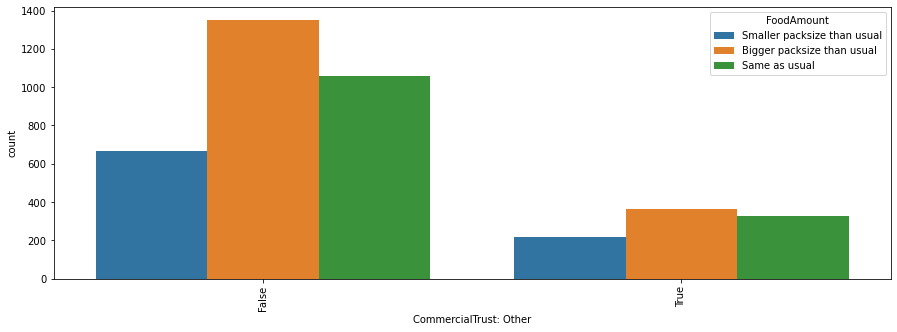

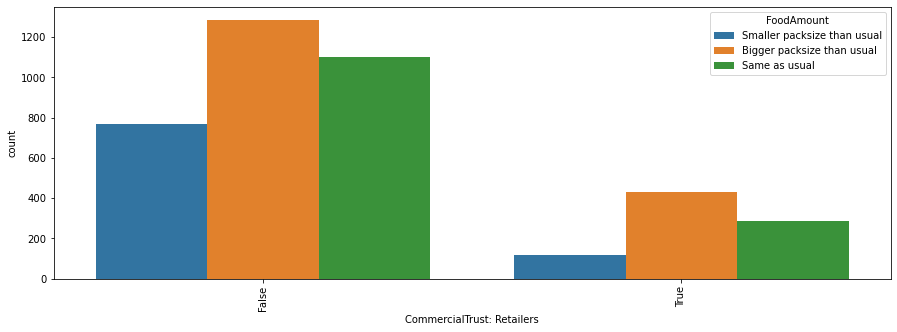

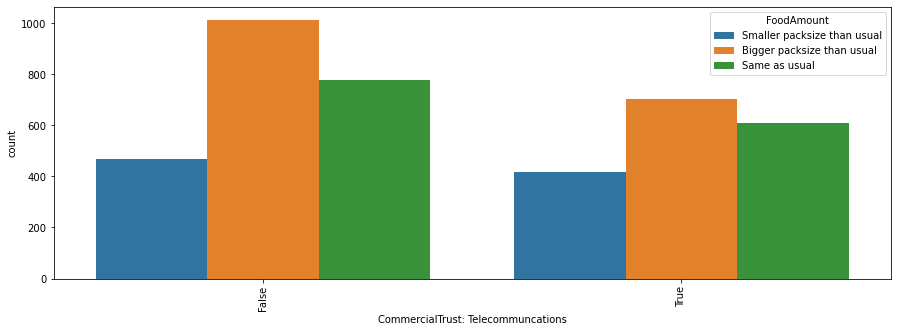

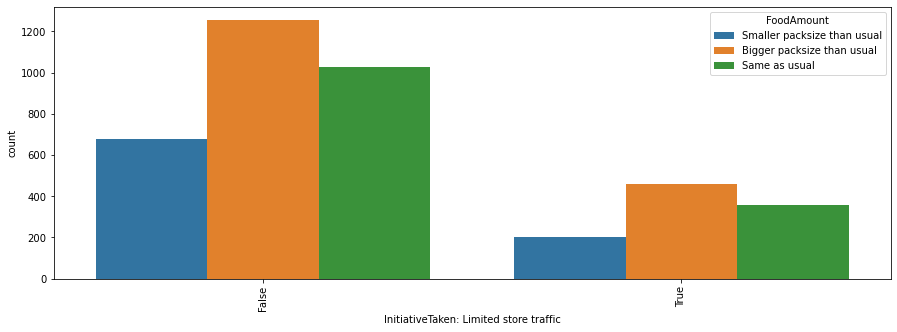

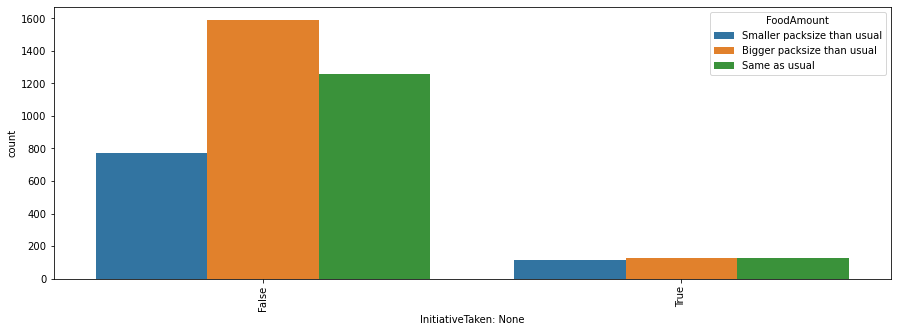

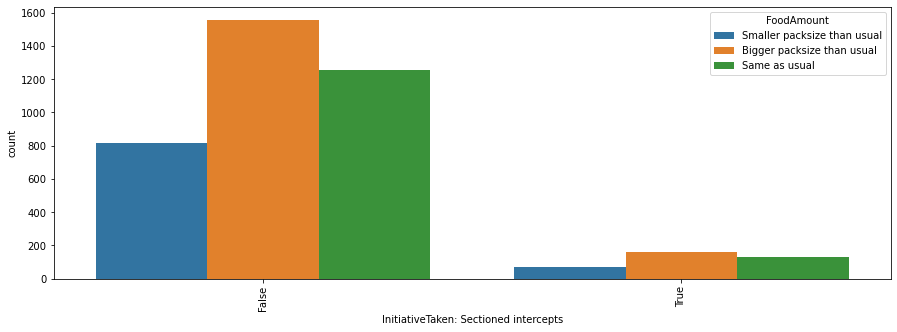

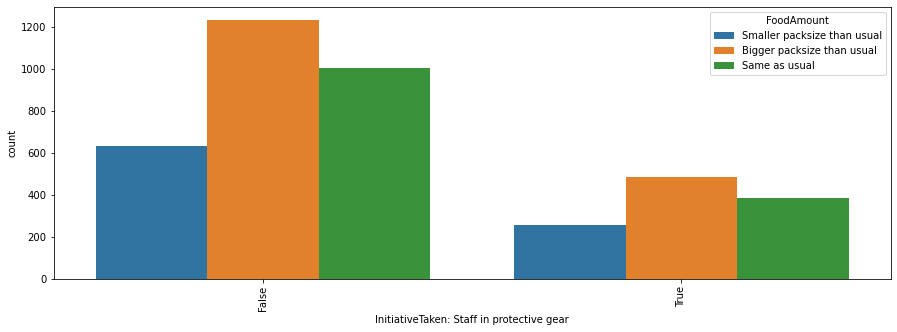

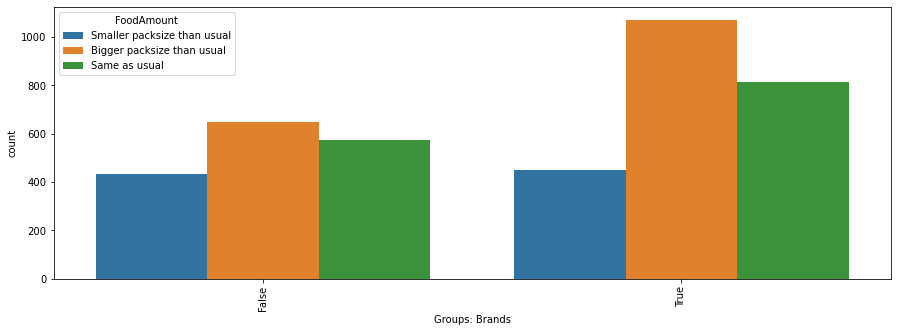

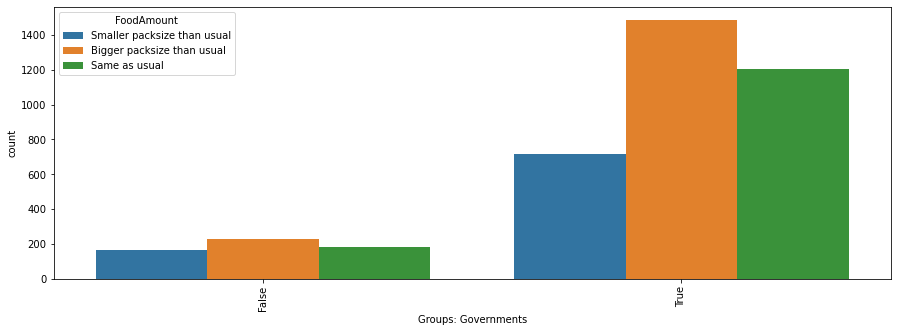

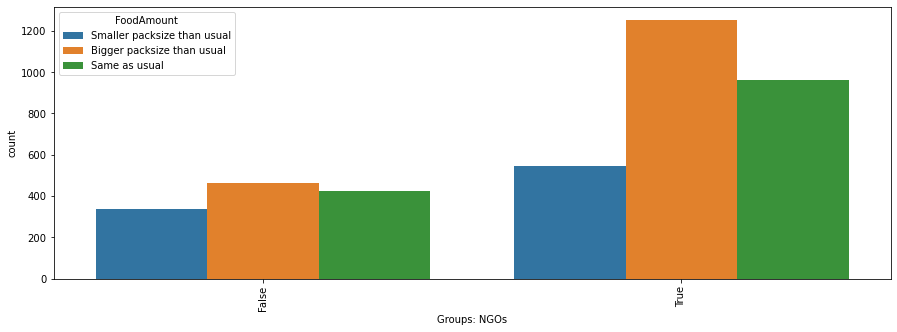

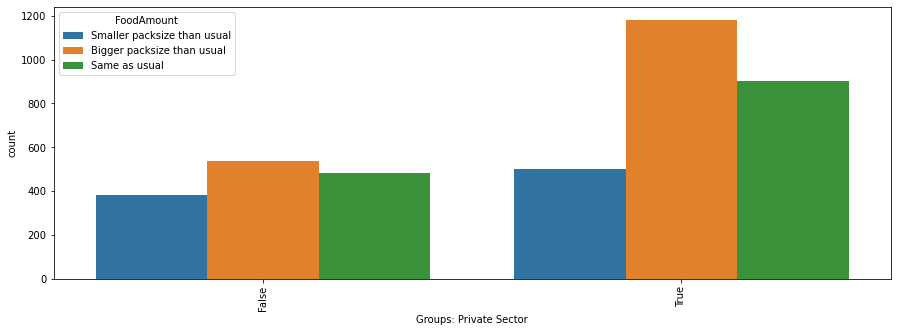

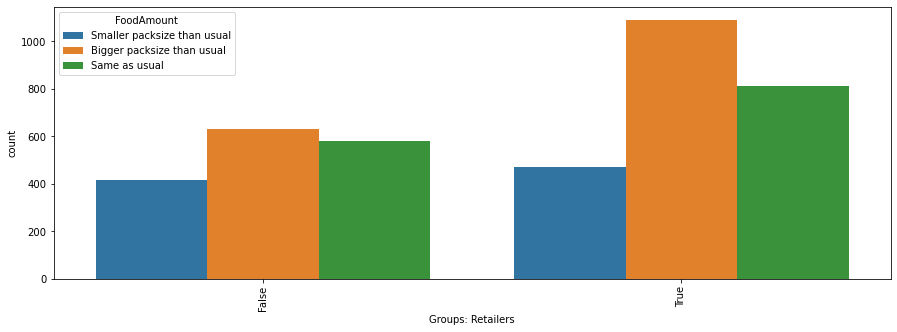

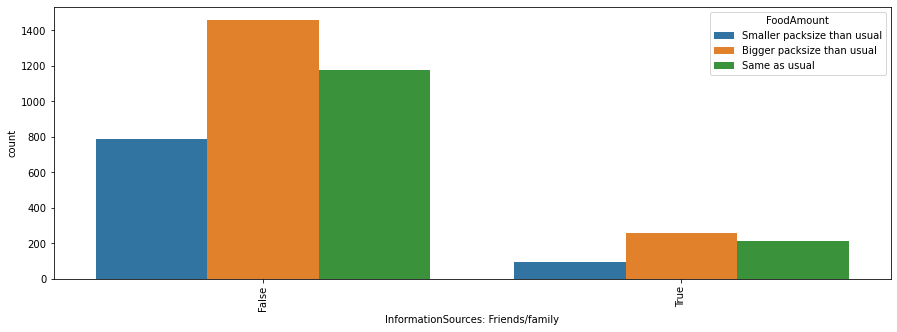

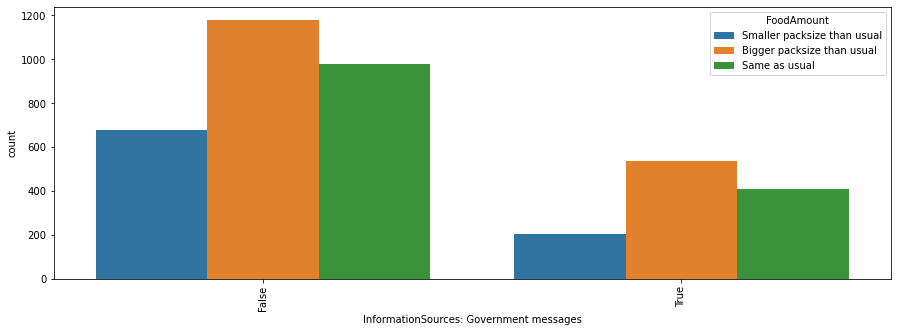

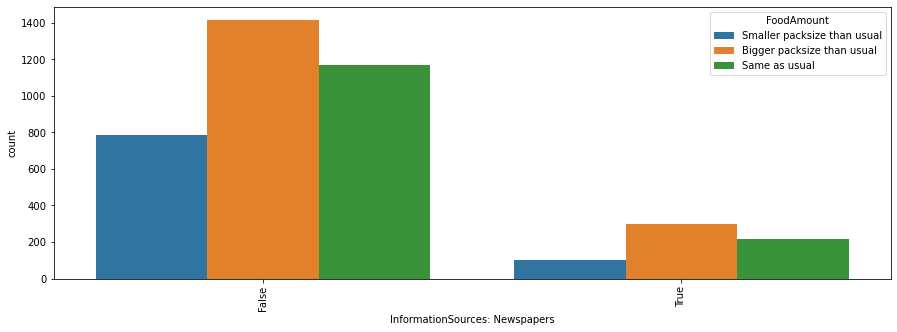

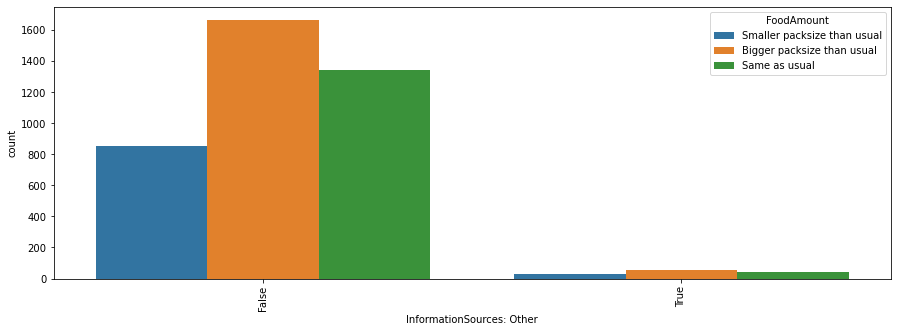

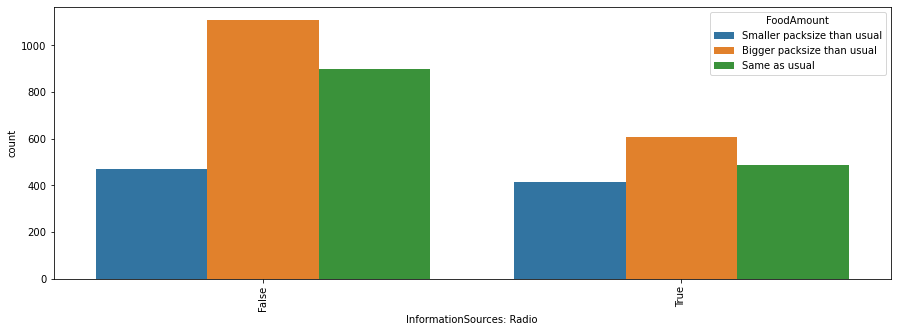

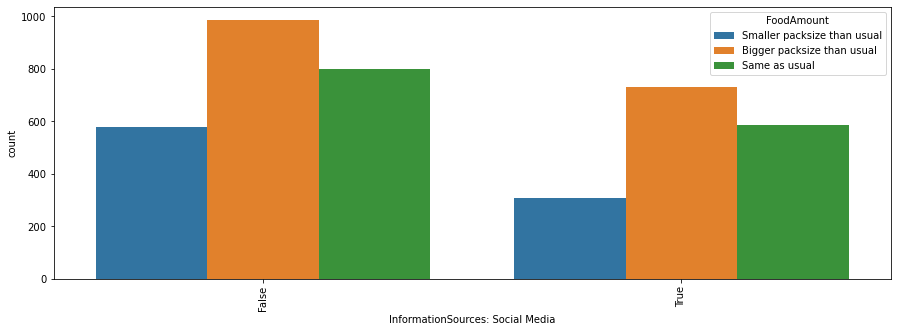

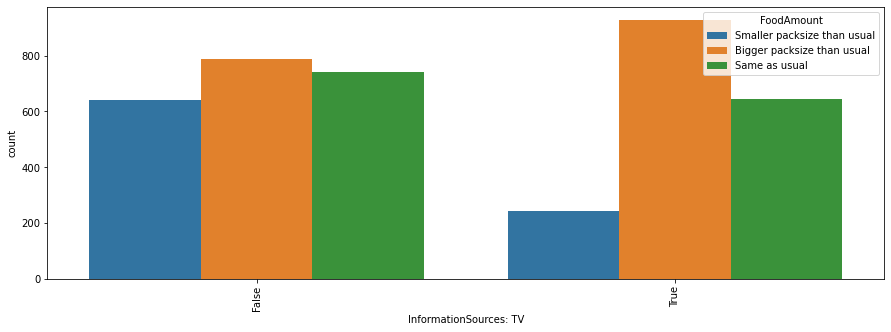

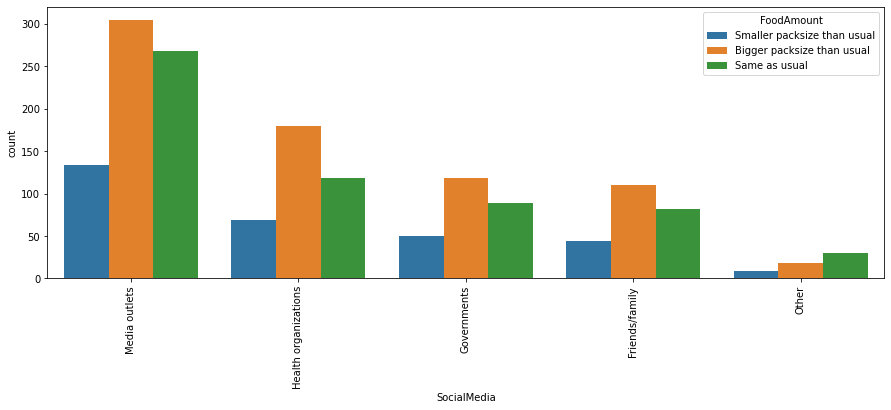

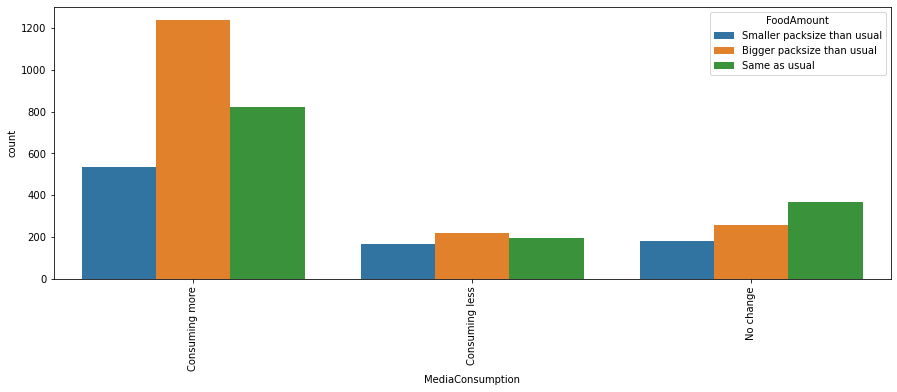

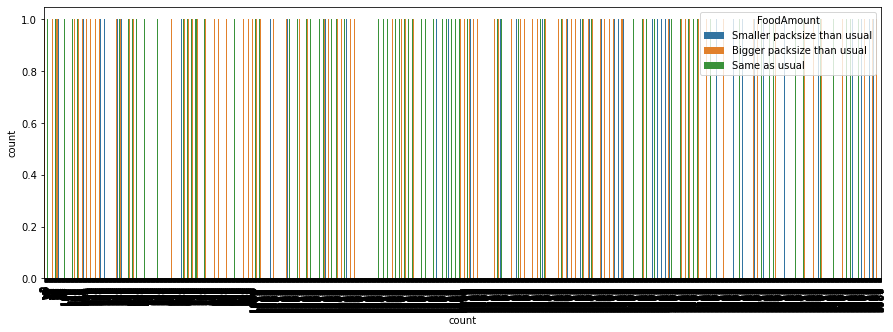

In [18]:
fa = new_rawData["FoodAmount"]
colNo = 0
while colNo < len(new_rawData.columns):
    plt.figure(figsize=(15,5))
    plt.rcParams['figure.figsize'] = (2,2)
    sns.countplot(x=new_rawData.columns[colNo], hue= fa, data=new_rawData)
    plt.xticks(rotation=90)
    colNo = colNo + 1 

<h2>Check for Outliers using Visualization (Boxplot) </h2>

C:\Users\Ellahhh\AppData\Local\Temp\ipykernel_21484\3543824417.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


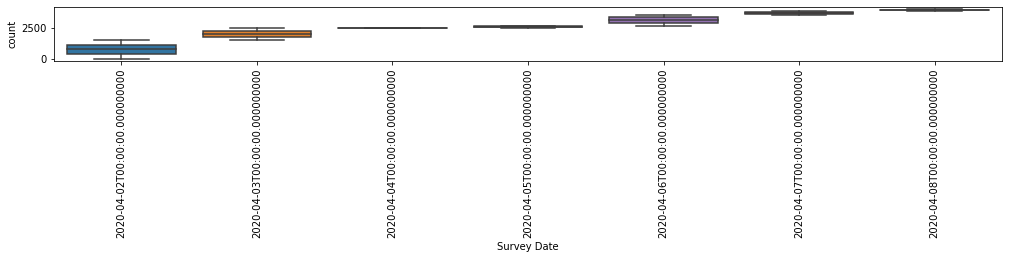

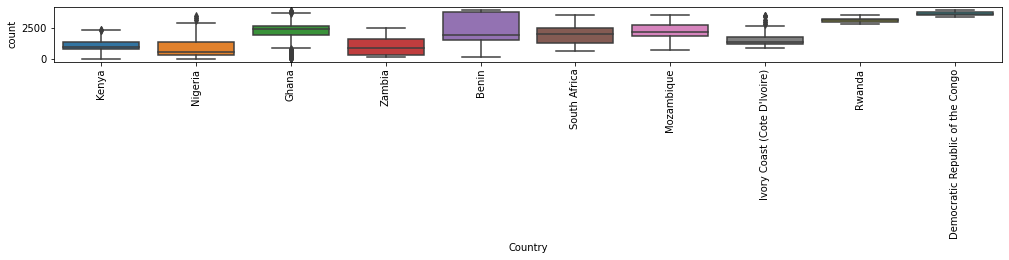

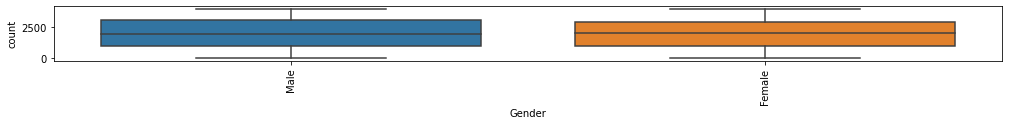

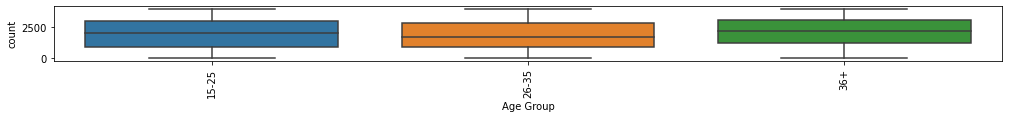

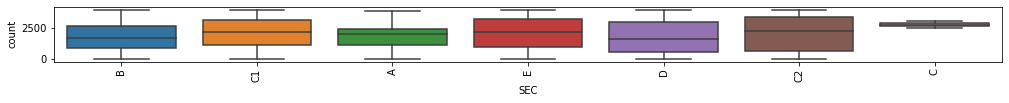

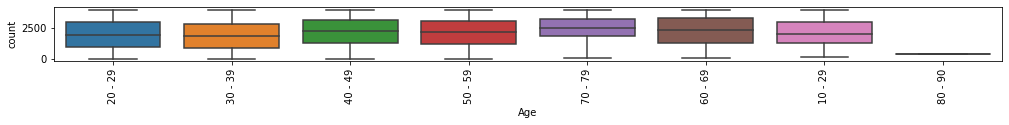

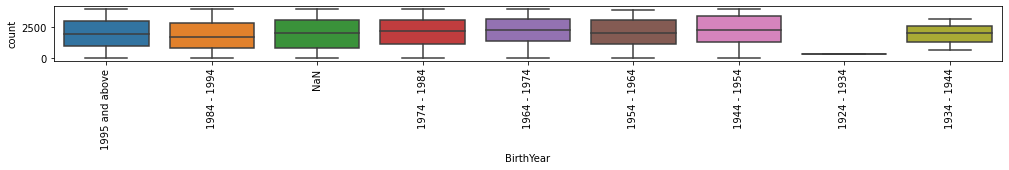

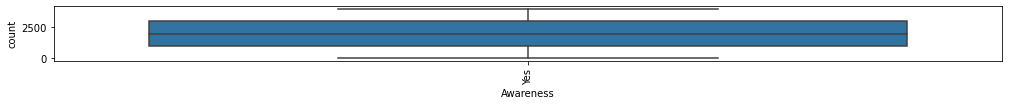

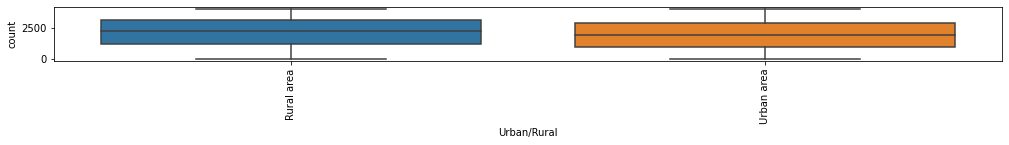

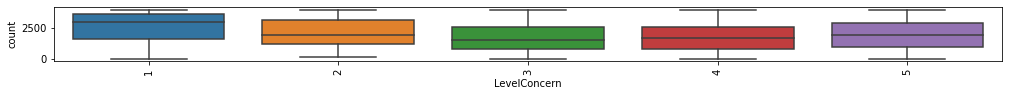

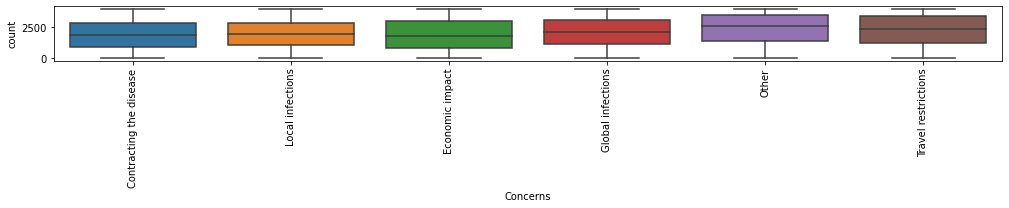

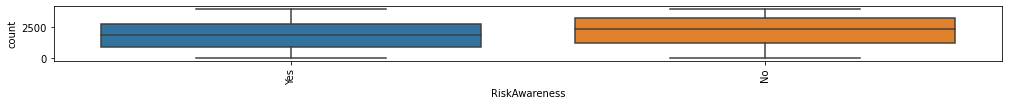

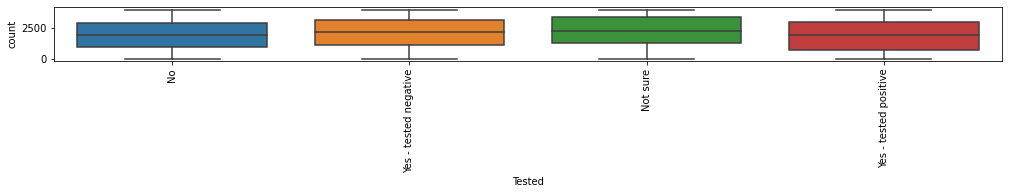

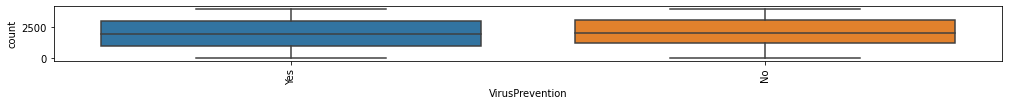

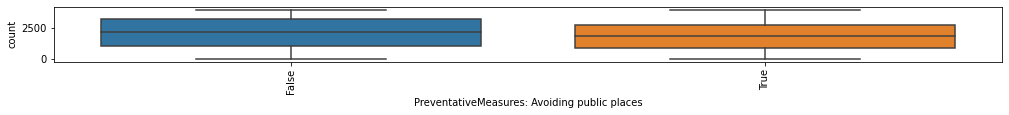

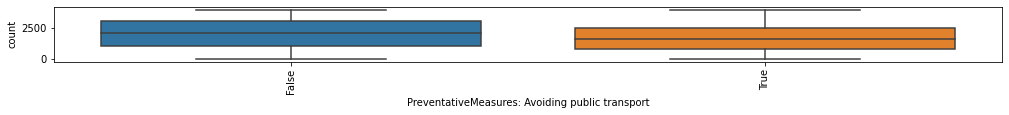

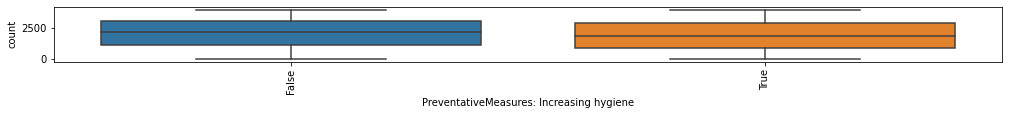

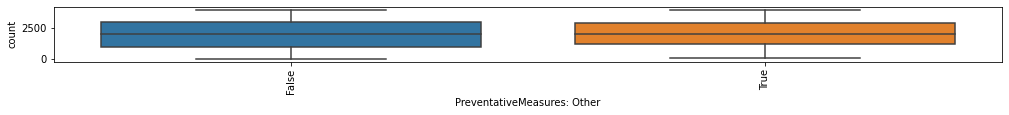

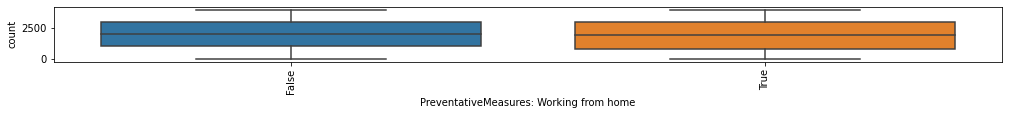

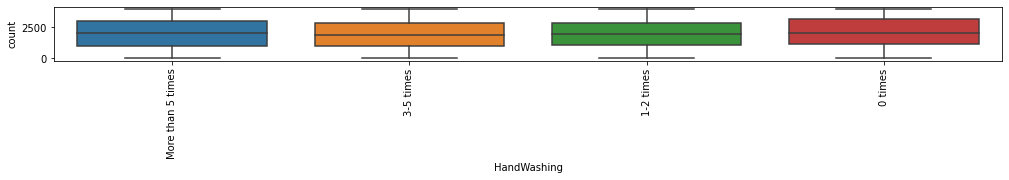

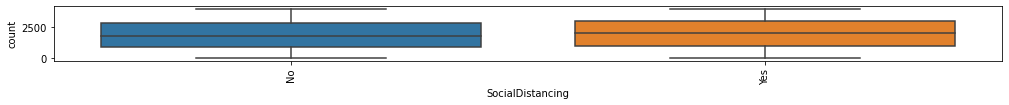

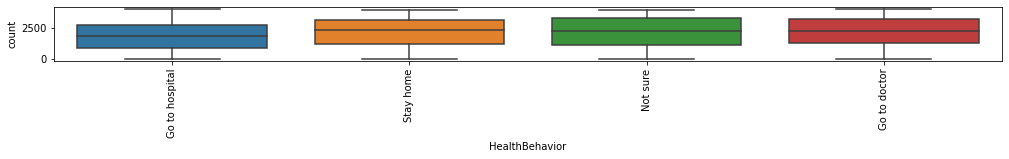

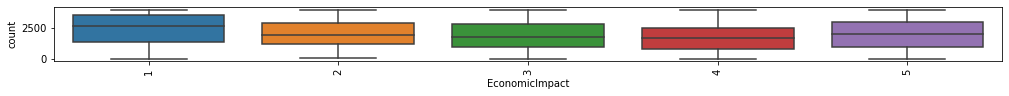

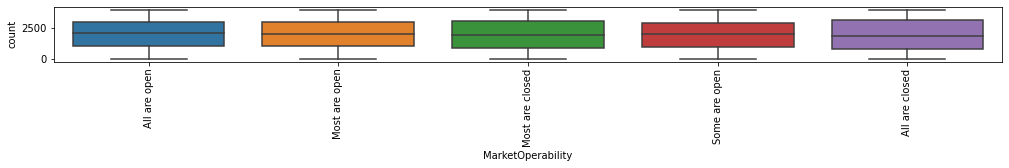

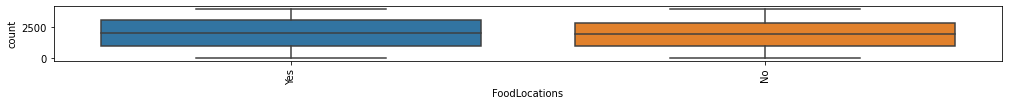

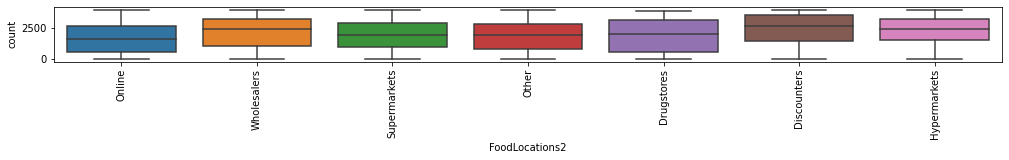

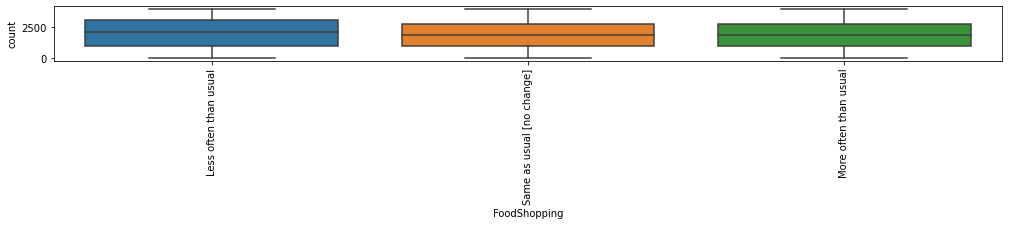

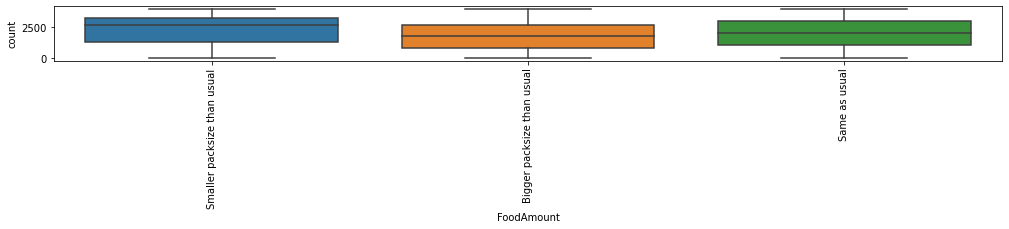

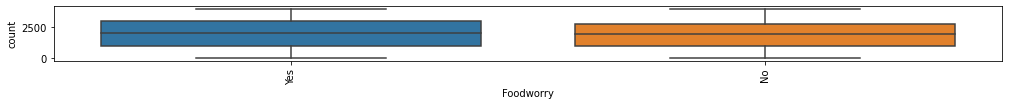

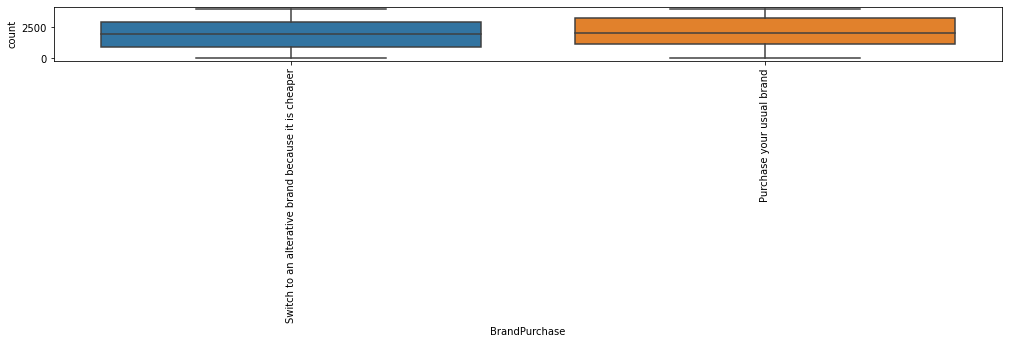

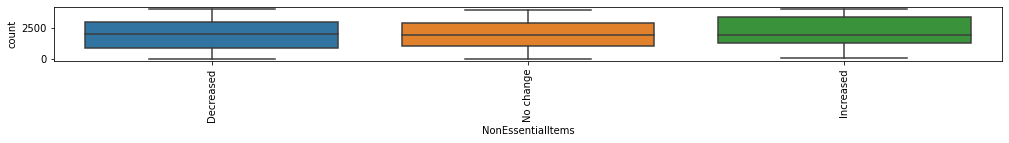

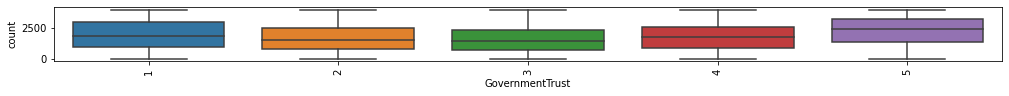

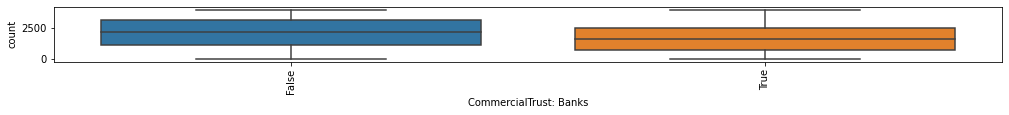

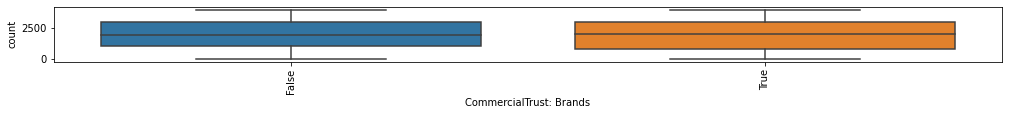

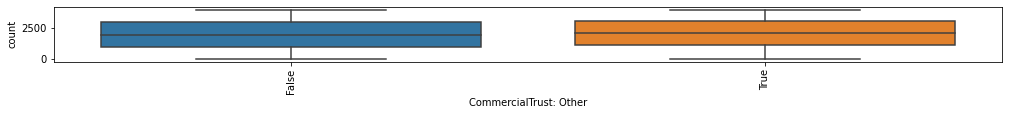

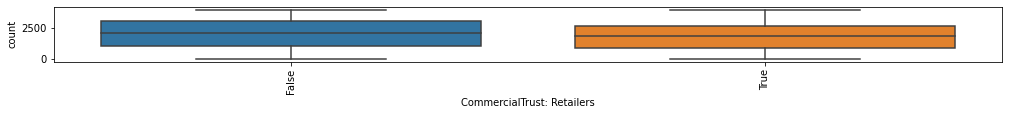

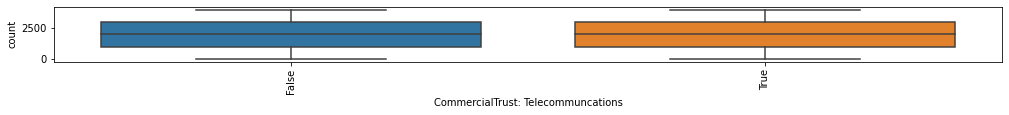

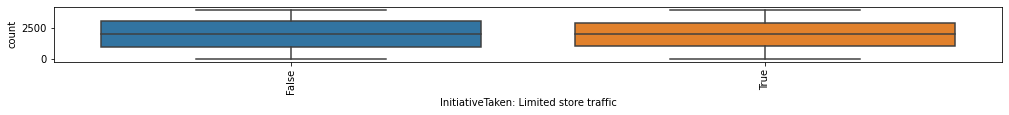

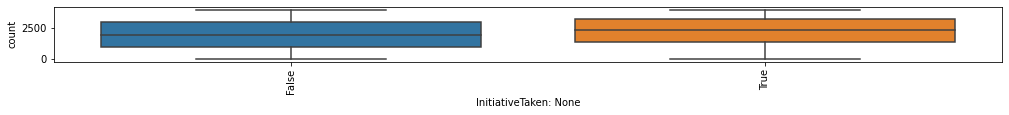

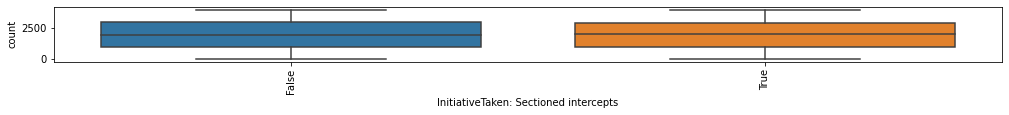

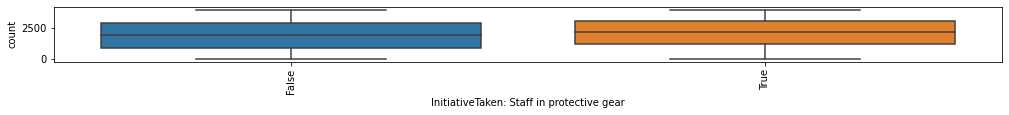

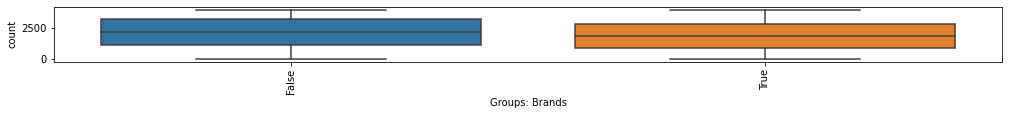

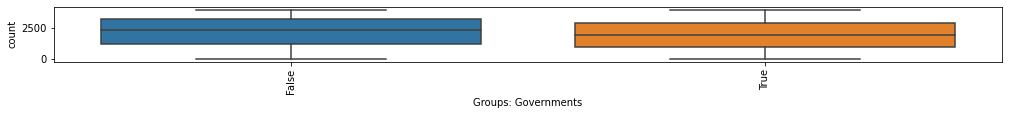

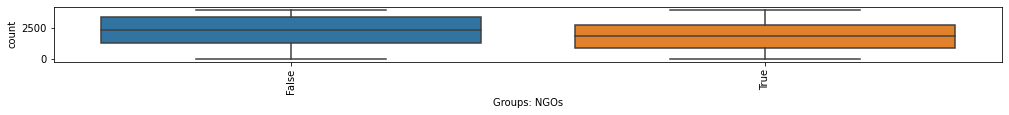

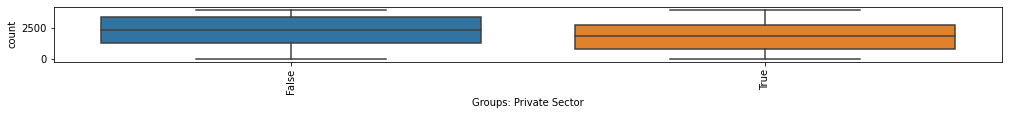

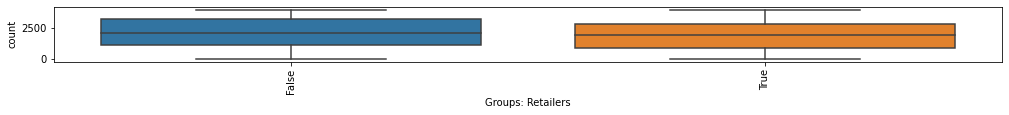

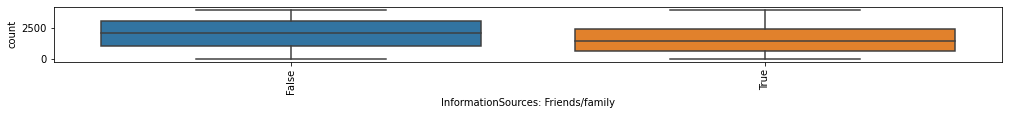

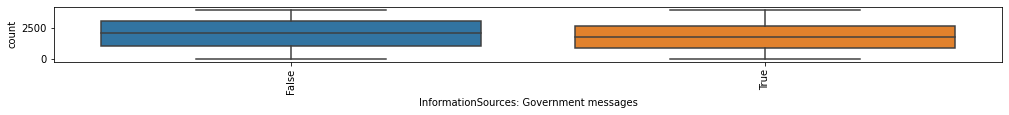

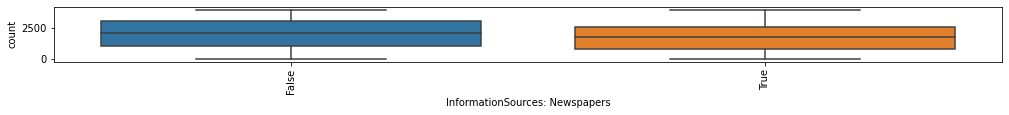

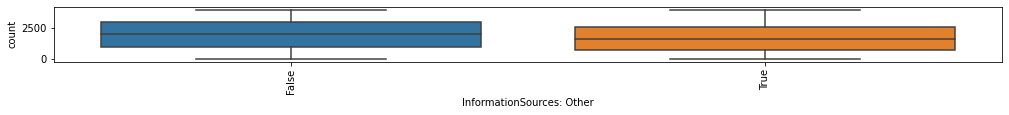

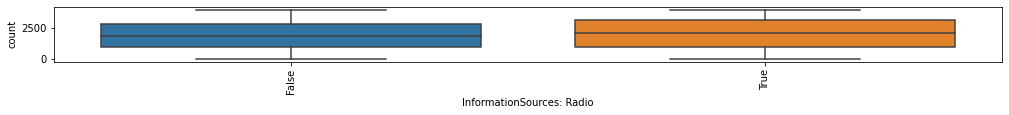

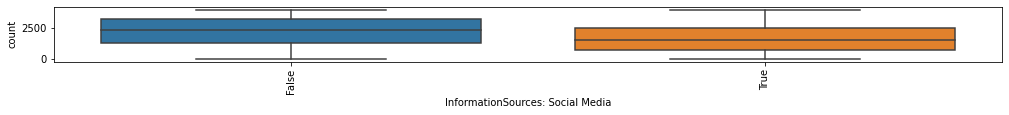

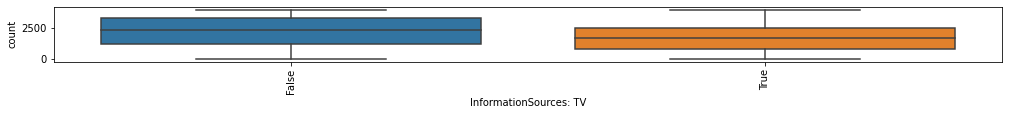

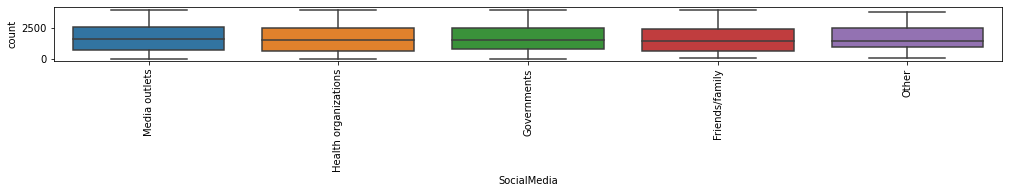

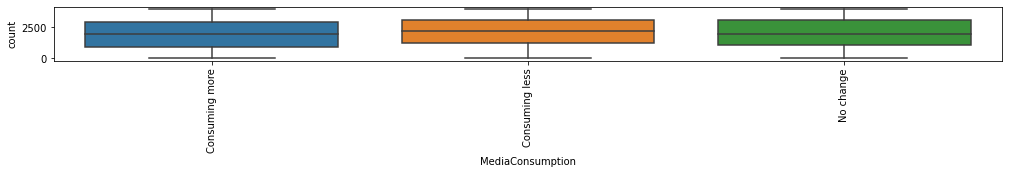

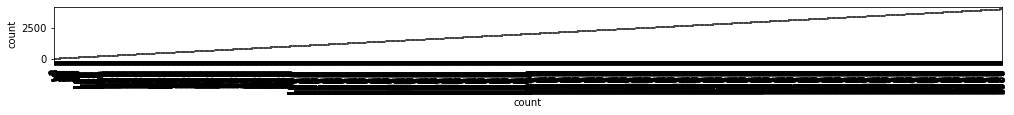

In [19]:
for column in new_rawData:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=new_rawData, x=column, y=new_rawData['count'])
        plt.xticks(rotation=90)

In [73]:
#create a function to find outliers using IQR
# n = 1
# colNo = 1
# while colNo < len(new_rawData.columns):
#     print(new_rawData.columns[colNo])
#     print("-----------------------------------------------------------------------------")
#     for (new_rowName, data) in new_rawData.iterrows():
#         print(data[n])
#         q1 = int(data[n]).quantile(0.25)
#         q3 = int(data[n]).quantile(0.75)
#         IQR = q3 - q1
#         outliers = data[((data[n]<(q1-1.5*IQR)) | (data[n]>(q3+1.5*IQR)))]
#         print("number of outliers: " + str(len(outliers)))
#         print("max outlier value: " + str(outliers.max()))
#         print("min outlier value: " + str(outliers.min()))
#     n = n + 1
#     print("------------------------------------------------------------------------------\n\n")
#     colNo = colNo + 1

In [82]:
new_rawData = new_rawData.drop(labels='count', axis=1)
new_rawData.head()

Survey Date  Country Gender Age Group SEC      Age       BirthYear  \
0  2020-04-02    Kenya   Male     15-25   B  20 - 29  1995 and above   
1  2020-04-02    Kenya   Male     26-35  C1  20 - 29     1984 - 1994   
2  2020-04-02  Nigeria   Male     15-25   A  20 - 29  1995 and above   
3  2020-04-02    Kenya   Male     26-35  C1  30 - 39     1984 - 1994   
4  2020-04-02    Kenya   Male     15-25   B  20 - 29             NaN   

  Awareness Urban/Rural  LevelConcern  ... Groups: Retailers  \
0       Yes  Rural area             5  ...             False   
1       Yes  Urban area             5  ...              True   
2       Yes  Urban area             5  ...             False   
3       Yes  Rural area             5  ...              True   
4       Yes  Rural area             5  ...             False   

  InformationSources: Friends/family InformationSources: Government messages  \
0                              False                                    True   
1                              False                                    True   
2                              False                                   False   
3                              False                                    True   
4                              False                                   False   

  InformationSources: Newspapers  InformationSources: Other  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                           True                      False   
4                          False                      False   

   InformationSources: Radio  InformationSources: Social Media  \
0                      False                             False   
1                      False                              True   
2                      False                              True   
3                       True                              True   
4                      False                              True   

   InformationSources: TV           SocialMedia MediaConsumption  
0                   False                   NaN   Consuming more  
1                    True         Media outlets   Consuming more  
2                   False  Health organizations   Consuming more  
3                    True  Health organizations   Consuming more  
4                   False         Media outlets   Consuming less  

[5 rows x 55 columns]

<h3>Converted the dataset to csv</h3>

In [76]:
new_rawData.to_csv("DataSet/AfterVisualization.csv")

<h2>Preprocessing Stage</h2>
<ol>
    <li>Handling missing values</li>
    <li>Fixing Outliers</li>
    <li>Conversion from Categorical to numerical Values</li>
</ol>

<h3>Handling Missing Values</h3>

In [93]:
new_rawData1 = new_rawData.drop(["FoodLocations2"], axis=1)

<h3> Handling the last missing value column because it is our target variable </h3>
<p>In multivariate statistics and machine learning, the dependent variable is assigned a role as target variable. <br>
we will be maing use of “Label Encoder” because we are working with Dependent Categorical Column.</p>

In [104]:
from sklearn.preprocessing import LabelEncoder

leBp = LabelEncoder()
brandPurchase = leBp.fit_transform(new_rawData1['BrandPurchase'])

print(brandPurchase)
print(len(brandPurchase))
print(type(brandPurchase))

[1 2 2 ... 2 0 0]
3988
<class 'numpy.ndarray'>


In [135]:
colRow = 0
new_bpTrain = pd.DataFrame(columns=['BrandPurchase'], index=new_rawData1.index, data = new_rawData1)
print(new_bpTrain.columns)

while colRow < len(brandPurchase):
    if brandPurchase[colRow] == 1:
        print(brandPurchase[colRow])
        new_bpTrain.insert(loc=0, column='BrandPurchase')
    colRow = colRow + 1
        

Index(['BrandPurchase'], dtype='object')
1


TypeError: insert() missing 1 required positional argument: 'value'

In [105]:
# from sklearn.linear_model import LinearRegression
# bpData = new_rawData1['BrandPurchase']
# bpData = [2 if x == "Switch to an alternative brand because it is cheaper" elif x == "Purchase your usual brand" else 0 for x in bpData]

# test_data = bpData.isnull()
# bpData.dropna(inplace=True)


In [94]:
# print(len(new_rawData1.columns))
# print(len(new_rawData1.index))
# print(new_rawData1.columns)

53
3988
Index(['Survey Date', 'Country', 'Gender', 'Age Group', 'SEC', 'Age',
       'BirthYear', 'Awareness', 'Urban/Rural', 'LevelConcern', 'Concerns',
       'RiskAwareness', 'Tested', 'VirusPrevention',
       'PreventativeMeasures: Avoiding public places',
       'PreventativeMeasures: Avoiding public transport',
       'PreventativeMeasures: Increasing hygiene',
       'PreventativeMeasures: Other',
       'PreventativeMeasures: Working from home', 'HandWashing',
       'SocialDistancing', 'HealthBehavior', 'EconomicImpact',
       'MarketOperability', 'FoodLocations', 'FoodShopping', 'FoodAmount',
       'Foodworry', 'BrandPurchase', 'NonEssentialItems', 'GovernmentTrust',
       'CommercialTrust: Banks', 'CommercialTrust: Brands',
       'CommercialTrust: Other', 'CommercialTrust: Retailers',
       'CommercialTrust: Telecommuncations',
       'InitiativeTaken: Limited store traffic', 'InitiativeTaken: None',
       'InitiativeTaken: Sectioned intercepts',
       'InitiativeTak

In [96]:
# new_rawData1.isna().sum()

Survey Date                                          0
Country                                              0
Gender                                               0
Age Group                                            0
SEC                                                  0
Age                                                  0
BirthYear                                            0
Awareness                                            0
Urban/Rural                                          0
LevelConcern                                         0
Concerns                                             0
RiskAwareness                                        0
Tested                                               0
VirusPrevention                                      0
PreventativeMeasures: Avoiding public places         0
PreventativeMeasures: Avoiding public transport      0
PreventativeMeasures: Increasing hygiene             0
PreventativeMeasures: Other                          0
Preventati